---
title: "Decades Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Decades

In [86]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
tracks = pd.read_csv('../data/clean_data/tracks.csv')

# drop columns that will not be used in our models for obvious reasons 
tracks = tracks.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name'], axis=1)

# split 'key_mode' column
tracks['key'] = tracks['key_mode'].apply(lambda x: x.split(' ')[0])
tracks['mode'] = tracks['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
tracks.drop('key_mode', axis=1, inplace=True)
# covert mode into binary
tracks['mode'] = tracks['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
tracks['key'] = tracks['key'].apply(lambda x: key_dict[x])

# Delete row with decade column == 1940s
tracks = tracks[tracks['decade'] != '1940s']

# what does that data look like? 
tracks.head(20)

danceability  energy  loudness  speechiness  acousticness  \
0          0.787   0.889    -3.125       0.1280      0.009510   
1          0.759   0.833    -5.010       0.0779      0.000260   
2          0.840   0.934    -3.717       0.1190      0.048400   
3          0.894   0.767    -4.695       0.1370      0.023100   
4          0.780   0.780    -2.857       0.0858      0.001470   
5          0.683   0.969    -3.290       0.1710      0.000275   
6          0.655   0.782    -6.825       0.3920      0.010500   
7          0.550   0.762    -7.861       0.3200      0.010900   
8          0.877   0.826    -3.750       0.2060      0.122000   
9          0.752   0.807    -4.386       0.1720      0.014600   
10         0.830   0.698    -6.517       0.0770      0.224000   
11         0.707   0.672    -6.186       0.0864      0.113000   
12         0.796   0.560    -6.135       0.2380      0.127000   
13         0.832   0.911    -4.068       0.2380      0.263000   
14         0.853   0.719    -3.599       0.1460      0.085100   
15         0.796   0.653    -3.644       0.2920      0.037300   
16         0.751   0.768    -4.594       0.0976      0.081100   
17         0.883   0.822    -4.029       0.1080      0.030100   
18         0.787   0.753    -6.938       0.2700      0.030200   
19         0.566   0.547    -9.777       0.1350      0.132000   

    instrumentalness  liveness  valence    tempo  time_signature  duration_ms  \
0           0.000322    0.6520    0.677  156.027               4       172399   
1           0.057300    0.1780    0.522  140.026               4       183919   
2           0.000000    0.0961    0.670  149.994               4       145842   
3           0.000024    0.5740    0.412  144.077               4       140288   
4           0.000000    0.4720    0.446  118.014               4       177289   
5           0.126000    0.9400    0.595  170.017               4       226932   
6           0.003670    0.1200    0.372  167.003               4       164723   
7           0.001790    0.3980    0.347  200.211               4       162138   
8           0.000010    0.1040    0.814   75.003               4       238145   
9           0.000376    0.8000    0.442   87.507               4       195994   
10          0.000001    0.1910    0.595  132.990               4       175476   
11          0.000010    0.1030    0.326  129.951               4       158516   
12          0.000001    0.2920    0.698  149.884               4       141043   
13          0.000147    0.0865    0.557  159.865               4        97300   
14          0.000000    0.1780    0.628  152.029               4       142668   
15          0.005640    0.2420    0.386  152.051               4       227505   
16          0.000317    0.2050    0.384  150.005               4       154915   
17          0.000002    0.1110    0.327  110.024               4       143346   
18          0.000574    0.1870    0.432   84.997               4       155673   
19          0.000166    0.5380    0.267   70.000               4       173372   

   decade  key  mode  
0   2020s    2     1  
1   2020s   11     1  
2   2020s    0     1  
3   2020s   10     0  
4   2020s    0     1  
5   2020s    0     1  
6   2020s    8     1  
7   2020s    0     1  
8   2020s   10     0  
9   2020s   11     1  
10  2020s    5     0  
11  2020s    6     1  
12  2020s    6     1  
13  2020s    7     1  
14  2020s   11     0  
15  2020s    1     1  
16  2020s    1     1  
17  2020s    5     0  
18  2020s    6     0  
19  2020s    1     0

In [87]:
tracks['decade'].value_counts()

decade
2010s    18863
2020s    14510
2000s     7590
1990s     4637
1960s     3738
1970s     3241
1980s     2519
1950s     1159
Name: count, dtype: int64

In [88]:
decades = tracks

## Classification Data Prep

In [89]:
# convert key and mode to factors
decades['key'] = decades['key'].astype('category')
decades['mode'] = decades['mode'].astype('category')

# rename mode to major
decades.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
decades.head(20)

danceability  energy  loudness  speechiness  acousticness  \
0          0.787   0.889    -3.125       0.1280      0.009510   
1          0.759   0.833    -5.010       0.0779      0.000260   
2          0.840   0.934    -3.717       0.1190      0.048400   
3          0.894   0.767    -4.695       0.1370      0.023100   
4          0.780   0.780    -2.857       0.0858      0.001470   
5          0.683   0.969    -3.290       0.1710      0.000275   
6          0.655   0.782    -6.825       0.3920      0.010500   
7          0.550   0.762    -7.861       0.3200      0.010900   
8          0.877   0.826    -3.750       0.2060      0.122000   
9          0.752   0.807    -4.386       0.1720      0.014600   
10         0.830   0.698    -6.517       0.0770      0.224000   
11         0.707   0.672    -6.186       0.0864      0.113000   
12         0.796   0.560    -6.135       0.2380      0.127000   
13         0.832   0.911    -4.068       0.2380      0.263000   
14         0.853   0.719    -3.599       0.1460      0.085100   
15         0.796   0.653    -3.644       0.2920      0.037300   
16         0.751   0.768    -4.594       0.0976      0.081100   
17         0.883   0.822    -4.029       0.1080      0.030100   
18         0.787   0.753    -6.938       0.2700      0.030200   
19         0.566   0.547    -9.777       0.1350      0.132000   

    instrumentalness  liveness  valence    tempo  time_signature  duration_ms  \
0           0.000322    0.6520    0.677  156.027               4       172399   
1           0.057300    0.1780    0.522  140.026               4       183919   
2           0.000000    0.0961    0.670  149.994               4       145842   
3           0.000024    0.5740    0.412  144.077               4       140288   
4           0.000000    0.4720    0.446  118.014               4       177289   
5           0.126000    0.9400    0.595  170.017               4       226932   
6           0.003670    0.1200    0.372  167.003               4       164723   
7           0.001790    0.3980    0.347  200.211               4       162138   
8           0.000010    0.1040    0.814   75.003               4       238145   
9           0.000376    0.8000    0.442   87.507               4       195994   
10          0.000001    0.1910    0.595  132.990               4       175476   
11          0.000010    0.1030    0.326  129.951               4       158516   
12          0.000001    0.2920    0.698  149.884               4       141043   
13          0.000147    0.0865    0.557  159.865               4        97300   
14          0.000000    0.1780    0.628  152.029               4       142668   
15          0.005640    0.2420    0.386  152.051               4       227505   
16          0.000317    0.2050    0.384  150.005               4       154915   
17          0.000002    0.1110    0.327  110.024               4       143346   
18          0.000574    0.1870    0.432   84.997               4       155673   
19          0.000166    0.5380    0.267   70.000               4       173372   

   decade key major  
0   2020s   2     1  
1   2020s  11     1  
2   2020s   0     1  
3   2020s  10     0  
4   2020s   0     1  
5   2020s   0     1  
6   2020s   8     1  
7   2020s   0     1  
8   2020s  10     0  
9   2020s  11     1  
10  2020s   5     0  
11  2020s   6     1  
12  2020s   6     1  
13  2020s   7     1  
14  2020s  11     0  
15  2020s   1     1  
16  2020s   1     1  
17  2020s   5     0  
18  2020s   6     0  
19  2020s   1     0

In [90]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = decades.select_dtypes(include=[np.number]).columns
decades[numerical_columns] = (decades[numerical_columns] - decades[numerical_columns].min()) / (decades[numerical_columns].max() - decades[numerical_columns].min())

# what does the data look like now?
decades.head(20)

danceability  energy  loudness  speechiness  acousticness  \
0       0.798174   0.889  0.926877     0.132368      0.009548   
1       0.769777   0.833  0.896157     0.080558      0.000261   
2       0.851927   0.934  0.917229     0.123061      0.048594   
3       0.906694   0.767  0.901291     0.141675      0.023193   
4       0.791075   0.780  0.931244     0.088728      0.001476   
5       0.692698   0.969  0.924188     0.176836      0.000276   
6       0.664300   0.782  0.866579     0.405377      0.010542   
7       0.557809   0.762  0.849695     0.330920      0.010944   
8       0.889452   0.826  0.916691     0.213030      0.122490   
9       0.762677   0.807  0.906326     0.177870      0.014659   
10      0.841785   0.698  0.871598     0.079628      0.224900   
11      0.717039   0.672  0.876992     0.089349      0.113454   
12      0.807302   0.560  0.877823     0.246122      0.127510   
13      0.843813   0.911  0.911509     0.246122      0.264056   
14      0.865112   0.719  0.919152     0.150982      0.085442   
15      0.807302   0.653  0.918419     0.301965      0.037450   
16      0.761663   0.768  0.902937     0.100931      0.081426   
17      0.895538   0.822  0.912144     0.111686      0.030221   
18      0.798174   0.753  0.864737     0.279214      0.030321   
19      0.574037   0.547  0.818471     0.139607      0.132530   

    instrumentalness  liveness  valence     tempo  time_signature  \
0           0.000323  0.657921    0.677  0.642179             0.8   
1           0.057415  0.179617    0.522  0.576322             0.8   
2           0.000000  0.096973    0.670  0.617348             0.8   
3           0.000024  0.579213    0.412  0.592995             0.8   
4           0.000000  0.476287    0.446  0.485724             0.8   
5           0.126253  0.948537    0.595  0.699759             0.8   
6           0.003677  0.121090    0.372  0.687354             0.8   
7           0.001794  0.401615    0.347  0.824032             0.8   
8           0.000011  0.104945    0.814  0.308699             0.8   
9           0.000377  0.807265    0.442  0.360163             0.8   
10          0.000001  0.192735    0.595  0.547363             0.8   
11          0.000010  0.103935    0.326  0.534855             0.8   
12          0.000001  0.294652    0.698  0.616895             0.8   
13          0.000147  0.087286    0.557  0.657975             0.8   
14          0.000000  0.179617    0.628  0.625724             0.8   
15          0.005651  0.244198    0.386  0.625814             0.8   
16          0.000318  0.206862    0.384  0.617393             0.8   
17          0.000002  0.112008    0.327  0.452839             0.8   
18          0.000575  0.188698    0.432  0.349832             0.8   
19          0.000166  0.542886    0.267  0.288107             0.8   

    duration_ms decade key major  
0      0.035570  2020s   2     1  
1      0.038003  2020s  11     1  
2      0.029960  2020s   0     1  
3      0.028787  2020s  10     0  
4      0.036603  2020s   0     1  
5      0.047089  2020s   0     1  
6      0.033948  2020s   8     1  
7      0.033402  2020s   0     1  
8      0.049458  2020s  10     0  
9      0.040554  2020s  11     1  
10     0.036220  2020s   5     0  
11     0.032637  2020s   6     1  
12     0.028946  2020s   6     1  
13     0.019706  2020s   7     1  
14     0.029289  2020s  11     0  
15     0.047210  2020s   1     1  
16     0.031876  2020s   1     1  
17     0.029433  2020s   5     0  
18     0.032037  2020s   6     0  
19     0.035775  2020s   1     0

In [91]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(decades, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['decade'], axis=1)
y_train = train[['decade']]
X_test = test.drop(['decade'], axis=1)
y_test = test[['decade']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (45005, 13) 
Shape of X_test:  (11252, 13) 
Shape of y_train:  (45005, 1) 
Shape of y_test:  (11252, 1)


In [92]:
train['decade'].value_counts()

decade
2010s    15094
2020s    11600
2000s     6064
1990s     3752
1960s     2960
1970s     2586
1980s     2009
1950s      940
Name: count, dtype: int64

In [93]:
from sklearn.utils import resample

# Combine the features and target for training set
train_df = pd.concat([X_train, y_train], axis=1)

# sample the training dataset classes
resampled_df_list = []
min_class_size = int(y_train.value_counts().min())

for decade_value, group in train_df.groupby('decade'):
    resampled_group = resample(group,
                               replace=False,
                               n_samples=min_class_size,
                               random_state=137)
    resampled_df_list.append(resampled_group)

# Combine the resampled training dataframes
balanced_train_df = pd.concat(resampled_df_list)

# Print the new class distribution
print("New class distribution after resampling:")
print(balanced_train_df['decade'].value_counts())
print("Balanced dataset created and saved successfully without using SMOTE.")

New class distribution after resampling:
decade
1950s    940
1960s    940
1970s    940
1980s    940
1990s    940
2000s    940
2010s    940
2020s    940
Name: count, dtype: int64
Balanced dataset created and saved successfully without using SMOTE.


In [94]:
X_train = balanced_train_df.drop(['decade'], axis=1)
y_train = balanced_train_df[['decade']]

In [95]:
# value counts of genre in the training data
y_train['decade'].value_counts()

decade
1950s    940
1960s    940
1970s    940
1980s    940
1990s    940
2000s    940
2010s    940
2020s    940
Name: count, dtype: int64

In [96]:
# value counts of genre in test data
y_test['decade'].value_counts()

decade
2010s    3769
2020s    2910
2000s    1526
1990s     885
1960s     778
1970s     655
1980s     510
1950s     219
Name: count, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

## Logistic Regression using OVR

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 10000.0, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.3103448275862069
Classification Report:
              precision    recall  f1-score   support

       1950s       0.10      0.68      0.18       219
       1960s       0.35      0.33      0.34       778
       1970s       0.20      0.15      0.17       655
       1980s       0.19      0.49      0.27       510
       1990s       0.19      0.12      0.14       885
       2000s       0.25      0.39      0.30      1526
       2010s       0.49      0.22      0.30      3769
       2020s       0.47      0.42      0.44      2910

    accuracy                           0.31     11252
   macro avg       0.28      0.35      0.27     11252
weighted avg       0.38      0.31      0.32     11252



Text(0.5, 1.0, 'Training Confusion Matrix')

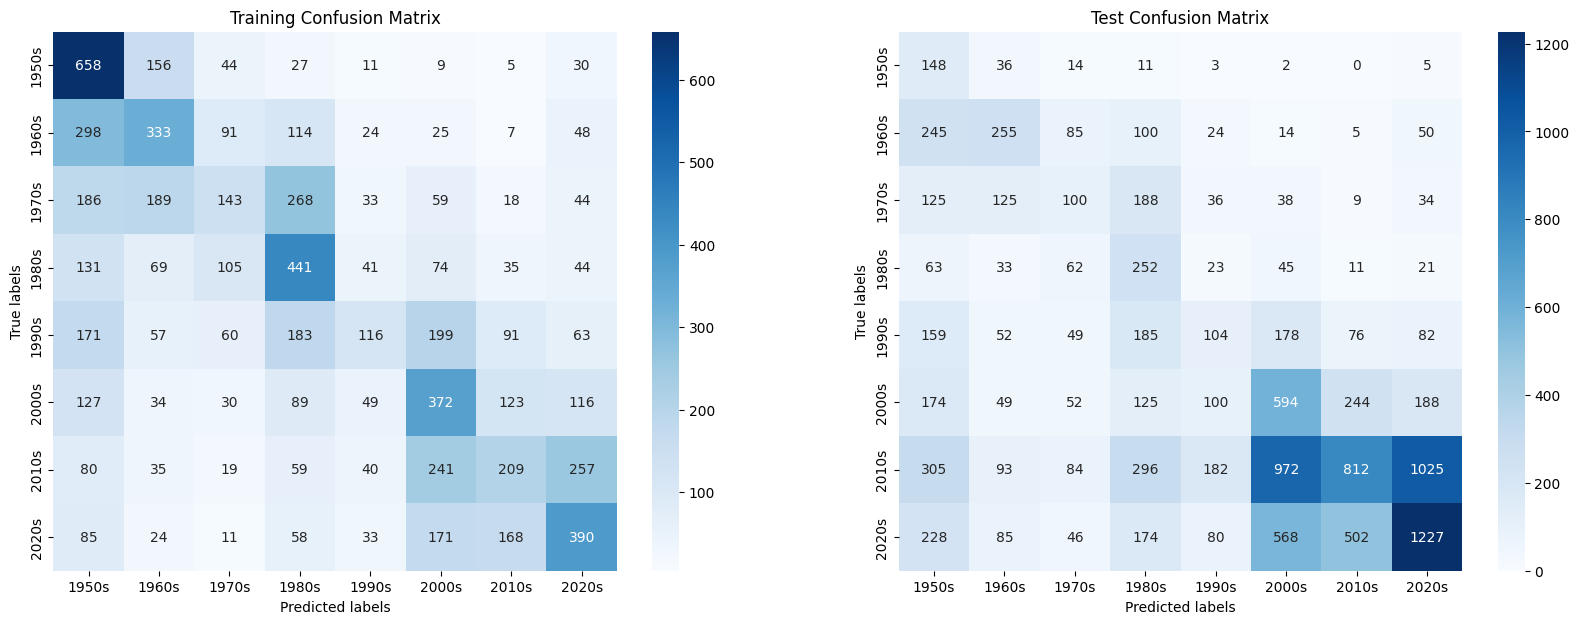

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [100]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 545.5594781168514, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.29941343761109135
SVM Classification Report:
              precision    recall  f1-score   support

       1950s       0.11      0.67      0.19       219
       1960s       0.27      0.36      0.31       778
       1970s       0.19      0.26      0.22       655
       1980s       0.24      0.43      0.31       510
       1990s       0.18      0.17      0.18       885
       2000s       0.24      0.33      0.28      1526
       2010s       0.47      0.24      0.32      3769
       2020s       0.46      0.34      0.39      2910

    accuracy                           0.30     11252
   macro avg       0.27      0.35      0.27     11252
weighted avg       0.36      0.30      0.31     11252



Text(0.5, 1.0, 'Training Confusion Matrix')

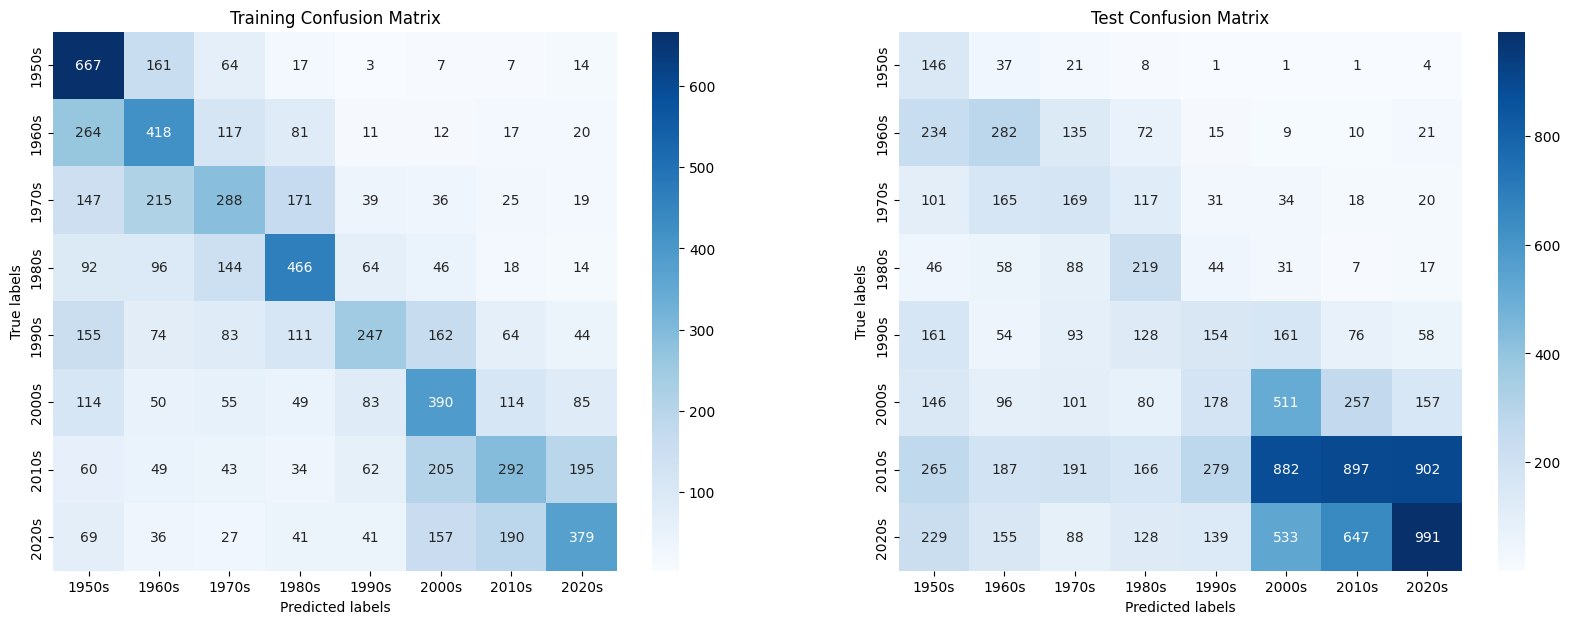

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [102]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [64, 128],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [2, 3, 4],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1417 - loss: 3.1540
120/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1246 - loss: 3.2193Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1633 - loss: 2.1920
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1420 - loss: 3.1243
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1387 - loss: 2.2092
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1497 - loss: 2.2034
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1419 - loss: 2.2424
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1316 - loss: 3.0801
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1748 - loss: 3.1101
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1373 - loss: 3.0872
Epoch 2/50
188/188 ━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3306 - loss: 1.7224
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3338 - loss: 1.6922 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3310 - loss: 1.7142
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2367 - loss: 1.8817
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.3048 - loss: 1.7454
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2518 - loss: 1.8708
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3047 - loss: 1.7462
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2455 - loss: 1.8861
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2510 - loss: 1.8801
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3325 - loss: 1.7173
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2480 - loss: 1.8733
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2440 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


164/188 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.3422 - loss: 1.6964Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.3416 - loss: 1.6967
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2435 - loss: 1.8869
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2422 - loss: 1.8717  
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2468 - loss: 1.8774
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2487 - loss: 1.8886
 57/188 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.1300 - loss: 4.0877  Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3322 - loss: 1.7118
150/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2461 - loss: 1.8947Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2531 - loss: 1.879110
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3268 - loss: 1.7282
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.14

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3476 - loss: 1.6944
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2350 - loss: 1.8783
 78/188 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2528 - loss: 1.8847Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.1598 - loss: 3.5238
Epoch 2/50
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2357 - loss: 1.8884
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.2385 - loss: 1.8727
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.2318 - loss: 1.8715
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2247 - loss: 2.053129
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.2425 - loss: 1.8732
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3387 - loss: 1.6977
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2158 - loss: 2.2217  
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2246 - loss: 2.0062
Epoch 5/50
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1:23 447ms/step - accuracy: 0.0938 - loss: 4.5040Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2341 - loss: 2.0395  
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3460 - loss: 1.695121
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.2462 - loss: 1.8774
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.2473 - loss: 1.8722
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1467 - loss: 3.5250
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2273 - loss: 1.8995
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2268 - loss: 1.9810
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.3372 - loss: 1.6903
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1641 - loss: 2.2508
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2355 - loss: 1.9581
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2360 - loss: 2.0092  
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2265 - loss: 2.0037
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.2523 - loss: 1.8705
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2385 - loss: 1.8915
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.2424 - loss: 1.8707
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2356 - loss: 1.9504
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2640 - loss: 1.9180
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2237 - loss: 1.9328
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2354 - loss: 1.8754 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2579 - loss: 1.9284
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2552 - loss: 1.8726
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2778 - loss: 1.8920
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2386 - loss: 1.9518
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2497 - loss: 1.8843
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2387 - loss: 2.0179
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2425 - loss: 1.9316
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2853 - loss: 1.8626
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2336 - loss: 1.9107
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2930 - loss: 1.8747 
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2339 - loss: 1.8810
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2276 - loss: 1.9449
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.9082
139/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2707 - loss: 1.9007  Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2277 - loss: 1.9151
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2985 - loss: 1.8099
133/188 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3091 - loss: 1.7580Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2696 - loss: 1.9009
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4062 - loss: 1.8445Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2377 - loss: 1.9112
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2657 - loss: 1.9218 
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2731 - loss: 1.8685
175/188 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3105 - loss: 1.7528Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3108 - loss: 1.7514
Epoch 31/50
188/188

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3154 - loss: 1.76719
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2436 - loss: 1.8975  
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2454 - loss: 1.8874
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3163 - loss: 1.7302
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3021 - loss: 1.7799
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3280 - loss: 1.7264
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2984 - loss: 1.8007
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1304 - loss: 2.0796
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2307 - loss: 1.9108
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3175 - loss: 1.7665
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3162 - loss: 1.7544
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3200 - loss: 1.7417
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3328 - loss: 1.7116
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3369 - loss: 1.7118
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3265 - loss: 1.7046
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2491 - loss: 1.8751
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2465 - loss: 1.9120
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2472 - loss: 1.8815
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3348 - loss: 1.7107
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1251 - loss: 2.0796 
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2468 - loss: 1.8832
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3281 - loss: 1.7097 
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


151/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3344 - loss: 1.7062Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3243 - loss: 1.6981
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2426 - loss: 1.8988
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3353 - loss: 1.7064
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2475 - loss: 1.8615
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3308 - loss: 1.7045
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2294 - loss: 1.9621
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3398 - loss: 1.7059    
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2454 - loss: 1.8767
Epoch 47/50
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.3508 - loss: 1.6922
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1189 - loss: 2.0795
Epoch 39/50
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0625 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 50/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3190 - loss: 1.7171Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2420 - loss: 1.9012
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3434 - loss: 1.7009
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3420 - loss: 1.7040
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2348 - loss: 1.9467
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3381 - loss: 1.6902
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2464 - loss: 1.8691
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3557 - loss: 1.6790
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1247 - loss: 2.0795
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2530 - loss: 1.8917 
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3407 - loss: 1.7023
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3422 - loss: 1.6943
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3248 - loss: 1.7281
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3337 - loss: 1.7050
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.1432 - loss: 3.4549
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1189 - loss: 2.0795
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3505 - loss: 1.6830 
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1583 - loss: 2.3474
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2445 - loss: 1.8997
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1875 - loss: 2.1707Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3320 - loss: 1.7044
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3388 - loss: 1.6958
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1631 - loss: 2.2357
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2053 - loss: 2.0404
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.3263 - loss: 1.7159
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2368 - loss: 1.898418
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3378 - loss: 1.6995
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3351 - loss: 1.6965 
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3406 - loss: 1.6944
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2194 - loss: 2.0420
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1241 - loss: 2.0795
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2338 - loss: 1.9836
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2182 - loss: 2.0221 
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2652 - loss: 1.8852
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2727 - loss: 1.8917
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2375 - loss: 1.9465 
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2377 - loss: 1.9440 
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 1.9416
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2449 - loss: 1.8949
Epoch 37/50
 43/188 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3376 - loss: 1.6987Epoch 1/50
 48/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2151 - loss: 1.9332

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1256 - loss: 2.0795
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2718 - loss: 1.8753
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2904 - loss: 1.8496
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2451 - loss: 1.9295
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2161 - loss: 1.9426
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2589 - loss: 1.9024
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2364 - loss: 1.9308
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2562 - loss: 1.8798
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2911 - loss: 1.8351   
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2875 - loss: 1.8565
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1223 - loss: 2.0796
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.15

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2823 - loss: 1.8544
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2352 - loss: 2.0198
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2440 - loss: 1.9197
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3441 - loss: 1.6989
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1430 - loss: 4.3081
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2745 - loss: 1.8633
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2239 - loss: 2.0097
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2497 - loss: 1.8784 
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2286 - loss: 1.9347
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2867 - loss: 1.8331
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2850 - loss: 1.8456
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2945 - loss: 1.8273
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2374 - loss: 1.9677
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2431 - loss: 1.9088
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2886 - loss: 1.8307
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2533 - loss: 1.8825 
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2893 - loss: 1.8111
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss: 1.9125
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2812 - loss: 2.0854Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2413 - loss: 1.9518
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2830 - loss: 1.8240
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2433 - loss: 1.9182  
 36/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2201 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2960 - loss: 1.8155
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2945 - loss: 1.8004
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2902 - loss: 1.7966
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2322 - loss: 1.920641
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2925 - loss: 1.8186
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2355 - loss: 1.9057
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3113 - loss: 1.7794 
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2201 - loss: 2.0370
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 1.9016
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.9462
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.9311
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3260 - loss: 1.7307 
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2520 - loss: 1.9032
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3476 - loss: 1.7018
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3309 - loss: 1.7089
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3211 - loss: 1.7252
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2344 - loss: 1.9043
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3358 - loss: 1.7183
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.8928
Epoch 50/50
 35/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2291 - loss: 1.8772 Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2384 - loss: 1.9100 
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.3187 - loss: 1.7266
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3322 - loss: 1.7290
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/stepacy: 0.3438 - loss: 1.907
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2290 - loss: 1.9008
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1:42 550ms/step - accuracy: 0.0625 - loss: 5.8539Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2338 - loss: 1.8893
114/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 1.8996Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.1246 - loss: 4.8540  
119/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1295 - loss: 4.5997Epoch 1/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2349 - loss: 1.9022
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3157 - loss: 1.7515
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2491 - loss: 1.8935
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1368 - loss: 4.2026
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3368 - loss: 1.7133
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2366 - loss: 1.9116
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1456 - loss: 2.3430 
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2479 - loss: 1.9070
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3378 - loss: 1.7135  
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2473 - loss: 1.9005
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3197 - loss: 1.7305
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2736 - loss: 1.8871
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2669 - loss: 1.9123
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2388 - loss: 1.9052
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3305 - loss: 1.6941
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3306 - loss: 1.7187
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.8836
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 1.9490
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2710 - loss: 1.9043
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.2998 - loss: 1.8412
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2969 - loss: 1.8444
Epoch 7/50
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2456 - loss: 1.9106
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2538 - loss: 1.8790  
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2764 - loss: 1.8859
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2416 - loss: 1.89780
141/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2763 - loss: 1.8624Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2431 - loss: 1.9034
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2765 - loss: 1.8594  
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1600 - loss: 2.331521
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2869 - loss: 1.8594
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2332 - loss: 1.9506  
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2285 - loss: 1.9196
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2518 - loss: 1.8839
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2472 - loss: 1.8931
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2878 - loss: 1.8243
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2879 - loss: 1.8340
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2785 - loss: 1.8327 
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.8897
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2959 - loss: 1.8261
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2334 - loss: 1.9364
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1197 - loss: 2.0834 
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2528 - loss: 1.8801
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2333 - loss: 1.8913
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2805 - loss: 1.8756
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2496 - loss: 1.8938
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1186 - loss: 2.0797
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2950 - loss: 1.7928
Epoch 16/50
 62/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2883 - loss: 1.7933Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1151 - loss: 2.0863
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3082 - loss: 1.7963 
 37/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3046 - loss: 1.7713 Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2534 - loss: 1.8881
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2857 - loss: 1.8256
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.7880
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.9191
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.29

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 1.7479
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2994 - loss: 1.7841 
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.9211
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1175 - loss: 2.0796
 13/188 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2762 - loss: 1.8579 Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 1.9453
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1190 - loss: 2.0796 
137/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3214 - loss: 1.7640Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2990 - loss: 1.7572 
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1180 - loss: 2.0796 
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3228 - loss: 1.7427
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3197 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3118 - loss: 1.7486
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3305 - loss: 1.7412
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3129 - loss: 1.7514
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3094 - loss: 1.7543
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1491 - loss: 2.2839 
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2260 - loss: 1.9430
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1158 - loss: 2.0795
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.7691
 14/188 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3558 - loss: 1.7124 Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1166 - loss: 2.0795
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1161 - loss: 2.0795
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1248 - loss: 2.0795
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3490 - loss: 1.7015
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1309 - loss: 2.0796
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1205 - loss: 2.0795
Epoch 43/50
105/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3335 - loss: 1.7163Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.1223 - loss: 2.079
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1223 - loss: 2.0795
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3290 - loss: 1.7141
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2389 - loss: 1.9103
Epoch 34/50
 76/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1061 - loss: 2.0796Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3428 - loss: 1.6872
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1196 - loss: 2.0795 
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1131 - loss: 2.0796
 48/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3222 - loss: 1.7134Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1196 - loss: 2.0795
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1201 - loss: 2.0795
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2962 - loss: 1.7989 
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3441 - loss: 1.7045
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3339 - loss: 1.7076 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3271 - loss: 1.7063
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1206 - loss: 2.0796
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.2451 - loss: 1.908
149/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1242 - loss: 2.0795

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 24/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7426 Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1243 - loss: 2.0795
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1241 - loss: 2.0795  
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1227 - loss: 2.0796
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3346 - loss: 1.7120
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2953 - loss: 1.7824
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1227 - loss: 2.0796  
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1582 - loss: 2.2922
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3282 - loss: 1.7145  
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2420 - loss: 1.9087
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.1302 - loss: 2.0795
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1289 - loss: 2.0795


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 2.0568Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1560 - loss: 2.2964 
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2988 - loss: 1.7779
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2322 - loss: 2.0528
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3391 - loss: 1.7153
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1114 - loss: 2.07955
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2143 - loss: 2.0763
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1291 - loss: 2.0795
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1241 - loss: 2.0796   
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2179 - loss: 2.0598
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3043 - loss: 1.7665
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1221 - loss: 2.0796
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2727 - loss: 1.8749
142/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1295 - loss: 2.0864Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3065 - loss: 1.7754
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.2857 - loss: 1.887
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1267 - loss: 2.0858
Epoch 4/50
177/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2855 - loss: 1.8853Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1142 - loss: 2.0796
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2854 - loss: 1.8844
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2192 - loss: 1.9157 
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2637 - loss: 1.9144
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1241 - loss: 2.0871

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2865 - loss: 1.8427
Epoch 10/50
183/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2263 - loss: 1.9249Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2265 - loss: 1.9245
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2791 - loss: 1.8333
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1383 - loss: 2.1891
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1198 - loss: 2.0795
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2870 - loss: 1.8495
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3011 - loss: 1.7717 
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2733 - loss: 1.8559
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2405 - loss: 1.9098
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2821 - loss: 1.8458 
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2188 - loss: 1.8992Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2900 - loss: 1.8150
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1194 - loss: 2.0795
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1277 - loss: 2.0796
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2892 - loss: 1.7963
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2908 - loss: 1.8062
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1257 - loss: 2.0795
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3274 - loss: 1.7362
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1207 - loss: 2.0796
 27/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1162 - loss: 2.0795 Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1289 - loss: 2.0795
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1549 - loss: 2.4153
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3015 - loss: 1.7848
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1264 - loss: 2.0796 
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3041 - loss: 1.7902
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1235 - loss: 2.0795
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1202 - loss: 2.0796
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3049 - loss: 1.7721
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3194 - loss: 1.7517
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 1.7748 
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1190 - loss: 2.0796
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2956 - loss: 1.7973
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1224 - loss: 2.0795
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2976 - loss: 1.7807
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1167 - loss: 2.0796
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2496 - loss: 1.9522 
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2899 - loss: 1.8016
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1259 - loss: 2.0796
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2183 - loss: 2.0801
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 1.7864
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3198 - loss: 1.7615
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3041 - loss: 1.7852
 62/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 - loss: 1.7918Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.10

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


145/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3305 - loss: 1.7298Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1149 - loss: 2.0795
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1138 - loss: 2.0795
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 1.7280
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3097 - loss: 1.8007 
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.1133 - loss: 2.0793
177/188 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3308 - loss: 1.7505

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.0795Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2993 - loss: 1.7891
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1224 - loss: 2.0795
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3299 - loss: 1.7508 
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1138 - loss: 2.0795
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2870 - loss: 1.8163
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1286 - loss: 2.0796
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1190 - loss: 2.0795 
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1247 - loss: 2.0795 
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.7771
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2966 - loss: 1.7896    
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1235 - loss: 2.0796
182/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2348 - loss: 1.9103Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2350 - loss: 1.9102
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1302 - loss: 2.0795
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3235 - loss: 1.7433
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2969 - loss: 1.8102
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 1.7606
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2390 - loss: 1.9046
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2903 - loss: 1.8171
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3170 - loss: 1.7378
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1069 - loss: 2.0796
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1184 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2188 - loss: 2.0791Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1279 - loss: 2.0795
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3242 - loss: 1.7403
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2334 - loss: 1.903886 
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3250 - loss: 1.734036
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3211 - loss: 1.7544
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1486 - loss: 3.1101  
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2827 - loss: 1.8371
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2949 - loss: 1.8065
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1131 - loss: 2.0796
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3151 - loss: 1.7533
 77/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2394 - loss: 1.9098
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2970 - loss: 1.7925
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7901
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1170 - loss: 2.0795
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3168 - loss: 1.7342
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2133 - loss: 2.0517
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1160 - loss: 2.0796
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3196 - loss: 1.7403
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/stepEpoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2319 - loss: 1.9719
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4062 - loss: 1.6958Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2319 - loss: 1.9098 
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


107/188 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.1420 - loss: 3.3167Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2297 - loss: 2.0032
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2453 - loss: 1.9391
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2867 - loss: 1.8049
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2422 - loss: 1.8939
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2975 - loss: 1.7876
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1465 - loss: 3.1431 
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3206 - loss: 1.7351
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3297 - loss: 1.7459
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1191 - loss: 2.0795
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2360 - loss: 1.9308
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2961 - loss: 1.7811
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2305 - loss: 1.9474
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2339 - loss: 1.9669
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3234 - loss: 1.7363
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3108 - loss: 1.7746
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2441 - loss: 1.9030
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3303 - loss: 1.7204
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2476 - loss: 1.8829
Epoch 47/50
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2769 - loss: 1.8644
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3196 - loss: 1.7301
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2493 - loss: 1.9365
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2341 - loss: 1.9166  
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2418 - loss: 1.8951
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2868 - loss: 1.8255
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2500 - loss: 1.8423Epoch 14/50
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2468 - loss: 1.8754
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3335 - loss: 1.7243 
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3095 - loss: 1.7678
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2335 - loss: 1.8920
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2780 - loss: 1.8515
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2872 - loss: 1.7832
  1/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1562 - loss: 1.9408Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.2400 - loss: 1.9032
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2916 - loss: 1.8088  
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2400 - loss: 1.8808
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2308 - loss: 1.9152 
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2523 - loss: 1.8780
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2601 - loss: 1.9004
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2477 - loss: 1.8928
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3153 - loss: 1.754248
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2886 - loss: 1.8102
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2492 - loss: 1.8748 
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2446 - loss: 1.8908 
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3244 - loss: 1.7459
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.2135 - loss: 2.0409
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2944 - loss: 1.8029
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2537 - loss: 1.8835  
Epoch 18/50
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2383 - loss: 1.8988
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2346 - loss: 1.8931
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2776 - loss: 1.8595
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3243 - loss: 1.7259
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2332 - loss: 1.9527
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2520 - loss: 1.8947
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2990 - loss: 1.7910
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2500 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2884 - loss: 1.8425  
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 1.886221
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2628 - loss: 1.8988
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3113 - loss: 1.7863
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3001 - loss: 1.7826
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2351 - loss: 1.8961
114/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 1.7833Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1434 - loss: 2.2059
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2469 - loss: 1.8645 
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2445 - loss: 1.9013  
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2780 - loss: 1.8256
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2260 - loss: 1.9320
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2411 - loss: 1.8941
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2446 - loss: 1.8806
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3078 - loss: 1.7663
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3238 - loss: 1.7528 
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3200 - loss: 1.7392
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2919 - loss: 1.8009
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2393 - loss: 1.8762
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3286 - loss: 1.7223
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3149 - loss: 1.7721  
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2412 - loss: 1.8763 
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 1.8846
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3313 - loss: 1.7321
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2986 - loss: 1.7688
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2458 - loss: 1.8832
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3340 - loss: 1.7297
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3256 - loss: 1.7260 
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2994 - loss: 1.7566 
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1974 - loss: 2.3093
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2344 - loss: 1.9123
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2987 - loss: 1.7723
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2436 - loss: 1.8771
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3088 - loss: 1.7700 
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3343 - loss: 1.7066
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2435 - loss: 1.8833
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2305 - loss: 1.9722
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3287 - loss: 1.7341
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3319 - loss: 1.7282
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2144 - loss: 2.098899
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.2406 - loss: 1.95328
100/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3111 - loss: 1.7620Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.3253 - loss: 1.7476
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2315 - loss: 1.9111
Epoch 21/50
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4688 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3081 - loss: 1.7641 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3323 - loss: 1.7246
Epoch 27/50
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2415 - loss: 1.9508 
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3232 - loss: 1.7238
 51/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1235 - loss: 4.1325    Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2346 - loss: 2.0265 
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3161 - loss: 1.7601 
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3221 - loss: 1.7430
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1486 - loss: 3.5434
 46/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3198 - loss: 1.7512 Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3261 - loss: 1.7240
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3090 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3259 - loss: 1.7146
Epoch 50/50
 96/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2338 - loss: 1.9618Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2403 - loss: 1.8981
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3271 - loss: 1.7412 
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2432 - loss: 1.9368 
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3115 - loss: 1.7503
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2332 - loss: 1.9590
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3149 - loss: 1.7444
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2251 - loss: 2.0191
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2140 - loss: 2.0579
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3286 - loss: 1.7303
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3263 - loss: 1.7401
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2264 - loss: 1.8949
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1558 - loss: 2.2712
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3074 - loss: 1.7415
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1378 - loss: 2.2791
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2374 - loss: 1.9496
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2375 - loss: 1.9227 
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2242 - loss: 1.9769
 42/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2537 - loss: 1.8927 Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3177 - loss: 1.7424
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3260 - loss: 1.7283
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.22

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2346 - loss: 1.9081
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3278 - loss: 1.7172 
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2332 - loss: 1.9292
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2812 - loss: 1.8318
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.8991
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2329 - loss: 1.8988
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3208 - loss: 1.7301
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2962 - loss: 1.8286
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2884 - loss: 1.8169 
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2506 - loss: 1.8967
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3412 - loss: 1.6985
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2292 - loss: 1.9114
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3317 - loss: 1.7041
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2388 - loss: 1.8981
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2797 - loss: 1.8795
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3051 - loss: 1.8005 
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2324 - loss: 1.9006
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2539 - loss: 1.8828
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3253 - loss: 1.7236
Epoch 41/50
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2889 - loss: 1.8129
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2390 - loss: 1.8984
139/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 1.9202Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 1.9130
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2477 - loss: 1.8762
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3021 - loss: 1.7898 
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2376 - loss: 1.8867
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3076 - loss: 1.7740
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2154 - loss: 2.0546
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2958 - loss: 1.8254 
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3087 - loss: 1.7703
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2282 - loss: 1.9088
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2529 - loss: 1.8853
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2385 - loss: 1.8979 
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3218 - loss: 1.7479
Epoch 24/50
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2500 - loss: 1.9102Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2953 - loss: 1.8308
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2950 - loss: 1.8088
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2345 - loss: 1.884768
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2421 - loss: 1.8933 
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2443 - loss: 1.8866  
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2484 - loss: 1.8792
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3121 - loss: 1.7679
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3159 - loss: 1.7409
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3155 - loss: 1.7440 
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2428 - loss: 1.8924
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2439 - loss: 1.8946   
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3232 - loss: 1.7507
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2366 - loss: 1.8883
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3151 - loss: 1.7564
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3153 - loss: 1.7553
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1041 - loss: 2.0806
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1292 - loss: 3.5012
 39/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2510 - loss: 1.8503 Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2988 - loss: 1.7837
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2929 - loss: 1.8220
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1240 - loss: 2.0796
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3263 - loss: 1.7145
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3355 - loss: 1.7246
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2302 - loss: 1.9233
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2427 - loss: 1.8703
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3264 - loss: 1.7354
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2923 - loss: 1.7711
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2547 - loss: 1.8757
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2496 - loss: 1.8850
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1209 - loss: 2.0796
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3334 - loss: 1.6976
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1333 - loss: 3.5937  
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3069 - loss: 1.7492 
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1109 - loss: 2.0796
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3449 - loss: 1.7063
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3376 - loss: 1.720149
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2263 - loss: 1.8862 
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1149 - loss: 2.0796
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3300 - loss: 1.7121
 52/188 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.2593 - loss: 1.8567Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2388 - loss: 1.9338
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.1421 - loss: 2.4161
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1206 - loss: 2.0796
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2055 - loss: 2.0849
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3458 - loss: 1.6766
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3244 - loss: 1.7308
 42/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2446 - loss: 1.8131 Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1161 - loss: 2.0795
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2371 - loss: 1.9145
128/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2767 - loss: 1.7774Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3363 - loss: 1.7030
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3284 - loss: 1.7206
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 1.9571
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2855 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2022 - loss: 2.0863
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2361 - loss: 1.9168
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 1.9344  
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3570 - loss: 1.6919
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2519 - loss: 1.8662
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1128 - loss: 2.0796
Epoch 38/50
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3153 - loss: 1.7456
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2282 - loss: 1.9540
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepuracy: 0.3438 - loss: 1.999
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1187 - loss: 2.0796
Epoch 34/50
 43/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2472 - loss: 1.9616 Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3251 - loss: 1.7234
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2452 - loss: 1.8789
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1175 - loss: 2.0796  
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3095 - loss: 1.7427
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1242 - loss: 2.0796
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2420 - loss: 1.9498
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3238 - loss: 1.7093
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2411 - loss: 1.9342
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1363 - loss: 2.2728
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2392 - loss: 1.9166
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2422 - loss: 1.9636
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2439 - loss: 1.8773
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2780 - loss: 1.8673
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3335 - loss: 1.7138
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2423 - loss: 1.9148 
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2410 - loss: 1.8782
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2838 - loss: 1.8163
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2358 - loss: 1.9077
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1281 - loss: 2.0795
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2896 - loss: 1.8349
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1179 - loss: 2.0796
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3320 - loss: 1.7118 
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2390 - loss: 1.9142
 37/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2369 - loss: 1.9197
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2905 - loss: 1.8277
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2968 - loss: 1.7957
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2441 - loss: 1.9113
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3415 - loss: 1.7188
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3370 - loss: 1.7069
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2439 - loss: 1.9703
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1202 - loss: 2.0795
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 1.9120
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepuracy: 0.1250 - loss: 2.07
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2781 - loss: 1.8020
Epoch 15/50
 35/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2802 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 1.7993
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.8985
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3379 - loss: 1.7117
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1196 - loss: 2.0795
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2630 - loss: 1.9217
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2386 - loss: 1.8972
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2922 - loss: 1.8108
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.2553 - loss: 1.8856  
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1180 - loss: 2.0796
Epoch 43/50
 64/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2733 - loss: 1.9144Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 1.9050
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2957 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1187 - loss: 2.0796  
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2655 - loss: 1.9085
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2414 - loss: 1.9089    
140/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2976 - loss: 1.8064Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1302 - loss: 2.2630
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2952 - loss: 1.8074
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.9076
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2903 - loss: 1.8074
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2409 - loss: 1.8973
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2929 - loss: 1.7973
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1235 - loss: 2.0795
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/188 ━━━━━━━━━━━━━━━━━━━━ 1:36 518ms/step - accuracy: 0.1562 - loss: 5.7944Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2482 - loss: 1.8986
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2928 - loss: 1.8145  
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2817 - loss: 1.8062
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2545 - loss: 1.8955
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1205 - loss: 2.0795
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2812 - loss: 1.864287
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2098 - loss: 2.0833
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2445 - loss: 1.9049
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1453 - loss: 2.2404
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1484 - loss: 4.2487
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2855 - loss: 1.8149
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2957 - loss: 1.7907
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2287 - loss: 1.9515
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2430 - loss: 1.9012
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2727 - loss: 1.8618
148/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1152 - loss: 2.0814Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2980 - loss: 1.7934
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3068 - loss: 1.7707
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2430 - loss: 1.8890
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.2611 - loss: 1.8689
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1155 - loss: 2.0813
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 1.8904 
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2339 - loss: 1.9507
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2699 - loss: 1.8535
104/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1313 - loss: 4.8139Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3129 - loss: 1.7740
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.7808
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2317 - loss: 1.9051
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2950 - loss: 1.8105
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3084 - loss: 1.7661
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1249 - loss: 2.0801
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2415 - loss: 1.9096
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1144 - loss: 2.0796
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.137

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2416 - loss: 1.9361
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3271 - loss: 1.7394
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1242 - loss: 2.0796
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3201 - loss: 1.7264
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2926 - loss: 1.7968
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2456 - loss: 1.8926
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3148 - loss: 1.7488
 60/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3184 - loss: 1.7562Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1186 - loss: 2.0796
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss: 1.9220
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3049 - loss: 1.7785
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1235 - loss: 2.0796Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1235 - loss: 2.0796
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3090 - loss: 1.7320
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2475 - loss: 1.9177
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3138 - loss: 1.7511
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3140 - loss: 1.7445
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2918 - loss: 1.7790
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2471 - loss: 1.9016
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2416 - loss: 1.9234
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 1.7605
138/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3371 - loss: 1.7235Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.226

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2445 - loss: 1.9074
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2314 - loss: 1.9333
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3036 - loss: 1.7838
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1192 - loss: 2.0796
 52/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2565 - loss: 1.9924Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3268 - loss: 1.7349
 85/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2584 - loss: 1.9863Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2686 - loss: 1.9192 
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1254 - loss: 2.0795
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3135 - loss: 1.7533
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3354 - loss: 1.7164
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2585 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3152 - loss: 1.7697 
Epoch 36/50
 86/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2399 - loss: 2.0075Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2431 - loss: 1.9025 
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2871 - loss: 1.8678
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1074 - loss: 2.0796
Epoch 7/50
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7506
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2430 - loss: 1.9027
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2416 - loss: 2.0035
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2399 - loss: 1.9054
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3005 - loss: 1.7674
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1140 - loss: 2.0796
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2493 - loss: 1.9126
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3015 - loss: 1.8097
103/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1231 - loss: 2.0795Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2916 - loss: 1.8253
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2433 - loss: 1.8999
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2522 - loss: 1.8978
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2925 - loss: 1.8034
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1328 - loss: 2.0794
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3124 - loss: 1.7433
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1233 - loss: 2.0795 
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2910 - loss: 1.8398 
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2867 - loss: 1.8200
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2863 - loss: 1.8191
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1135 - loss: 2.0796
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1307 - loss: 2.0796
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: 1.7922
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2354 - loss: 1.9014
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2468 - loss: 1.8876
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2960 - loss: 1.8110
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1202 - loss: 2.1311
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3052 - loss: 1.7708
101/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1261 - loss: 2.0795Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.25

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1278 - loss: 2.0795
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2427 - loss: 1.8860
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3060 - loss: 1.7654
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1281 - loss: 2.07951
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.8929
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3098 - loss: 1.7509
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2943 - loss: 1.78092
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1256 - loss: 2.0796
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3176 - loss: 1.7563 
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1152 - loss: 2.0795
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3210 - loss: 1.7474
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3078 - loss: 1.7630
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3216 - loss: 1.7331  
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2333 - loss: 1.8897
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1133 - loss: 2.0796   
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2337 - loss: 1.8993 
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1161 - loss: 2.0796
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3087 - loss: 1.7627
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1343 - loss: 3.9111
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1314 - loss: 3.9261
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2988 - loss: 1.7725
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3199 - loss: 1.7367
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3245 - loss: 1.7366 
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3088 - loss: 1.7638
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1180 - loss: 2.0798
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2402 - loss: 1.8950 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1265 - loss: 2.0796
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3173 - loss: 1.7351
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.1475 - loss: 2.0794 
 89/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3138 - loss: 1.7668

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3089 - loss: 1.7513
Epoch 30/50
  1/188 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2188 - loss: 1.7171Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1216 - loss: 2.0797
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1322 - loss: 2.0802
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1261 - loss: 2.0795
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.7442
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1127 - loss: 2.0797
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1314 - loss: 2.0795
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3126 - loss: 1.7654
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3153 - loss: 1.7549
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3119 - loss: 1.7600
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3189 - loss: 1.7355
Epoch 40/50
134/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3197 - loss: 1.7645Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1254 - loss: 2.0795
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1204 - loss: 2.0795
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.0795
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3335 - loss: 1.7031
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3177 - loss: 1.7651
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2778 - loss: 1.8545
 66/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1288 - loss: 2.0794Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1150 - loss: 2.0796
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1286 - loss: 2.0795
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.279

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2913 - loss: 1.8369 
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2793 - loss: 1.8321
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1181 - loss: 2.0796
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1901 - loss: 2.1093
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3105 - loss: 1.7669
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3238 - loss: 1.7273
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1164 - loss: 2.0796
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1292 - loss: 2.0795
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3339 - loss: 1.7256
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1197 - loss: 2.0796
Epoch 44/50
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1111 - loss: 2.0796
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 31/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2503 - loss: 1.8700 Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2637 - loss: 1.9094
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1197 - loss: 2.0795 
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3031 - loss: 1.8032
 75/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1137 - loss: 2.0795Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1146 - loss: 2.0796
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1253 - loss: 2.0795
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3278 - loss: 1.7013
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3127 - loss: 1.7512
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1247 - loss: 2.0794
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3020 - loss: 1.7717
Epoch 45/50
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2683 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1311 - loss: 2.0795
Epoch 35/50
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0312 - loss: 2.0796Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1175 - loss: 2.0796
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2956 - loss: 1.8050
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1305 - loss: 2.0795
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0938 - loss: 2.0796Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1181 - loss: 2.0795
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3100 - loss: 1.7367
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2788 - loss: 1.8673 
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2642 - loss: 1.8852
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1177 - loss: 2.0796  
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3073 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2955 - loss: 1.8017
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1250 - loss: 2.0796Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1198 - loss: 2.0796
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2661 - loss: 1.8562
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3296 - loss: 1.7358 
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2683 - loss: 1.8656
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3056 - loss: 1.7886
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1158 - loss: 2.0796
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1225 - loss: 2.0796
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1192 - loss: 2.0796
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2120 - loss: 2.0733
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3231 - loss: 1.7413
Epoch 42/50
176/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 1.7747Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1341 - loss: 2.0795
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2550 - loss: 1.9000
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3119 - loss: 1.7752
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1224 - loss: 2.0795
159/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1136 - loss: 2.0796Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2860 - loss: 1.8084
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1142 - loss: 2.0796
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2879 - loss: 1.8364
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3121 - loss: 1.7597
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1199

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2871 - loss: 1.7817
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2875 - loss: 1.8152
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1198 - loss: 2.0796
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1135 - loss: 2.0796 
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1263 - loss: 2.0797
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3202 - loss: 1.7457
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1137 - loss: 2.0796
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3211 - loss: 1.7421
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2990 - loss: 1.7876 
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.1244 - loss: 2.0795
167/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2782 - loss: 1.8186Epoch 1/50
 95/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2793 - loss: 1.8176
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2969 - loss: 1.7912
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1202 - loss: 2.0795
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3027 - loss: 1.7650
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1233 - loss: 2.0795  
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.3004 - loss: 1.816
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3274 - loss: 1.7310
Epoch 42/50
185/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1264 - loss: 2.0795

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1262 - loss: 2.0795
Epoch 13/50
 65/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3357 - loss: 1.7460Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3025 - loss: 1.7775
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1202 - loss: 2.0796
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2976 - loss: 1.8155
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2968 - loss: 1.7959
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3253 - loss: 1.7553   
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1288 - loss: 4.8193
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3228 - loss: 1.7492
113/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1161 - loss: 2.0795Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3040 - loss: 1.7846
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.29

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1185 - loss: 2.0796
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2834 - loss: 1.9127
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2887 - loss: 1.7820
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3151 - loss: 1.7395
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1203 - loss: 2.0796
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3139 - loss: 1.7629
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1315 - loss: 2.0795
Epoch 35/50
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.0796 
 74/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3217 - loss: 1.7269Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2717 - loss: 1.8977
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3017 - loss: 1.7699
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1146

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3149 - loss: 1.7690
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2594 - loss: 1.8922
 42/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1195 - loss: 2.0795Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2930 - loss: 1.7913
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1170 - loss: 2.0796
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3167 - loss: 1.7755
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1191 - loss: 2.0795
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2804 - loss: 1.8627   
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1536 - loss: 2.4395
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1234 - loss: 2.0795
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3084 - loss: 1.7835
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.11

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1167 - loss: 2.0796
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1208 - loss: 2.0795
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3123 - loss: 1.7486
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2986 - loss: 1.7533 
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1175 - loss: 2.0796
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2906 - loss: 1.8185
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2833 - loss: 1.8432
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1266 - loss: 2.0795
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2817 - loss: 1.8587
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1216 - loss: 2.0796 
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1164 - loss: 2.0796
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1273 - loss: 2.0795
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2846 - loss: 1.8246 
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3015 - loss: 1.7681
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1206 - loss: 2.0796
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1299 - loss: 2.0796
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 2.0973
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3096 - loss: 1.7638
 30/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1177 - loss: 2.0794 Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1208 - loss: 2.0795
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1186 - loss: 2.0795
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3022 - loss: 1.7953   
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2938 - loss: 1.7962
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1169 - loss: 2.0795
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1191 - loss: 2.0796
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3026 - loss: 1.7736
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2960 - loss: 1.7884
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2776 - loss: 1.8809
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2926 - loss: 1.8051
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2364 - loss: 1.9647 
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1157 - loss: 2.0795
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1193 - loss: 2.0796
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1207 - loss: 2.0795 
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3273 - loss: 1.7591 
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2445 - loss: 1.9075
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3097 - loss: 1.7417
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 1.759610
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1220 - loss: 2.0795
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2465 - loss: 1.8917
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3111 - loss: 1.7660 
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1140 - loss: 2.0796
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1250 - loss: 2.0796
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 1.9156
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1260 - loss: 2.0795 
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
115/188 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3017 - loss: 1.8057Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3017 - loss: 1.8056
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3104 - loss: 1.7688
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2465 - loss: 1.8925
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3238 - loss: 1.7440
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1327 - loss: 3.1682  
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3241 - loss: 1.7507
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2513 - loss: 1.8900
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1165 - loss: 2.0795
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1236 - loss: 2.0795
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2185 - loss: 1.9046
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2555 - loss: 1.8896  
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3133 - loss: 1.7436
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2239 - loss: 2.0499
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1118 - loss: 2.0796
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1145 - loss: 2.0796
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2384 - loss: 1.8932 
162/188 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3180 - loss: 1.7605Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2202 - loss: 1.9740
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3205 - loss: 1.7652
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3116 - loss: 1.79106
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2358 - loss: 1.9004
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2990 - loss: 1.7657
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2433 - loss: 1.9355
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3264 - loss: 1.7356
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2437 - loss: 1.8864
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2405 - loss: 1.9004
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2299 - loss: 1.9310
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2425 - loss: 1.8809
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3229 - loss: 1.7330
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3113 - loss: 1.7602  
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2389 - loss: 1.893879
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2406 - loss: 1.9020
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1751 - loss: 2.1209Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2277 - loss: 1.9264
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3287 - loss: 1.7368
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.9122 
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2430 - loss: 1.8703
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1784 - loss: 2.1114
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3261 - loss: 1.7335
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 1.8988
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2351 - loss: 1.8908
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1808 - loss: 2.1229
140/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.9326Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3121

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2468 - loss: 1.9546
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3060 - loss: 1.77229
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1471 - loss: 2.2469
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2493 - loss: 1.8948
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2382 - loss: 1.9636
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2450 - loss: 1.9135 
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3255 - loss: 1.7428
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2261 - loss: 1.9138
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2561 - loss: 1.8733
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2188 - loss: 1.9585Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3168 - loss: 1.7549
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2805 - loss: 1.8575
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2350 - loss: 1.8692
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2815 - loss: 1.8398
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2498 - loss: 1.8964
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.2437 - loss: 1.9105 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2657 - loss: 1.8770
Epoch 8/50
107/188 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.2922 - loss: 1.8453

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3184 - loss: 1.7339
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2436 - loss: 1.9105
Epoch 49/50
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2622 - loss: 1.9197
Epoch 6/50
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.2715 - loss: 1.8487
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3066 - loss: 1.76888 
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2901 - loss: 1.8434
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2396 - loss: 1.9088
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3249 - loss: 1.7495
 95/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2766 - loss: 1.8718  Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2803 - loss: 1.865445
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2377 - loss: 1.9078
 90/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2908 - loss: 1.8107
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2806 - loss: 1.8297 
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2237 - loss: 2.1113
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2423 - loss: 1.9003
Epoch 4/50
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2444 - loss: 1.9012
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2391 - loss: 1.9365
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.3052 - loss: 1.7942
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.2772 - loss: 1.8332
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2947 - loss: 1.80821
 23/188 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3060 - loss: 1.8267Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3218 - loss: 1.750045
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2963 - loss: 1.8029
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2960 - loss: 1.7788
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2384 - loss: 1.8917
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2316 - loss: 1.9115
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1562 - loss: 1.8943Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2350 - loss: 1.8974
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2476 - loss: 1.8816
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2316 - loss: 1.9148
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3111 - loss: 1.7673
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2188 - loss: 1.7872: 1.7616  

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3066 - loss: 1.7757
Epoch 32/50
144/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2950 - loss: 1.8015Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2947 - loss: 1.80133
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.3046 - loss: 1.7645
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.2449 - loss: 1.8981
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2188 - loss: 1.8097Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2397 - loss: 1.8837 5
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2363 - loss: 1.9075
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3009 - loss: 1.7720
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2407 - loss: 1.9151
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3090 - loss: 1.7400
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 98/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2459 - loss: 1.8781Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2843 - loss: 1.7928
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3189 - loss: 1.7379
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2152 - loss: 1.9769
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3144 - loss: 1.761516
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2474 - loss: 1.8892
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.7952
136/188 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3188 - loss: 1.7430Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2217 - loss: 1.9863
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3044 - loss: 1.7620
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2526 - loss: 1.8842
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.249

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2258 - loss: 1.8969
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3223 - loss: 1.74071
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3043 - loss: 1.7698
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2327 - loss: 1.9124 
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3105 - loss: 1.7517
122/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2229 - loss: 1.9210Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3149 - loss: 1.7659
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3055 - loss: 1.7683
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2533 - loss: 1.8831
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2261 - loss: 1.9120 
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2278 - loss: 1.9312
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2421 - loss: 1.9337
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3115 - loss: 1.7636
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2288 - loss: 1.9172
154/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3249 - loss: 1.7315Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3020 - loss: 1.7739
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2408 - loss: 1.8976  
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3212 - loss: 1.7358
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3247 - loss: 1.7322
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2156 - loss: 2.0757
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.9064
103/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2276 - loss: 1.9175Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/stepacy: 0.2500 - loss: 1.830s: 1.7744
113/18

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2424 - loss: 1.8828
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3170 - loss: 1.7481
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3213 - loss: 1.7526 
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.9233
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.2364 - loss: 1.9034
 68/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3078 - loss: 1.7424Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.91101
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1390 - loss: 2.2912
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3050 - loss: 1.7741
Epoch 32/50
100/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2443 - loss: 1.9858  

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3038 - loss: 1.7528
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2262 - loss: 1.9301
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2505 - loss: 1.8849
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss: 1.9014
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2440 - loss: 1.9859
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2486 - loss: 1.9101
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.9054  
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3136 - loss: 1.7666
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2298 - loss: 2.0561
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3095 - loss: 1.75772
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2397 - loss: 1.879034
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2744 - loss: 1.8488
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2424 - loss: 1.8975  
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3191 - loss: 1.7400
130/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2908 - loss: 1.8324Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2874 - loss: 1.8650
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2417 - loss: 1.9168
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2885 - loss: 1.8341
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2921 - loss: 1.8530
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2882 - loss: 1.8326
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2398 - loss: 1.8817
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2303 - loss: 1.9049
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2832 - loss: 1.86209
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2452 - loss: 1.9008
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2943 - loss: 1.8143
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3179 - loss: 1.7266
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2428 - loss: 1.8879
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2984 - loss: 1.8094
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2420 - loss: 1.8870 5
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3077 - loss: 1.7810
 92/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3032 - loss: 1.7970Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2306 - loss: 1.9094
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2729 - loss: 1.851959
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.1251 - loss: 3.5915
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2375 - loss: 1.9008
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2398 - loss: 1.8824
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2991 - loss: 1.7920
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2545 - loss: 1.8987 
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3038 - loss: 1.7740
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2508 - loss: 1.8941
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2931 - loss: 1.8269
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3125 - loss: 1.8658Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2973 - loss: 1.7885
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1391 - loss: 2.3587 
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1176 - loss: 2.0797
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2423 - loss: 1.8911
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2348 - loss: 1.8847
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3067 - loss: 1.7626 
115/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3124 - loss: 1.7422Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3148 - loss: 1.7408 
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3124 - loss: 1.7492
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2379 - loss: 1.9330
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 1.8919
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3036 - loss: 1.7888
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1228 - loss: 2.0797
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3133 - loss: 1.7557
Epoch 33/50
164/188 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2485 - loss: 1.8923Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2291 - loss: 1.9349
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1233 - loss: 2.079645
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3067 - loss: 1.7713
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2987 - loss: 1.7744
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2188 - loss: 1.8428Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2465 - loss: 1.8693
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1348 - loss: 3.6039
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3150 - loss: 1.7580
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2483 - loss: 1.8919
 52/188 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.1504 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3213 - loss: 1.7600
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1414 - loss: 2.1668
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2984 - loss: 1.7720
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3026 - loss: 1.7658
126/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2593 - loss: 1.9212Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.1216 - loss: 3.6033
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2455 - loss: 1.8749
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2560 - loss: 1.9222
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3180 - loss: 1.7387
 45/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1413 - loss: 2.4782 Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3263 - loss: 1.7423
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1250 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3196 - loss: 1.7525
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1347 - loss: 2.1716
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2352 - loss: 1.9209
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.1270 - loss: 3.6041
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3245 - loss: 1.72708
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1211 - loss: 2.0796
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3217 - loss: 1.7323
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1291 - loss: 2.0840
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2918 - loss: 1.7854
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3102 - loss: 1.7666
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3212 - loss: 1.7553
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2847 - loss: 1.8316
Epoch 14/50
 46/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1336 - loss: 2.0795Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3180 - loss: 1.7330
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2551 - loss: 1.8808
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1270 - loss: 2.0795
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3194 - loss: 1.7324
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.2304 - loss: 1.909
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3199 - loss: 1.7379
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3313 - loss: 1.7292
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1279 - loss: 2.0796
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1313 - loss: 2.0796
Epoch 22/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/stepEpoch 1/50acy: 0.1250 - loss: 2.0793: 2.079

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1152 - loss: 2.0796
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3295 - loss: 1.7310
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1201 - loss: 2.0797
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1192 - loss: 2.0796
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3168 - loss: 1.7402
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2547 - loss: 1.8905
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2900 - loss: 1.8334 
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3190 - loss: 1.7362  
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1168 - loss: 2.0796
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3298 - loss: 1.7294 
Epoch 46/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3199 - loss: 1.7419
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2462 - loss: 1.9002 
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1209 - loss: 2.0797
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3020 - loss: 1.7989
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2671 - loss: 1.8983
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3267 - loss: 1.7229
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2676 - loss: 1.8979 
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3429 - loss: 1.7254
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2461 - loss: 1.9203
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1276 - loss: 2.0795
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2363 - loss: 1.9042
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1291 - loss: 2.0796
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2793 - loss: 1.8828
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.0795
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3024 - loss: 1.7935
 30/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2776 - loss: 1.8978 Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2780 - loss: 1.8591
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2612 - loss: 1.8859
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1296 - loss: 2.0795 
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1370 - loss: 2.2771
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3372 - loss: 1.7189
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2401 - loss: 1.9052
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2485 - loss: 1.9062
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2792 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2373 - loss: 1.913604
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2758 - loss: 1.8601
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2816 - loss: 1.8488
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1255 - loss: 2.0795
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1162 - loss: 2.0796
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2401 - loss: 1.8962
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1199 - loss: 2.0795
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2908 - loss: 1.8012
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2747 - loss: 1.8747
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2191 - loss: 2.0242
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1348 - loss: 4.3753 
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2963 - loss: 1.8147 
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2935 - loss: 1.8142
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2647 - loss: 1.8773 
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1271 - loss: 2.0842 
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2506 - loss: 1.9090
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2858 - loss: 1.8293
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1256 - loss: 2.0795
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2962 - loss: 1.7683
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2476 - loss: 1.8832
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2912 - loss: 1.8107
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2869 - loss: 1.8119
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2852 - loss: 1.7941
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2968 - loss: 1.7980
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.7982
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1255 - loss: 2.0795
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2752 - loss: 1.8554 
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1216 - loss: 2.0812
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 1.9148
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1240 - loss: 2.0796
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3022 - loss: 1.7802
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1281 - loss: 2.0799 
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2868 - loss: 1.8090
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1152 - loss: 2.0799
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3128 - loss: 1.7925
Epoch 31/50
154/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1361 - loss: 2.0795Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3027 - loss: 1.7965
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2881 - loss: 1.8087
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1342 - loss: 2.0795 
 90/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1277 - loss: 2.0794Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1113 - loss: 2.0796
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2290 - loss: 1.9166
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3035 - loss: 1.7920
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1274 - loss: 2.0795
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.297

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3090 - loss: 1.7758
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1209 - loss: 2.0796
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2941 - loss: 1.8077
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1251 - loss: 2.0796    
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3069 - loss: 1.7836
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3061 - loss: 1.7783
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2487 - loss: 1.9007
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3066 - loss: 1.7725 
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1455 - loss: 4.2983
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2893 - loss: 1.7964
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1201 - loss: 2.0796    
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4375 - loss: 1.6060Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1129 - loss: 2.0795
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1165 - loss: 2.0796
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1224 - loss: 2.1100
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: 1.7803
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3117 - loss: 1.7692
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1246 - loss: 2.0795
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2074 - loss: 2.1316
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1254 - loss: 2.0796
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3107 - loss: 1.7806
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3129 - loss: 1.7671
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 67/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1281 - loss: 2.0794Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1289 - loss: 2.0795
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3124 - loss: 1.7767 
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1011 - loss: 2.0796
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1206 - loss: 2.0796
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2997 - loss: 1.7733 
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3098 - loss: 1.7733
170/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1270 - loss: 2.0795Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1263 - loss: 2.0795
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2790 - loss: 1.8331
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2978 - loss: 1.8210
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


151/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3271 - loss: 1.7388Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3248 - loss: 1.7438
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1286 - loss: 2.0795
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2990 - loss: 1.7673
Epoch 47/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1188 - loss: 2.0796
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1182 - loss: 2.0796
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3078 - loss: 1.7662
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1235 - loss: 2.0795
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1175 - loss: 2.0796  
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2942 - loss: 1.8180
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3143 - loss: 1.7477
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3185 - loss: 1.7577
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1295 - loss: 2.0795
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1191 - loss: 2.0795
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1164 - loss: 2.0795
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2217 - loss: 2.1198
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1180 - loss: 2.0796
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1875 - loss: 2.1920Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.1144 - loss: 2.079
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1147 - loss: 2.0796     
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3142 - loss: 1.7566
Epoch 50/50
128/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2904 - loss: 1.8219

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1282 - loss: 2.3764
Epoch 2/50
 65/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2238 - loss: 2.0420Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2836 - loss: 1.8190 
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2927 - loss: 1.8188
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1180 - loss: 2.0796
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2317 - loss: 2.0318
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1154 - loss: 2.0796
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1267 - loss: 2.0795
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3012 - loss: 1.7628
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1261 - loss: 2.0795
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2234 - loss: 2.1120
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.2579

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2887 - loss: 1.8048
Epoch 17/50
108/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1304 - loss: 2.0795Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2959 - loss: 1.8107
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1237 - loss: 2.0795
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2534 - loss: 1.9678
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1210 - loss: 2.0796
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1287 - loss: 2.0795
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1362 - loss: 2.3857
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: 1.8049  
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2318 - loss: 2.0060
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1199 - loss: 2.0796
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1280 - loss: 2.0796
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3091 - loss: 1.7763 
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1150 - loss: 2.0796
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2858 - loss: 1.8021
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1239 - loss: 2.0795
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1309 - loss: 2.0795
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1158 - loss: 2.0797 
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2996 - loss: 1.8104
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2827 - loss: 1.8444
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1175 - loss: 2.0796
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1252 - loss: 2.0796
 39/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2917 - loss: 1.8087
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1152 - loss: 2.0796
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1193 - loss: 2.0795
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1271 - loss: 2.4017
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3208 - loss: 1.7636
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1148 - loss: 2.0796
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1113 - loss: 2.0796
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3049 - loss: 1.7842
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1128 - loss: 2.0795
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2918 - loss: 1.8070
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1279 - loss: 2.0796
 55/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 1.7701
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1227 - loss: 2.0795
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1233 - loss: 2.0945
Epoch 5/50
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3125 - loss: 2.0795Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1242 - loss: 2.0796
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1209 - loss: 2.0795
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3153 - loss: 1.7839
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1245 - loss: 2.0802
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2929 - loss: 1.8064 
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3090 - loss: 1.7790
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1100 - loss: 2.0796
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 35/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2828 - loss: 1.7921 Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1235 - loss: 2.0800
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1211 - loss: 3.9755
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1191 - loss: 2.0796
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 1.7674
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1178 - loss: 2.0796
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1216 - loss: 2.0796
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3114 - loss: 1.7605
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 1.7896
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2997 - loss: 1.7983
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1209 - loss: 2.0796
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1233 - loss: 2.0795
Epoch 21/50
140/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1202 - loss: 2.0795Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3124 - loss: 1.7474
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3197 - loss: 1.7622
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3063 - loss: 1.7742
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1192 - loss: 2.0796
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1177 - loss: 2.0796
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2490 - loss: 1.8773 
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1217 - loss: 2.0795 
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3083 - loss: 1.7833
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1192 - loss: 2.0796
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1248 - loss: 2.0795
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1174 - loss: 2.0795
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1288 - loss: 2.0796
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2571 - loss: 1.8595      
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3142 - loss: 1.7591
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3192 - loss: 1.7520
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1296 - loss: 2.0795
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1314 - loss: 2.0795
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3011 - loss: 1.7690
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.1378 - loss: 2.079
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1196 - loss: 2.3492
Epoch 2/50
152/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1108 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1324 - loss: 2.0795
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1247 - loss: 2.0795
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2577 - loss: 1.8541
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3310 - loss: 1.7298
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1223 - loss: 2.0796
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3011 - loss: 1.7839
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1958 - loss: 2.1725
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3050 - loss: 1.7634
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1147 - loss: 2.0795
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1141 - loss: 2.0796
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2761 - loss: 1.8445
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2625 - loss: 1.8727 
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1204 - loss: 2.0795
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1159 - loss: 2.0796 
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2646 - loss: 1.8818
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3060 - loss: 1.7576
 93/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2916 - loss: 1.8116Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1105 - loss: 2.0796
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1253 - loss: 2.0796
186/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 - loss: 1.7374Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 - loss: 1.7376
Epoch 48/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2842 - loss: 1.8394
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2893 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1194 - loss: 2.0796
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2691 - loss: 1.8606
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1229 - loss: 2.0796
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.2768 - loss: 1.8375
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1315 - loss: 2.0795
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2767 - loss: 1.8370
Epoch 17/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2797 - loss: 1.8568  
Epoch 14/50
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1875 - loss: 1.9156Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1249 - loss: 2.0795
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3173 - loss: 1.7466 
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3006 - loss: 1.7993 
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3245 - loss: 1.7460
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2737 - loss: 1.8531
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1434 - loss: 2.3305 
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1165 - loss: 2.0796
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1256 - loss: 2.0795 
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2687 - loss: 1.8394
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1292 - loss: 2.0795
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2625 - loss: 1.8552 
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2870 - loss: 1.8275   
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1234 - loss: 2.0796
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 1.8034
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1302 - loss: 5.0010
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2750 - loss: 1.8401
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3133 - loss: 1.7590 
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1232 - loss: 2.0795
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1225 - loss: 2.0795 
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2891 - loss: 1.8457
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.2884 - loss: 1.8353
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1232 - loss: 2.0795
Epoch 49/50
 70/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2849 - loss: 1.8292Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2755 - loss: 1.8761
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1189 - loss: 2.0797
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1205 - loss: 2.0803
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2862 - loss: 1.8100
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2955 - loss: 1.8186
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2805 - loss: 1.8233
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1200 - loss: 2.0795
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3037 - loss: 1.7970
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3082 - loss: 1.7830
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2988 - loss: 1.8135
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2940 - loss: 1.7966
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1168 - loss: 2.0796
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3178 - loss: 1.7781
Epoch 46/50
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1195 - loss: 2.0795
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1309 - loss: 4.9312
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1182 - loss: 2.0796
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1333 - loss: 2.2326
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2673 - loss: 1.8530
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1161 - loss: 2.0796
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2941 - loss: 1.8050
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3134 - loss: 1.7728
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1214 - loss: 2.0795 
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2352 - loss: 2.0467
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1239 - loss: 2.0797
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1102 - loss: 2.0796
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1212 - loss: 2.0796
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2895 - loss: 1.7981
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2902 - loss: 1.8243
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1236 - loss: 2.0795
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.7868
 30/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2917 - loss: 1.8060
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1245 - loss: 2.0796
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1213 - loss: 2.0795
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2318 - loss: 2.0037
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3063 - loss: 1.7806  
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1196 - loss: 2.0795
Epoch 16/50
167/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1228 - loss: 2.0795Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1163 - loss: 2.0796
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1224 - loss: 2.0795
 88/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1179 - loss: 2.0795Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2916 - loss: 1.8121
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1269

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 83/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1190 - loss: 2.0795Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2748 - loss: 1.8718
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1215 - loss: 2.0796
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3204 - loss: 1.7601
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1248 - loss: 2.0796
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3026 - loss: 1.7851
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2858 - loss: 1.8305
Epoch 38/50
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1190 - loss: 2.0795
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1229 - loss: 2.0796
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1217 - loss: 2.0795
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.1476 - loss: 2.0737
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2842 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2839 - loss: 1.8511
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1336 - loss: 2.0795
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3000 - loss: 1.7859
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2951 - loss: 1.8045
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1170 - loss: 2.0796
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1215 - loss: 2.0796
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1199 - loss: 2.0795
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1167 - loss: 2.0795
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2835 - loss: 1.8299  
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3116 - loss: 1.7670
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3021 - loss: 1.8066
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2958 - loss: 1.7882
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1310 - loss: 2.0795
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2500 - loss: 1.9100Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1180 - loss: 2.0795 
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2874 - loss: 1.8507
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3085 - loss: 1.7813
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1210 - loss: 2.0795
Epoch 25/50
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2806 - loss: 1.8375
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1269 - loss: 2.0795
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2960 - loss: 1.8004
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2976 - loss: 1.8156
Epoch 29/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1291 - loss: 2.0795
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2934 - loss: 1.8245
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2405 - loss: 1.932309
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3051 - loss: 1.7896
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1267 - loss: 2.0795
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3044 - loss: 1.7859
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1260 - loss: 2.0796
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1206 - loss: 2.0796
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.93239
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 1.8257
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2952 - loss: 1.7862
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1240 - loss: 2.0795
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2309 - loss: 1.985094
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2474 - loss: 1.90078
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3042 - loss: 1.7640
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2963 - loss: 1.8110
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2373 - loss: 1.9689
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1303 - loss: 2.0795
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2316 - loss: 1.912515
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1216 - loss: 2.0795
88/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 1.9539Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.8049
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2367 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1245 - loss: 2.0796
Epoch 44/50
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2188 - loss: 1.8426Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2963 - loss: 1.8080
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2470 - loss: 1.926478
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1191 - loss: 2.0795
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3221 - loss: 1.7770
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2205 - loss: 2.0823 6
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2389 - loss: 1.8904
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.2867 - loss: 1.8008
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3030 - loss: 1.7714
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2451 - loss: 1.9222
Epoch 16/50
34/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2227 - loss: 1.9017 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3138 - loss: 1.7792
Epoch 30/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.1161 - loss: 2.079
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2418 - loss: 1.89098
Epoch 36/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.7709
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1162 - loss: 2.0795
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2315 - loss: 1.9021
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2406 - loss: 1.9168
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2418 - loss: 1.9051
Epoch 21/50
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2969 - loss: 1.8554Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step accuracy: 0.2372 - loss: 1.903462 
58/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2448 - loss: 1.8754

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2514 - loss: 1.9046Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 1.8782
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2344 - loss: 1.9020
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2510 - loss: 1.9046
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2386 - loss: 1.9061
Epoch 22/50
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2459 - loss: 1.875456
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2427 - loss: 1.8936
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2944 - loss: 1.7950
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.1548 - loss: 2.2059
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3258 - loss: 1.7764
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 1.9119
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2565 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2808 - loss: 1.8429
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2755 - loss: 1.84596
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2416 - loss: 1.8934
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2483 - loss: 1.8626
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2872 - loss: 1.8397
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2535 - loss: 1.880817 
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2407 - loss: 1.9051
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2973 - loss: 1.814441
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2818 - loss: 1.8340
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2822 - loss: 1.84523
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2345 - loss: 1.87883
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2445

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2919 - loss: 1.83452
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2472 - loss: 1.8792
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2034 - loss: 2.064355
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2414 - loss: 1.8915
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2986 - loss: 1.7909
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3036 - loss: 1.7979
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3017 - loss: 1.8049
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3178 - loss: 1.7509
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3233 - loss: 1.7593
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2893 - loss: 1.8296Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2899 - loss: 1.8291
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3075

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2390 - loss: 1.8882
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2656 - loss: 1.8812Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2828 - loss: 1.8095
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3054 - loss: 1.7802 
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2755 - loss: 1.8849
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2284 - loss: 1.974936
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2948 - loss: 1.8023
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2944 - loss: 1.7699
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2419 - loss: 1.8835
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3163 - loss: 1.7868
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3230 - loss: 1.7713
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4688 - loss: 1.8127Epoch 4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3038 - loss: 1.7837
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2481 - loss: 1.888176
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4531 - loss: 1.6835Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2930 - loss: 1.829300 
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3016 - loss: 1.784242 
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2788 - loss: 1.8635Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2792 - loss: 1.86436
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2054 - loss: 2.5278 
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2476 - loss: 1.8976  
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3007 - loss: 1.7898
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2416 - loss: 1.8819
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2988 - loss: 1.8261
Epoch 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3034 - loss: 1.78771
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2937 - loss: 1.8202
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3215 - loss: 1.7581
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2423 - loss: 1.8815
Epoch 50/50
 27/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3019 - loss: 1.7455 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2979 - loss: 1.7713
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2893 - loss: 1.8280  
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3006 - loss: 1.79181
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3150 - loss: 1.7688 
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1311 - loss: 3.8675
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2554 - loss: 1.8754
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2933 - loss: 1.8202

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.7598
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3156 - loss: 1.7624
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2812 - loss: 1.6615Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3209 - loss: 1.74298
46/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2981 - loss: 1.7668Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2940 - loss: 1.81669
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2983 - loss: 1.7651 
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2218 - loss: 2.0302
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2837 - loss: 1.8316   
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3105 - loss: 1.7748 
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3206 - loss: 1.7548
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1321 - loss: 3.9083
Epoch 2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3312 - loss: 1.7165
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3161 - loss: 1.7645
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3240 - loss: 1.7305
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3207 - loss: 1.7525
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3283 - loss: 1.7186
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3355 - loss: 1.7115
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2364 - loss: 1.9508
47/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3154 - loss: 1.7738 Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3086 - loss: 1.7846
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2340 - loss: 1.9557
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2454 - loss: 1.9331
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3217 - loss: 1.7463
Epoch 32/50
94

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2388 - loss: 1.9488
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2309 - loss: 1.9467
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2418 - loss: 1.9185
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3302 - loss: 1.7117
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3086 - loss: 1.7497 
Epoch 34/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.3090 - loss: 1.7663
30/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3164 - loss: 1.7139 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3155 - loss: 1.7406
Epoch 39/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepacy: 0.3594 - loss: 1.677s: 1.9392
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3087 - loss: 1.7673
41/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2032 - loss: 2.5894Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2389 - loss: 1.9226
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3107 - loss: 1.7551
58/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2486 - loss: 1.9063Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2410 - loss: 1.9343
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2068 - loss: 2.5126
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3250 - loss: 1.735693
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3198 - loss: 1.7569
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2486 - loss: 1.909007 
21/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2403 - loss: 2.2107 Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2370 - loss: 1.9382 
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2337 - loss: 1.928686
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3251 - loss: 1.740389
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1427 - loss: 2.2896
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2313 - loss: 2.0069
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3158 - loss: 1.7416
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2420 - loss: 1.917550
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 1.7652
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2328 - loss: 1.9177
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2456 - loss: 1.9054
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3218 - loss: 1.7246
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 1.9318
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2554 - loss: 1.9309
Epoch 17/50
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2718 - loss: 1.9131 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2625 - loss: 1.9356
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2551 - loss: 1.9401 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 1.9050
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2400 - loss: 1.9021
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 1.9171 
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3306 - loss: 1.7272
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.9234
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2766 - loss: 1.8816
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2677 - loss: 1.9067
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2685 - loss: 1.9179
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2336 - loss: 1.963113
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3244 - loss: 1.7265 
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2841 - loss: 1.9122
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3189 - loss: 1.7295
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2490 - loss: 1.8928
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2312 - loss: 1.9205
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2950 - loss: 1.8282
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2535 - loss: 1.9059
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2884 - loss: 1.8470
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2744 - loss: 1.9217 
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2272 - loss: 1.9123
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2810 - loss: 1.9041
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3044 - loss: 1.8370
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2954 - loss: 1.8027
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2901 - loss: 1.8398
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2449 - loss: 1.9608
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3017 - loss: 1.8043
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2442 - loss: 1.8989
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2574 - loss: 1.8863
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2253 - loss: 1.9115
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2443 - loss: 1.8943
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2590 - loss: 1.9080
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2871 - loss: 1.8384
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2997 - loss: 1.7970
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2977 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2544 - loss: 1.9029
27/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3083 - loss: 1.7498 Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3228 - loss: 1.7318
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2376 - loss: 1.9075
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3320 - loss: 1.7469
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2489 - loss: 1.8898
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3112 - loss: 1.7591 
70/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2476 - loss: 1.9002Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3202 - loss: 1.7464
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2372 - loss: 1.8849
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3594 - loss: 1.8368Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3355 - loss: 1.7209
Epoch 36/50
94/94 ━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3234 - loss: 1.7409
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3237 - loss: 1.7158
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.8928
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2192 - loss: 2.0792 
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2482 - loss: 1.8826
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2306 - loss: 1.9006
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3209 - loss: 1.7321
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3115 - loss: 1.7519
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3310 - loss: 1.7196
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3248 - loss: 1.7182
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2490 - loss: 1.8927
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2397 - loss: 1.8931
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3225 - loss: 1.7290
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2482 - loss: 1.8794
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2441 - loss: 1.8921
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3420 - loss: 1.7084
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3346 - loss: 1.7175
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2343 - loss: 1.9859
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3409 - loss: 1.7113
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2350 - loss: 1.8974  
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2508 - loss: 1.8966
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1433 - loss: 3.7488
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1310 - loss: 3.8191
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3334 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2677 - loss: 1.9017
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3401 - loss: 1.7053 
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3291 - loss: 1.7145 
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2380 - loss: 1.9299
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2283 - loss: 1.9699
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2359 - loss: 1.9588
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3290 - loss: 1.7122
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2506 - loss: 1.8959 
45/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2405 - loss: 1.9241 Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2626 - loss: 1.8830
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2492 - loss: 1.8699
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2430 - loss: 1.9255
Epoch 17/50
65/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3408 - loss: 1.6950
Epoch 50/50
39/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2809 - loss: 1.8675 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3371 - loss: 1.6951
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2403 - loss: 1.9470
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2482 - loss: 1.8747
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3348 - loss: 1.7147
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3500 - loss: 1.7054
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2203 - loss: 1.9479
Epoch 45/50
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2831 - loss: 1.8690 
45/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2534 - loss: 1.8909Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2437 - loss: 1.9255
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2309 - loss: 1.9531
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3467 - loss: 1.6907
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3429 - loss: 1.7146
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2322 - loss: 1.9403
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2420 - loss: 1.9345
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 1.7114
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.2139 - loss: 2.0987
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2803 - loss: 1.8478
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 1.9250 
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2481 - loss: 1.88883
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2336 - loss: 1.9383
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2415 - loss: 1.9256
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2346 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2454 - loss: 1.9165
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2899 - loss: 1.8546
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2482 - loss: 1.8911 
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2613 - loss: 1.9150
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2889 - loss: 1.8282
35/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2594 - loss: 1.9088 Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2458 - loss: 1.8815 
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2341 - loss: 1.9141
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2534 - loss: 1.9166
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3476 - loss: 1.7064
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2808 - loss: 1.8846
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2503 - loss: 1.9108
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2514 - loss: 1.9176
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2854 - loss: 1.8599 
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2523 - loss: 1.9206 
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2909 - loss: 1.8332
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1499 - loss: 2.2652
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2942 - loss: 1.7880
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3481 - loss: 1.6876 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2284 - loss: 1.9175
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2510 - loss: 1.8999
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2850 - loss: 1.8439
Epoch 39/50
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2910 - loss: 1.8538
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2441 - loss: 1.9066
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2505 - loss: 1.8953
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2897 - loss: 1.8346 
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2445 - loss: 1.9040 
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2979 - loss: 1.8397
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2458 - loss: 1.9526
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2917 - loss: 1.7997 
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2495 - loss: 1.9065
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2860 - loss: 1.8252
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2308 - loss: 1.9155
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2915 - loss: 1.8289
32/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.7903 Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.9140
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2496 - loss: 1.8782
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3334 - loss: 1.7174
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2966 - loss: 1.7687
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3077 - loss: 1.7611
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2448 - loss: 1.8939
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2510 - loss: 1.8943
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3155 - loss: 1.7533 
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3251 - loss: 1.7418 
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2541 - loss: 1.8783
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3224 - loss: 1.7638 
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2477 - loss: 1.9453
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3200 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2656 - loss: 1.637
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1367 - loss: 4.7156
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2675 - loss: 1.8706
43/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2953 - loss: 1.7478 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3249 - loss: 1.7365
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3213 - loss: 1.7353
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2982 - loss: 1.7528
50/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2234 - loss: 1.9578Epoch 37/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2413 - loss: 1.948
79/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2413 - loss: 1.9470Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3303 - loss: 1.7329  
Epoch 41/50
68/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1553 - loss: 2.6822

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3239 - loss: 1.7297 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2408 - loss: 1.9459
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2338 - loss: 1.9380
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1562 - loss: 2.655
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3154 - loss: 1.7538
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3138 - loss: 1.7518
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2284 - loss: 1.9488
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1566 - loss: 2.6324
Epoch 3/50
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2919 - loss: 1.81959 
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3072 - loss: 1.7499
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3179 - loss: 1.7673
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2865 - loss: 1.8203 
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2972 - loss: 1.7721
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3297 - loss: 1.7417
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2483 - loss: 1.9277
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2334 - loss: 1.9148
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2297 - loss: 1.9345
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2775 - loss: 1.9057
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2887 - loss: 1.8952 
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2335 - loss: 1.9588
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2973 - loss: 1.7874 
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2781 - loss: 1.8770
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2408 - loss: 1.9107
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3110 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2410 - loss: 1.9478
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2487 - loss: 1.9194
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3084 - loss: 1.7764
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2399 - loss: 1.9103
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2884 - loss: 1.8613
36/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2941 - loss: 1.7863 Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2373 - loss: 2.0736
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3016 - loss: 1.7801
41/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2350 - loss: 1.9555Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2437 - loss: 1.9138
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2420 - loss: 1.9434
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2779 - loss: 1.8650
Epoch 11/50
94/94 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2329 - loss: 1.9186
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3018 - loss: 1.8204
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3303 - loss: 1.7349
36/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2276 - loss: 1.9226Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2654 - loss: 1.9319
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3070 - loss: 1.8103
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2390 - loss: 1.9324
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2361 - loss: 1.9040
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2434 - loss: 1.9191
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3012 - loss: 1.8056
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2334 - loss: 1.9130
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3297 - loss: 1.7227
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2564 - loss: 1.8993
Epoch 33/50
54/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2450 - loss: 1.9088Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2911 - loss: 1.8063
87/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2450 - loss: 1.9204Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2449 - loss: 1.9203
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2777 - loss: 1.8721
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.9116
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.8976
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2344 - loss: 1.8260Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1190 - loss: 2.0970 
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2880 - loss: 1.8232 
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7933
Epoch 20/50
94/94 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2469 - loss: 1.8898
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3367 - loss: 1.7333 
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3007 - loss: 1.7814
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2463 - loss: 1.8936
42/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3037 - loss: 1.7759Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1219 - loss: 2.0795
24/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3197 - loss: 1.7245 Epoch 41/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3266 - loss: 1.7407 
Epoch 38/50
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2383 - loss: 1.9018
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2371 - loss: 1.8841
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3104 - loss: 1.7602
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1567 - loss: 2.7616  
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3085 - loss: 1.7682
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3139 - loss: 1.7616
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1239 - loss: 2.0795
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1303 - loss: 4.2807
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2454 - loss: 1.8986
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2418 - loss: 1.8948
69/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1355 - loss: 2.2959Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2468 - loss: 1.8987
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1328 - loss: 2.2816
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1395 - loss: 2.7636
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3369 - loss: 1.7239
Epoch 4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3286 - loss: 1.7176
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3060 - loss: 1.7689
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2451 - loss: 1.9123
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2471 - loss: 1.8811 
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2244 - loss: 2.0801 
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3393 - loss: 1.7176
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2567 - loss: 1.8855
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1216 - loss: 2.0801
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1220 - loss: 2.0808
Epoch 10/50
72/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3248 - loss: 1.7401Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3386 - loss: 1.7155
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2504 - loss: 1.8935 
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2665 - loss: 1.9190 
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3144 - loss: 1.7479
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2422 - loss: 1.8932 
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2440 - loss: 1.9477
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1261 - loss: 2.0796
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2447 - loss: 1.8945
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1145 - loss: 2.0796
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3362 - loss: 1.7136 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2721 - loss: 1.9010
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3354 - loss: 1.7114
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2414 - loss: 1.9485
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1222 - loss: 2.0795
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2419 - loss: 1.8993
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1235 - loss: 2.0795
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2481 - loss: 1.8877 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1212 - loss: 2.0795
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3233 - loss: 1.7299
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2630 - loss: 1.8934 
61/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1310 - loss: 2.0795Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step racy: 0.0781 - loss: 2.475 1.7529
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.9380 
Epoch 17/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3262 - loss: 1.7517Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1273 - loss: 2.0795   
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3380 - loss: 1.7117
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 1.89923
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1299 - loss: 2.3344
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1234 - loss: 2.0796
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3134 - loss: 1.74699
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2821 - loss: 1.8753
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2969 - loss: 1.722
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3225 - loss: 1.7488
Epoch 35/50
91/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.9406Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1169 - loss: 2.0795
Epoch 23/50
94/94 ━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1236 - loss: 2.0795
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3246 - loss: 1.7308
Epoch 25/50
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1109 - loss: 2.0796
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2517 - loss: 1.9499
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1.7272
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2871 - loss: 1.8473
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2331 - loss: 1.9323
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1425 - loss: 2.3122 
58/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1158 - loss: 2.0795Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1160 - loss: 2.07958
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1162 - loss: 2.0795
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2549 - loss: 1.9236 
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.9487 
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3134 - loss: 1.7403
87/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2972 - loss: 1.8168Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2968 - loss: 1.8172
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3281 - loss: 1.7668Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1163 - loss: 2.0795 
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2529 - loss: 1.9165
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2886 - loss: 1.8389
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2710 - loss: 1.9128
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2559 - loss: 1.9283
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1267 - loss: 2.0795
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2567 - loss: 1.9238
Epoch 7/50
Epoch 32/50
94/94 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2812 - loss: 1.8039
Epoch 23/50
76/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 1.9037Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2487 - loss: 1.9063
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3354 - loss: 1.7134
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1191 - loss: 2.0795
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2954 - loss: 1.8165
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1158 - loss: 2.0795
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3014 - loss: 1.7855 
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2846 - loss: 1.8305
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.8287
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1208 - loss: 2.0806
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2932 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2570 - loss: 1.9045
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1239 - loss: 2.0795
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3294 - loss: 1.7088
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3077 - loss: 1.7730
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3103 - loss: 1.7882
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3015 - loss: 1.7789
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3281 - loss: 1.7499Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2983 - loss: 1.8046 
55/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2848 - loss: 1.8050Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1304 - loss: 2.0796
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3309 - loss: 1.7407 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2902 - loss: 1.8020
Epoch 26/50
61/94 ━━━━━━━━━━━━━━━━━━━━ 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2339 - loss: 1.9257
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1588 - loss: 2.1713
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3247 - loss: 1.7679
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3204 - loss: 1.7582
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 - loss: 1.7947
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2823 - loss: 1.8023 
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3076 - loss: 1.7897
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2462 - loss: 1.9068
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3269 - loss: 1.6955
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2997 - loss: 1.7698
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3037 - loss: 1.7648
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1229 - loss: 2.0799
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3052 - loss: 1.7809
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3200 - loss: 1.7447
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1136 - loss: 2.0796 
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2943 - loss: 1.8021
38/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2898 - loss: 1.8019 Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2945 - loss: 1.7919
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2362 - loss: 1.8949
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3089 - loss: 1.7668
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2975 - loss: 1.7873
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1227 - loss: 2.0985 
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3125 - loss: 1.7582
Epoch 44/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3214 - loss: 1.7651
94/94 ━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3036 - loss: 1.7810
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1217 - loss: 2.0797
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1476 - loss: 5.5528
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3172 - loss: 1.7719
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1208 - loss: 5.5800
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3102 - loss: 1.7705
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3282 - loss: 1.7351
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 1.7768 
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1254 - loss: 2.0795
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3041 - loss: 1.7763
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2966 - loss: 1.7670
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1372 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2311 - loss: 2.0248
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2957 - loss: 1.7771
Epoch 37/50
59/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3169 - loss: 1.7391Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3138 - loss: 1.7424
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3094 - loss: 1.7593
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2326 - loss: 2.0277 
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3155 - loss: 1.7619
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1206 - loss: 2.0944
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1195 - loss: 2.0803 
85/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3040 - loss: 1.7719Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3036 - loss: 1.7719
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2330 - loss: 2.0284 
57/94 ━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2496 - loss: 1.936
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2494 - loss: 1.9369
Epoch 11/50
Epoch 1/50
38/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2626 - loss: 1.9625Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3196 - loss: 1.7319
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1268 - loss: 2.0795
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2830 - loss: 1.8639
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1175 - loss: 2.0795
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2629 - loss: 1.8675
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1279 - loss: 2.0797
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2632 - loss: 1.9541 
15/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1106 - loss: 2.0796 Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1262 - loss: 2.0795
Epoch 20/50
94/94 ━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2826 - loss: 1.85558
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1518 - loss: 2.5431
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1207 - loss: 2.0795
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1406 - loss: 2.3239Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1206 - loss: 2.0796  
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2644 - loss: 1.9174
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1507 - loss: 2.4721
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1986 - loss: 2.2563
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2527 - loss: 1.9341
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1552 - loss: 2.4701 
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3438 - loss: 1.9284Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1227 - loss: 2.0795
Epoch 14/50
94/94

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3122 - loss: 1.7586Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1275 - loss: 2.0795
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.2505 - loss: 1.8683
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1166 - loss: 2.0796
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3044 - loss: 1.7651
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3129 - loss: 1.7596
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3029 - loss: 1.7924
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3002 - loss: 1.8107
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.2394 - loss: 1.8824
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2404 - loss: 1.9085
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2963 - loss: 1.8259
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2526 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.1521 - loss: 2.6134
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.1740 - loss: 2.3175
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2842 - loss: 1.8104
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1291 - loss: 2.0795
Epoch 32/50
54/94 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.2030 - loss: 2.1679Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3187 - loss: 1.7763
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.2055 - loss: 2.1587
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1225 - loss: 2.0795
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3149 - loss: 1.7657
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3123 - loss: 1.7619
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1181 - loss: 2.0795
Epoch 35/50
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2884 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2521 - loss: 1.8996
Epoch 44/50
49/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3047 - loss: 1.7831Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1117 - loss: 2.0796
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2408 - loss: 1.8913
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2385 - loss: 1.8928
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3032 - loss: 1.7828
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.2450 - loss: 1.8839
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.2312 - loss: 1.9059
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3238 - loss: 1.7560
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1168 - loss: 2.0795
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3400 - loss: 1.7294
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3318 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2608 - loss: 1.9207
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2342 - loss: 1.8836
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2424 - loss: 1.9467
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1318 - loss: 2.0795
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3248 - loss: 1.7610
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2489 - loss: 1.8781
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2477 - loss: 1.9394
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2603 - loss: 1.9032
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3205 - loss: 1.7539
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3243 - loss: 1.7240
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.9323 
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2508 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2424 - loss: 1.92948
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2463 - loss: 1.8716
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2733 - loss: 1.8850
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.1401 - loss: 2.2148
Epoch 10/50
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3122 - loss: 1.7397
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3349 - loss: 1.7164
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2034 - loss: 2.0775
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1255 - loss: 2.0795
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2756 - loss: 1.8593
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2386 - loss: 1.9385
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3234 - loss: 1.7565 
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2484 - loss: 1.9047
Epoch 19/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3302 - loss: 1.717
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2142 - loss: 2.0575
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3290 - loss: 1.7413
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3302 - loss: 1.7177
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2533 - loss: 1.8936
 1/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.3125 - loss: 1.6438Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2796 - loss: 1.8581
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 1.9110
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2308 - loss: 1.9865
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2776 - loss: 1.8478
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.32

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.9487
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3158 - loss: 1.7716
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2792 - loss: 1.8386
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3143 - loss: 1.7720
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2420 - loss: 1.9043
Epoch 22/50
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2969 - loss: 1.7409Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3311 - loss: 1.7233
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2543 - loss: 1.9326
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3438 - loss: 1.8427Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2828 - loss: 1.8343 
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1582 - loss: 2.2077 
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2510 - loss: 1.8985
Epoch 23/50
94/94 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3432 - loss: 1.7280    
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2985 - loss: 1.7972 
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1270 - loss: 2.2530
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2983 - loss: 1.8161 
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2549 - loss: 1.8928
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2435 - loss: 1.9485 
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2825 - loss: 1.8653 
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1897 - loss: 2.5605
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1888 - loss: 2.1256
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3025 - loss: 1.7986
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2842 - loss: 1.8395
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2338 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2987 - loss: 1.7746
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3119 - loss: 1.7802
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2877 - loss: 1.8319 
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3009 - loss: 1.8015
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2359 - loss: 1.8926 
42/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3302 - loss: 1.7301Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2972 - loss: 1.8167
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.9577
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3111 - loss: 1.7609 
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.2911 - loss: 1.8162
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2254 - loss: 1.9769
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2656 - loss: 1.7864Epoch 8/50
9

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2362 - loss: 1.9187
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2945 - loss: 1.7874
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3223 - loss: 1.7441 
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3066 - loss: 1.7512
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2373 - loss: 1.9152
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3240 - loss: 1.7433
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3002 - loss: 1.7695
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3290 - loss: 1.7224
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3084 - loss: 1.7822 
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3225 - loss: 1.7458
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2309 - loss: 1.9578
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3254 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2485 - loss: 1.9284
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.7823
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2163 - loss: 2.1805
21/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2330 - loss: 1.8811 Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3029 - loss: 1.7523
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3190 - loss: 1.7419
Epoch 48/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2253 - loss: 1.913
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3134 - loss: 1.7528
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2254 - loss: 1.9135
Epoch 20/50
44/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3374 - loss: 1.7160 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3297 - loss: 1.7246
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3076 - loss: 1.7724  
Epoch 36/50
94/94

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2499 - loss: 1.9326 
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2393 - loss: 1.8940
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2939 - loss: 1.7701 
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.3249 - loss: 1.7167
93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2294 - loss: 1.9180Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2294 - loss: 1.9181
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3061 - loss: 1.7489
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3216 - loss: 1.7378
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.9215
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3116 - loss: 1.7387
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3111 - loss: 1.7787
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3362 - loss: 1.7148
9

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1562 - loss: 2.0724Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3100 - loss: 1.7623
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3171 - loss: 1.7418
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3193 - loss: 1.7468 
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2418 - loss: 1.8985
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2085 - loss: 2.0985 
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1437 - loss: 2.2864
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3155 - loss: 1.7346 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3079 - loss: 1.7776
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3154 - loss: 1.7447
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2322 - loss: 1.8989
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2969 - loss: 1.6946Epoch 24/50
94/9

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 1.8961
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3153 - loss: 1.7436  
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3055 - loss: 1.7455
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2474 - loss: 1.9091
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2473 - loss: 1.9692
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 1.9034
42/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1244 - loss: 2.3783   Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3299 - loss: 1.7346
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1369 - loss: 2.3245
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3265 - loss: 1.7355
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2410 - loss: 1.9011
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2457 - loss: 1.9867
Epoch 4/50
24/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2789 - loss: 1.9229
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2731 - loss: 1.9380 
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3138 - loss: 1.7203
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3133 - loss: 1.7522 
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2357 - loss: 1.9029
21/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2751 - loss: 1.8926 Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.8924
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1693 - loss: 2.2792
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2349 - loss: 1.9606
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3257 - loss: 1.7178
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2417 - loss: 1.8997
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2335 - loss: 2.0086
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1621 - loss: 2.2748
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2348 - loss: 1.9060
Epoch 30/50
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2227 - loss: 1.9161
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2702 - loss: 1.8892 
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2535 - loss: 1.9821
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3225 - loss: 1.7385
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2591 - loss: 1.8979
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2468 - loss: 1.9704
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2500 - loss: 1.9684Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2471 - loss: 1.8805
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2451 - loss: 1.9035
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2333 - loss: 2.07

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2476 - loss: 1.8824
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2333 - loss: 1.9087
Epoch 32/50
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2697 - loss: 1.9229
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2749 - loss: 1.8777
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2810 - loss: 1.8263
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2896 - loss: 1.8539
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3594 - loss: 1.8681Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2438 - loss: 1.9020
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2372 - loss: 1.9286 
78/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2417 - loss: 1.9111Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2918 - loss: 1.8774
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1607 - loss: 2.28386
Epoch 4/50
94/94 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2490 - loss: 1.8703 
64/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2500 - loss: 1.9111Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2452 - loss: 1.8845 
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2474 - loss: 1.9107
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3101 - loss: 1.7690
Epoch 27/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 1.8904
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2950 - loss: 1.7833
74/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3277 - loss: 1.7564Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2476 - loss: 1.8902
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2377 - loss: 1.8951
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2268 - loss: 1.9020
Epoch 30/50
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3256 - loss: 1.7577
Epoch 29/50
94/94 ━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3047 - loss: 1.7769
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3249 - loss: 1.7439
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3082 - loss: 1.7925
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2429 - loss: 1.9087Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2430 - loss: 1.9087
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3173 - loss: 1.7628
Epoch 32/50
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 1.8817
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.8974
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.9081
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3148 - loss: 1.7617
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2348 - loss: 1.8922
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1343 - loss: 3.8146 
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2453 - loss: 1.8848
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2467 - loss: 1.9405
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2444 - loss: 1.8944 
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3390 - loss: 1.7103
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3253 - loss: 1.7587 
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3213 - loss: 1.7365
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2550 - loss: 1.8912 
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2300 - loss: 1.9552
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2309 - loss: 1.9571
29/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3408 - loss: 1.7332Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2427 - loss: 1.9410
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3248 - loss: 1.7335
43

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3242 - loss: 1.7217
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2474 - loss: 1.9236
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2552 - loss: 1.9281
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2551 - loss: 1.87491
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3313 - loss: 1.7064
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 1.8848
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3339 - loss: 1.7285
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2477 - loss: 1.9089 
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3155 - loss: 1.75052
32/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2385 - loss: 1.8882 Epoch 40/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3060 - loss: 1.7463
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2420 - loss: 1.9140
74/94 ━━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3215 - loss: 1.7392
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2503 - loss: 1.90224
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3359 - loss: 1.7088
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3263 - loss: 1.7305
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2497 - loss: 1.9221
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2517 - loss: 1.9007
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2452 - loss: 1.8864
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2683 - loss: 1.9029
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3196 - loss: 1.7306
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.9176 
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3097 - loss: 1.72862
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.1388 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3244 - loss: 1.7287
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2306 - loss: 1.9112
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2802 - loss: 1.8585
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3355 - loss: 1.7054
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2192 - loss: 2.0152
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2459 - loss: 1.9047
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3529 - loss: 1.6841
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3358 - loss: 1.7128
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3167 - loss: 1.7409 
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 1.9011
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2787 - loss: 1.8709
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3172 - loss: 1.7440
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2417 - loss: 1.9090
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2545 - loss: 1.9388
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2484 - loss: 1.8955
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2175 - loss: 2.0394
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2758 - loss: 1.8787
48/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3300 - loss: 1.7027Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2365 - loss: 1.9133
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3359 - loss: 1.7189
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3370 - loss: 1.7131
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2319 - loss: 1.9256
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2662 - loss: 1.9165
Epoch 7/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.1930 - loss: 2.0983
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2364 - loss: 1.8963
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2771 - loss: 1.8769
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2604 - loss: 1.9154
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3339 - loss: 1.7091
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2852 - loss: 1.8428
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2418 - loss: 1.9066 
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2228 - loss: 2.0006
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2421 - loss: 1.9203
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2869 - loss: 1.8671
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.8951
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2660 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2437 - loss: 1.8959
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1541 - loss: 2.2466
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2348 - loss: 1.9093
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2376 - loss: 1.8998Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.8994
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2924 - loss: 1.8389
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2841 - loss: 1.8534
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.2882 - loss: 1.8685
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3007 - loss: 1.8112 
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2487 - loss: 1.9035 
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1682 - loss: 2.7214
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2304 - loss: 1.8998
Epoc

2024-04-16 09:22:48.491114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [128] vs. [0]
	 [[{{function_node __inference_one_step_on_data_496711}}{{node adam/Mul_7}}]]
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2767 - loss: 1.8414
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2851 - loss: 1.8471
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2917 - loss: 1.7973 
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2334 - loss: 1.8944
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1988 - loss: 2.0320
88/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2337 - loss: 1.9022Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2343 - loss: 1.9018
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2967 - loss: 1.7973
Epoch 46/50
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2903 - loss: 1.8265
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2889 - loss: 1.8475
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2889 - loss: 1.8497
Epoch 14/50
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2264 - loss: 2.0830 
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3098 - loss: 1.7722
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2398 - loss: 1.9559
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3014 - loss: 1.7795
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3070 - loss: 1.7956
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3016 - loss: 1.7770
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.3024 - loss: 1.7804
Epoch 29/50
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3125 - loss: 1.7782Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2369 - loss: 1.9621
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1393 - loss: 2.2177
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2415 - loss: 1.9812
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2940 - loss: 1.8013
Epoch 27/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3050 - loss: 1.7766
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2455 - loss: 1.9161
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2835 - loss: 1.8168
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3149 - loss: 1.7771
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2951 - loss: 1.8171
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3068 - loss: 1.7866
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3179 - loss: 1.7728
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3080 - loss: 1.7865
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2323 - loss: 1.9509
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3906 - loss: 1.6249Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2516 - loss: 1.9529
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3074 - loss: 1.7881 
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2460 - loss: 1.9146Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3333 - loss: 1.7356
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3028 - loss: 1.7551 
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2731 - loss: 1.8804
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3039 - loss: 1.7731
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2445 - loss: 1.9160
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3059 - loss: 1.7857
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2432 - loss: 1.9340
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3276 - loss: 1.7360
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2973 - loss: 1.7687
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3095 - loss: 1.7540
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2427 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2291 - loss: 1.9226
Epoch 20/50
19/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1144 - loss: 2.0796 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2961 - loss: 1.7655 
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2396 - loss: 1.9256
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3267 - loss: 1.7416
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2404 - loss: 1.8944
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1485 - loss: 2.3945
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3002 - loss: 1.7761 
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2888 - loss: 1.8424
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2434 - loss: 1.9096
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2344 - loss: 1.7604Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2810 - loss: 1.8452 
94/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3043 - loss: 1.7463
45/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2358 - loss: 1.9288Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 1.8907
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3150 - loss: 1.7659
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2886 - loss: 1.8471 
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2322 - loss: 1.9197
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2420 - loss: 1.9235
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 1.7490    
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.9239
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1269 - loss: 2.3976 
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2409 - loss: 1.9201 
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2349 - loss: 2.0277

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2264 - loss: 2.0446
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2188 - loss: 1.963s: 1.7648
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2368 - loss: 1.9230
Epoch 26/50
61/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2590 - loss: 1.9114Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2960 - loss: 1.8164
85/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1277 - loss: 2.0795Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1267 - loss: 2.0795
Epoch 21/50
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2955 - loss: 1.8105
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3010 - loss: 1.7645 
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2513 - loss: 1.9151
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2491 - loss: 1.9135
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2492 - loss: 1.9738
Epoch 6/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1232 - loss: 2.0795
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3011 - loss: 1.8069
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3254 - loss: 1.7411
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1149 - loss: 2.0796
Epoch 21/50
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2461 - loss: 1.8985
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1186 - loss: 2.0796
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3023 - loss: 1.8142
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3065 - loss: 1.8089
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1276 - loss: 2.0796
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1238 - loss: 2.0795
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2482 - loss: 1.8944
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2375 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2358 - loss: 1.8848
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1231 - loss: 2.0795
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3176 - loss: 1.7590
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3276 - loss: 1.7371 
37/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1171 - loss: 2.0794 Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1245 - loss: 2.0795
Epoch 46/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1152 - loss: 2.079
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1152 - loss: 2.0795
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1249 - loss: 2.0795
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3216 - loss: 1.7482
Epoch 35/50
Epoch 47/50
89/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3246 - loss: 1.7336Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1151 - loss: 2.0795
Epoch 25/50
94/94 ━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1142 - loss: 2.0795
67/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3063 - loss: 1.7835Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3062 - loss: 1.7804
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3123 - loss: 1.7477
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1258 - loss: 2.0795
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3241 - loss: 1.7276 
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1308 - loss: 2.0795
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2408 - loss: 1.9026
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1141 - loss: 2.0795 
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1297 - loss: 2.0795 
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3159 - loss: 1.7480
47/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3255 - loss: 1.7459Epoch 48/50
94/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

38/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1241 - loss: 2.0795 Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3431 - loss: 1.7344
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1710 - loss: 2.2405  
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1257 - loss: 2.0795
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3001 - loss: 1.7715
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2392 - loss: 1.8995
Epoch 50/50
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2500 - loss: 1.8097Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1240 - loss: 4.2625
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1237 - loss: 2.0795
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3204 - loss: 1.7480 
Epoch 36/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3251 - loss: 1.701
 1/94 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.2500 - loss: 1.8546Epoch 1/50
94/94 ━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2362 - loss: 1.9514
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3196 - loss: 1.7417
Epoch 39/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/stepacy: 0.2500 - loss: 1.956s: 2.1839 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2077 - loss: 2.0828
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2965 - loss: 1.7773
78/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1955 - loss: 2.1630Epoch 36/50
36/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 1.9321 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1373 - loss: 2.0808
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1970 - loss: 2.1563
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2280 - loss: 2.0468 
Epoch 4/50
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2381 - loss: 1.9376  

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 1.9379
51/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3370 - loss: 1.7489Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1258 - loss: 2.0795
Epoch 36/50
70/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2177 - loss: 2.0522Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2318 - loss: 2.0179
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1199 - loss: 2.0802 
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2178 - loss: 2.0489
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3343 - loss: 1.7408
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2432 - loss: 1.9732
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3276 - loss: 1.7406
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.9327
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1251 - loss: 2.0795
Epoch 37/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3008 - loss: 1.8389
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1208 - loss: 2.0795
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2831 - loss: 1.8451 
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2866 - loss: 1.8256
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2940 - loss: 1.8098
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3043 - loss: 1.8160
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3464 - loss: 1.7215
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2911 - loss: 1.8333
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2385 - loss: 1.9100
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1225 - loss: 2.0795
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2797 - loss: 1.8341 
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3082 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2946 - loss: 1.8050
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2987 - loss: 1.8184
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2944 - loss: 1.8053
13/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3812 - loss: 1.6813 Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2992 - loss: 1.8004
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2534 - loss: 1.8938
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1181 - loss: 2.0795
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2928 - loss: 1.8253 
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3019 - loss: 1.7851 
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3298 - loss: 1.7157
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1156 - loss: 2.0799
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2938 - loss: 1.7959
Epoch 30/50
94/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2527 - loss: 1.9083 
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1166 - loss: 2.0795
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2986 - loss: 1.8024
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3034 - loss: 1.7959
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3025 - loss: 1.8017
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3166 - loss: 1.7714
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3023 - loss: 1.7964
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1330 - loss: 2.0795
72/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3009 - loss: 1.8079Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2993 - loss: 1.8052   
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2848 - loss: 1.7959   
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3053 - loss: 1.768

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1256 - loss: 2.0795
68/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3218 - loss: 1.7605Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3020 - loss: 1.7794
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7928
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3203 - loss: 1.7635
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1276 - loss: 2.0817
Epoch 37/50
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1234 - loss: 2.0796 
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2606 - loss: 1.8934
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3029 - loss: 1.7828
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3151 - loss: 1.7527
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1318 - loss: 2.0795
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3046 - loss: 1.7798
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1631 - loss: 2.0792 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3001 - loss: 1.7857
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3160 - loss: 1.7417
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3150 - loss: 1.7551
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1193 - loss: 2.0795
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3065 - loss: 1.7647 
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3030 - loss: 1.7634 
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1292 - loss: 2.0799
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3025 - loss: 1.7696
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3345 - loss: 1.7307
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2656 - loss: 2.0786Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 - loss: 1.7713
Epoch 46/50
94/9

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2927 - loss: 1.7676
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3087 - loss: 1.7617
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3290 - loss: 1.7442
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3092 - loss: 1.7611
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3114 - loss: 1.7463
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3147 - loss: 1.7443
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3205 - loss: 1.7593
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3180 - loss: 1.7355
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1141 - loss: 2.0800 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3254 - loss: 1.7620
Epoch 8/50
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1362 - loss: 2.0796
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3228 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3139 - loss: 1.7425
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1322 - loss: 2.079
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3084 - loss: 1.7744
Epoch 48/50
67/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1259 - loss: 2.0828Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1248 - loss: 2.0798
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1193 - loss: 2.079
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3326 - loss: 1.7342
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1193 - loss: 2.0796
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1252 - loss: 2.0827Epoch 10/50
19/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3091 - loss: 1.7687 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1246 - loss: 2.0826
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1157 - loss: 2.0795
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3149 - loss: 1.7423
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1218 - loss: 2.5078
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1365 - loss: 2.4890
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1300 - loss: 2.0795
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1223 - loss: 2.0795
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3263 - loss: 1.7315
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1950 - loss: 2.2028
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1262 - loss: 2.0798
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2462 - loss: 2.0246
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1201 - loss: 2.0795
Epoch 19/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1329 - loss: 2.0797
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1280 - loss: 2.0795
Epoch 15/50
30/94 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1877 - loss: 2.2423
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2097 - loss: 2.1797
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1200 - loss: 2.0796 
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1253 - loss: 2.0795
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1360 - loss: 3.5227
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2403 - loss: 2.0322
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1535 - loss: 2.7020
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1257 - loss: 2.0797
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1303 - loss: 2.0795
88/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1233 - loss: 2.0795Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2530 - loss: 1.97818
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1233 - loss: 2.0795
Epoch 16/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2866 - loss: 1.8085 Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1168 - loss: 2.0795
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2992 - loss: 1.8016
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2976 - loss: 1.7990
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2426 - loss: 1.8957
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2870 - loss: 1.8189
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1318 - loss: 2.0795
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2923 - loss: 1.7983
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1210 - loss: 2.0795
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1125 - loss: 2.0795
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2465 - loss: 1.8907
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1314 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2172 - loss: 2.0180
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1217 - loss: 2.0795
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3154 - loss: 1.7966
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2895 - loss: 1.8226
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3026 - loss: 1.7914
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1159 - loss: 2.0795
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3084 - loss: 1.7963
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2314 - loss: 1.9860
Epoch 8/50
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1347 - loss: 2.0795
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1168 - loss: 2.0795
 8/94 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3496 - loss: 1.7137 Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3053 - loss: 1.7885 
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2450 - loss: 1.8940
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1257 - loss: 2.07958
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3253 - loss: 1.7571
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3226 - loss: 1.7654 
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2406 - loss: 1.9062
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2455 - loss: 1.9049
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1187 - loss: 2.0795
70/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1098 - loss: 2.0796Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.2428 - loss: 1.9046
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1100 - loss: 2.0796
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.2399 - loss: 1.9081
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3042 - loss: 1.7581

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3083 - loss: 1.7717
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1108 - loss: 2.0795
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3176 - loss: 1.7591
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2415 - loss: 1.8856
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.9427
54/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1273 - loss: 2.0794Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3047 - loss: 1.7746
 6/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2665 - loss: 1.7933Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2303 - loss: 1.8952 
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2352 - loss: 1.9326 
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3258 - loss: 1.7378
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1238 - loss: 2.0795
94/94 ━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3165 - loss: 1.7455 
 8/94 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2594 - loss: 1.8662Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2336 - loss: 1.9410
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1278 - loss: 2.2499 
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1306 - loss: 2.2424
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1350 - loss: 2.2837
Epoch 2/50
Epoch 2/50
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2188 - loss: 2.1579Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2308 - loss: 1.9304
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1839 - loss: 2.1474
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1610 - loss: 2.1643
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3111 - loss: 1.7577
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2096 - loss: 2.0517 
Epoch 4/50
94/94 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2472 - loss: 1.9312
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.2598 - loss: 1.9235
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2842 - loss: 1.8460
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3163 - loss: 1.7497
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2837 - loss: 1.8618 
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2691 - loss: 1.8544
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2430 - loss: 1.8743
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2625 - loss: 1.8887
Epoch 9/50
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2647 - loss: 1.8978
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3140 - loss: 1.7594
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2443 - loss: 1.9111
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2688 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3415 - loss: 1.7476
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.1732 - loss: 2.1580
Epoch 3/50
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3114 - loss: 1.7430Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2650 - loss: 1.8697
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2831 - loss: 1.8209
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2932 - loss: 1.8100
85/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3153 - loss: 1.7462Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3124 - loss: 1.7422
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3267 - loss: 1.7484
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2839 - loss: 1.8627
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3150 - loss: 1.7467
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.2083 - loss: 2.0461
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2782 - loss: 1.8683
51/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3129 - loss: 1.7364Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2903 - loss: 1.8092
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3013 - loss: 1.8005
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1595 - loss: 2.6568
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2869 - loss: 1.7942
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2781 - loss: 1.8337
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2577 - loss: 1.8761
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3317 - loss: 1.7233
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2788 - loss: 1.8293
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3136 - loss: 1.7412
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3203 - loss: 1.7380
Epoch 5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2114 - loss: 2.1137
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2949 - loss: 1.8197  
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3021 - loss: 1.7835
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2906 - loss: 1.8265
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3088 - loss: 1.7758
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3220 - loss: 1.7366
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2767 - loss: 1.8630
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3241 - loss: 1.7401   
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2911 - loss: 1.8219 
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1409 - loss: 3.9296 
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2991 - loss: 1.7857
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3014 - loss: 1.8089

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3043 - loss: 1.7897 
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2207 - loss: 2.0003
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2896 - loss: 1.7846
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3063 - loss: 1.8076
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.7745
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1374 - loss: 3.8843
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2808 - loss: 1.8182 
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2083 - loss: 2.2276
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3090 - loss: 1.7697
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2903 - loss: 1.8099
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2951 - loss: 1.8066
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3269 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2941 - loss: 1.7936
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2303 - loss: 1.9440
75/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3203 - loss: 1.7572Epoch 11/50
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2034 - loss: 2.2321Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2036 - loss: 2.2306
40/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3040 - loss: 1.7926 Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3192 - loss: 1.7587
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2197 - loss: 2.0437
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3065 - loss: 1.7792 
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3009 - loss: 1.7974
48/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3097 - loss: 1.7684Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3103 - loss: 1.7782
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3213 - loss: 1.7699
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2930 - loss: 1.8073
48/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3008 - loss: 1.7745 Epoch 25/50
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3906 - loss: 1.5988Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3061 - loss: 1.7718
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3021 - loss: 1.7723
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2279 - loss: 1.9620
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2488 - loss: 1.8926
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2461 - loss: 1.9276
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2235 - loss: 1.9794
Epoch 13/50
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2259 - loss: 2.0260
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2993 - loss: 1.7583 
Epoch 3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3091 - loss: 1.7469
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2381 - loss: 1.9027
70/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2316 - loss: 1.9313Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3238 - loss: 1.7439
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2316 - loss: 1.9304
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2407 - loss: 1.9200 
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3097 - loss: 1.76478
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3145 - loss: 1.7469
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2963 - loss: 1.8006 
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2763 - loss: 1.8949
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2456 - loss: 1.9162
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2455 - loss: 1.9004
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2253 - loss: 1.907
 1/94 ━━━━━━━━━━━━━━━━━━━━ 47s 513ms/step - accuracy: 0.2188 - loss: 2.3134Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2254 - loss: 1.9177
Epoch 24/50
83/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2270 - loss: 1.9102Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2280 - loss: 1.9110 
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2505 - loss: 1.9191
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2446 - loss: 1.9107
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2288 - loss: 1.9015
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1497 - loss: 2.3003 
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3007 - loss: 1.7969
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2919 - loss: 1.8557
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2303 - loss: 1.9349 
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3006 - loss: 1.7901
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 1.9069
Epoch 34/50
45/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2297 - loss: 1.9058Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3138 - loss: 1.8228
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3009 - loss: 1.7629
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2440 - loss: 1.8885
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2366 - loss: 1.9101
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2856 - loss: 1.8206
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2859 - loss: 1.8274
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2860 - loss: 1.8463 
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3165 - loss: 1.7474
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2311 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2762 - loss: 1.8447
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 1.8988
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1598 - loss: 2.7205  
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2959 - loss: 1.7841 
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2561 - loss: 1.8877
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3046 - loss: 1.8062
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2456 - loss: 1.8853
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3011 - loss: 1.8167
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2235 - loss: 1.9055
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2982 - loss: 1.8015 
74/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2473 - loss: 1.9020Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2463 - loss: 1.9030
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2424 - loss: 1.9011
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2336 - loss: 1.9389 
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.7702
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2385 - loss: 1.9571
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2314 - loss: 1.9078
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3060 - loss: 1.7797
47/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3193 - loss: 1.7510Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2298 - loss: 1.9031
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2994 - loss: 1.7930
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2412 - loss: 1.8806
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3080 - loss: 1.7654
79/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2533 - loss: 1.8727Epoch 31/50
94/94

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3065 - loss: 1.7843
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3087 - loss: 1.7650
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2416 - loss: 1.91782
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3134 - loss: 1.7646
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1367 - loss: 2.3746 
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2418 - loss: 1.9261
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss: 1.9006
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3211 - loss: 1.7510
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3174 - loss: 1.7521 
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2938 - loss: 1.7828 
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3108 - loss: 1.7574
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2396 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2317 - loss: 1.9129
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3312 - loss: 1.7392
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2536 - loss: 1.9114 
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3104 - loss: 1.7464
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1334 - loss: 2.0891
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1597 - loss: 2.3627
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: 1.7779
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3130 - loss: 1.7493
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2529 - loss: 1.8717
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2462 - loss: 1.9300
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3165 - loss: 1.7547 
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2434 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1123 - loss: 3.9604
33/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2540 - loss: 1.8801Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2484 - loss: 1.9011
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1195 - loss: 2.0801
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2392 - loss: 1.9024
34/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2961 - loss: 1.7567Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1315 - loss: 2.0870
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3196 - loss: 1.7417
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2466 - loss: 1.8834
42/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1396 - loss: 2.0797 Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1267 - loss: 2.8861 
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2984 - loss: 1.7627
90/94 ━━━━━━━━━━━━━━━━━━━━ 0s 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1187 - loss: 2.0797Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1190 - loss: 2.0797
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3344 - loss: 1.7145
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2469 - loss: 1.9312
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3222 - loss: 1.7499
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2390 - loss: 1.9083 
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1269 - loss: 2.0795 
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2451 - loss: 1.8806
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1180 - loss: 2.0824
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2333 - loss: 1.9131
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3242 - loss: 1.7124
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1275 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1181 - loss: 2.0796
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2345 - loss: 1.8987
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2479 - loss: 1.9112
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3344 - loss: 1.7054
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1145 - loss: 2.0809
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2680 - loss: 1.9011
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1267 - loss: 2.0796 
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2520 - loss: 1.9024 
89/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2397 - loss: 1.8954Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1182 - loss: 2.0804
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2399 - loss: 1.8953
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1205 - loss: 2.0796
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1295 - loss: 2.0796
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1296 - loss: 2.0800
Epoch 18/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.1562 - loss: 2.0794
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2839 - loss: 1.8628
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1268 - loss: 2.0796 
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2290 - loss: 2.0281
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2455 - loss: 1.9051
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1316 - loss: 2.0798
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1251 - loss: 2.0795
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3254 - loss: 1.7152
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2790 - loss: 1.8579
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1222 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1206 - loss: 2.0795
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2750 - loss: 1.8487
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1209 - loss: 2.0799
Epoch 20/50
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1250 - loss: 2.0797Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2295 - loss: 2.0042
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1245 - loss: 2.0796
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2573 - loss: 1.8875
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1200 - loss: 2.0798
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2863 - loss: 1.8352
Epoch 17/50
Epoch 1/50
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1303 - loss: 2.0795
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2430 - loss: 1.9717
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2842 - loss: 1.8315
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1221 - loss: 2.0796 
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1158 - loss: 2.0797
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2119 - loss: 2.0773
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2603 - loss: 1.9186
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1286 - loss: 2.0796 
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1261 - loss: 2.2978
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2868 - loss: 1.8278 
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3339 - loss: 1.7148
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1194 - loss: 2.3071
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1200 - loss: 2.0796
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1202 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1338 - loss: 2.2726
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2444 - loss: 1.9412
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2886 - loss: 1.8250 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2728 - loss: 1.8523
Epoch 26/50
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1184 - loss: 2.0796
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1144 - loss: 2.07969
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1227 - loss: 2.0795
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2489 - loss: 1.9330
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2776 - loss: 1.8754
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 1.9213
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1605 - loss: 2.8074
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2851 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1228 - loss: 2.0900
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1313 - loss: 2.0795
Epoch 39/50
90/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1277 - loss: 2.0796Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1271 - loss: 2.0796
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1338 - loss: 2.1225
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2885 - loss: 1.8230
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2809 - loss: 1.8439 
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3049 - loss: 1.7883
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2884 - loss: 1.8368
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2940 - loss: 1.8063
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1157 - loss: 2.0796
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1193 - loss: 2.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2944 - loss: 1.7964
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1214 - loss: 2.0820
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1191 - loss: 2.0800
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1176 - loss: 2.0796
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2868 - loss: 1.8054
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1383 - loss: 2.7757
Epoch 26/50
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1208 - loss: 2.0800
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2977 - loss: 1.7801 
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2849 - loss: 1.8149
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2918 - loss: 1.7980
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1292 - loss: 2.0796
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3016 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1154 - loss: 2.0799
74/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2948 - loss: 1.7837Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3083 - loss: 1.7736
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.7817 
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2233 - loss: 2.0837
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1149 - loss: 2.0797
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7685
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3050 - loss: 1.7848
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2994 - loss: 1.7874 
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2956 - loss: 1.7924 
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3051 - loss: 1.7732 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1177 - loss: 2.0796
Epoch 15/50
94

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2929 - loss: 1.7945Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2926 - loss: 1.7948
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.7868
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2955 - loss: 1.7865
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3006 - loss: 1.7779 
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2864 - loss: 1.7785
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1309 - loss: 2.4163
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1200 - loss: 2.0796
Epoch 17/50
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1174 - loss: 2.0795
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1151 - loss: 2.0797
38/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3061 - loss: 1.7698 Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 1.7867
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3014 - loss: 1.7787
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1213 - loss: 2.0796
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3100 - loss: 1.7577 
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2763 - loss: 1.8856
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3196 - loss: 1.7575
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3060 - loss: 1.7716
55/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2710 - loss: 1.9217Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3157 - loss: 1.7579
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1217 - loss: 2.0796 
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1228 - loss: 2.0795
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2381 - loss: 1.9494
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1217 - loss: 2.0795
94/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1167 - loss: 2.0795
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2679 - loss: 1.9141
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1212 - loss: 2.0796
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3131 - loss: 1.7781
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1283 - loss: 2.0795
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3145 - loss: 1.7568
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1303 - loss: 2.0796
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2855 - loss: 1.8599
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3126 - loss: 1.7845
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2887 - loss: 1.8525
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2757 - loss: 1.9043
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1226 - loss: 2.0795
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1278 - loss: 2.0795
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2754 - loss: 1.8793
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2937 - loss: 1.8362
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1331 - loss: 2.0795
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1162 - loss: 2.0796
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2229 - loss: 2.0673
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1828 - loss: 2.2534
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2896 - loss: 1.8361
88/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2413 - loss: 1.9384Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2411 - loss: 1.9377
24/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2212 - loss: 2.0466 Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1232 - loss: 2.0795
Epoch 24/50
94/94 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1151 - loss: 2.0796
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3041 - loss: 1.8002
43/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2870 - loss: 1.8179Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.9087
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1216 - loss: 2.0795 
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3152 - loss: 1.7514
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1205 - loss: 2.0795
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2899 - loss: 1.8142
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1283 - loss: 2.0795
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1301 - loss: 2.0795
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1211 - loss: 2.0795
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3074 - loss: 1.7855
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1306 - loss: 2.0838
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2977 - loss: 1.7992
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2942 - loss: 1.7850
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3165 - loss: 1.7729
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2441 - loss: 1.9063
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1250 - loss: 2.0795
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2929 - loss: 1.7990
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1257 - loss: 2.0795
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1156 - loss: 2.0796 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1214 - loss: 2.0795
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1152 - loss: 2.0816
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3136 - loss: 1.7550
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2398 - loss: 1.9036
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1200 - loss: 2.0795
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1185 - loss: 2.0795
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3006 - loss: 1.7952 
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1252 - loss: 2.0795
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1331 - loss: 2.0800
16/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2288 - loss: 1.9240 Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3037 - loss: 1.7892
Epoch 30/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3122 - loss: 1.7430
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1253 - loss: 2.0795 
36/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3229 - loss: 1.7422Epoch 43/50
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2031 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1272 - loss: 4.3452
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1131 - loss: 2.0799
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3091 - loss: 1.7686
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3088 - loss: 1.7721
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1198 - loss: 2.9254
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3106 - loss: 1.7614
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2270 - loss: 1.9146
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1244 - loss: 2.0795
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1202 - loss: 2.0795
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3078 - loss: 1.7793 
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3228 - loss: 1.7258
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1322 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1272 - loss: 2.0796
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1327 - loss: 2.0795
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1372 - loss: 2.7694 
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3164 - loss: 1.7731
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1217 - loss: 2.1550
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1049 - loss: 2.0861
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2505 - loss: 1.8976
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1228 - loss: 2.0795
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1211 - loss: 2.0795
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1243 - loss: 2.2723
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3064 - loss: 1.7625
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0312 - loss: 2.1502Epoch 4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1229 - loss: 2.0800
72/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3112 - loss: 1.7663Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1204 - loss: 2.0796
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3226 - loss: 1.7277
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2941 - loss: 1.7916
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3088 - loss: 1.7687
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1245 - loss: 2.0821
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3208 - loss: 1.7697 
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1942 - loss: 2.1396
74/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1343 - loss: 2.0798Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.9151
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1318 - loss: 2.0798
Epoch 13/50
94/94 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1250 - loss: 2.0795
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3141 - loss: 1.7559
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3176 - loss: 1.7584
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1189 - loss: 2.0795
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1251 - loss: 2.0797
37/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1063 - loss: 2.0795 Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2295 - loss: 1.9621
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1306 - loss: 2.2569
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3057 - loss: 1.7646
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3178 - loss: 1.7643
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1192 - loss: 2.0797
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1141 - loss: 2.0795
 1/94 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1274 - loss: 2.0795
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1191 - loss: 2.0795
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1286 - loss: 2.0794 
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1217 - loss: 2.0795
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3065 - loss: 1.7662
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3245 - loss: 1.7356Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3244 - loss: 1.7356
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3123 - loss: 1.7540
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2703 - loss: 1.8707
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2238 - loss: 1.9840 
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2251 - loss: 1.9470
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1254 - loss: 2.0796 
Epoch 21/50
24/2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1294 - loss: 2.0795
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2797 - loss: 1.8524
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2411 - loss: 1.9474
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1243 - loss: 2.0795 
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1050 - loss: 2.0795
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3128 - loss: 1.7540 
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1151 - loss: 2.0796   
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2862 - loss: 1.8527 
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2584 - loss: 1.9111   
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2463 - loss: 1.9082
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1347 - loss: 2.0796
Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1390 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1245 - loss: 2.0795
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3106 - loss: 1.7574
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1173 - loss: 2.0795
81/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2891 - loss: 1.8371Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2429 - loss: 1.9281 
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3158 - loss: 1.7663
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2723 - loss: 1.8435
Epoch 17/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1206 - loss: 2.0795
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2294 - loss: 1.9606
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2835 - loss: 1.8355
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1221 - loss: 2.0796
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1159 - loss: 2.0795 
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2712 - loss: 1.8550
30/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2857 - loss: 1.8305 Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2902 - loss: 1.8173
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1111 - loss: 2.0796 
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2826 - loss: 1.8221
Epoch 25/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2744 - loss: 1.8552
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2897 - loss: 1.8174
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1237 - loss: 2.0795
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1098 - loss: 2.0795
72/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2746 - loss: 1.8511Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2744 - loss: 1.8517
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1196 - loss: 2.0795
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1272 - loss: 2.0795
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2809 - loss: 1.8492 
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2820 - loss: 1.8250 
Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2875 - loss: 1.7968
 1/94 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2969 - loss: 1.7532Epoch 27/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1203 - loss: 2.0795
Epoch 41/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2729 - loss: 1.8572
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1231 - loss: 2.0795
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2655 - loss: 1.8432
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1204 - loss: 2.0795
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2861 - loss: 1.8151
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2815 - loss: 1.8393
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1168 - loss: 2.0796
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2874 - loss: 1.8249 
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1258 - loss: 2.0795
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1242 - loss: 2.0795
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2950 - loss: 1.8077
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1245 - loss: 5.7950 
75/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2763 - loss: 1.8365Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1200 - loss: 2.07958
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2769 - loss: 1.8370
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2849 - loss: 1.8051
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1278 - loss: 2.0795 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1295 - loss: 2.2736 
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2860 - loss: 1.8277
20/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1299 - loss: 3.0130 Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2968 - loss: 1.8080
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1177 - loss: 2.0795
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3033 - loss: 1.7972
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1322 - loss: 2.0795
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2830 - loss: 1.8208
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1214 - loss: 2.1197
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3048 - loss: 1.7918
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2303 - loss: 1.9755 
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1240 - loss: 2.0795
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2904 - loss: 1.8141
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2974 - loss: 1.8044
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2898 - loss: 1.8141
Epoch 32/50
72/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3084 - loss: 1.7726Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1175 - loss: 2.2044
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3063 - loss: 1.7754
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1315 - loss: 5.7517
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2864 - loss: 1.8057
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2882 - loss: 1.8136
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2984 - loss: 1.7920
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3050 - loss: 1.7748
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1286 - loss: 2.0936
Epoch 6/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2282 - loss: 2.0537
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2930 - loss: 1.8010
Epoch 39/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3095 - loss: 1.7796
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1240 - loss: 2.0799
62/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2341 - loss: 1.9551Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1240 - loss: 2.0798
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1236 - loss: 2.0797 
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2324 - loss: 2.0024
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3013 - loss: 1.7909 
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3005 - loss: 1.7939
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 1.7833
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2338 - loss: 1.9527
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2990 - loss: 1.7783Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2989 - loss: 1.7791
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1780 - loss: 2.3183
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1733 - loss: 2.3112
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1220 - loss: 2.0799
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2425 - loss: 1.9363
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3068 - loss: 1.7851
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2367 - loss: 1.9524
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1202 - loss: 2.0795
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1194 - loss: 2.0796 
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2302 - loss: 1.9351 
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2904 - loss: 1.7

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1245 - loss: 2.0795
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2371 - loss: 2.0451
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1878 - loss: 2.3134
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2561 - loss: 1.8958
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2415 - loss: 2.0073 
47/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2848 - loss: 1.8872Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2283 - loss: 2.0139
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1240 - loss: 2.0795 
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1245 - loss: 2.0795
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2300 - loss: 2.0029
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2208 - loss: 2.0247 
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1126 - loss: 2.0796
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2891 - loss: 1.8780
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1221 - loss: 2.0795 
83/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1170 - loss: 2.0795Epoch 23/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2824 - loss: 1.8360
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2824 - loss: 1.8558
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1167 - loss: 2.0795
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2282 - loss: 1.9412 
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2850 - loss: 1.8153
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1192 - loss: 2.0795
39/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2933 - loss: 1.8042Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1211 - loss: 2.0795
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2314 - loss: 1.9086
Epoch 36/50
94/9

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.2461 - loss: 1.9178
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2884 - loss: 1.8252
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2445 - loss: 1.9125
38/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3025 - loss: 1.8210Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2866 - loss: 1.8250
Epoch 25/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1216 - loss: 2.0795
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1237 - loss: 2.0795
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2372 - loss: 1.9191
Epoch 21/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2427 - loss: 1.9199
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1248 - loss: 2.0795
Epoch 31/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2986 - loss: 1.8079
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2459 - loss: 1.9213
73/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2947 - loss: 1.8047
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2372 - loss: 1.9184
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2451 - loss: 1.9041
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1342 - loss: 2.0795
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2951 - loss: 1.7972
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2415 - loss: 1.9040 
Epoch 35/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1201 - loss: 2.0795 
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3084 - loss: 1.7775
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1179 - loss: 2.0795
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2458 - loss: 1.9027
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2564 - loss: 1.8873
36/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3009 - loss: 1.7957Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.2557 - loss: 1.9235
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1224 - loss: 2.0795
Epoch 43/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1161 - loss: 2.0795
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2942 - loss: 1.8006
Epoch 29/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3105 - loss: 1.7692
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2458 - loss: 1.9234
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2451 - loss: 1.9304 
Epoch 19/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2988 - loss: 1.7778
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3189 - loss: 1.7578
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2471 - loss: 1.9267
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2464 - loss: 1.9327
42/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3097 - loss: 1.7672Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2953 - loss: 1.7867
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2335 - loss: 1.9019 
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2786 - loss: 1.8618
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1287 - loss: 2.0795
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3128 - loss: 1.7763
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2503 - loss: 1.8983
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1197 - loss: 2.0795
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2754 - loss: 1.8565
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3107 - loss: 1.7666 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.2313 - loss: 1.9048
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1207 - loss: 2.0795
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1180 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2841 - loss: 1.8409
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3058 - loss: 1.7803
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3127 - loss: 1.7867
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2790 - loss: 1.8383
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3086 - loss: 1.7894
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1158 - loss: 2.0795
Epoch 47/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3142 - loss: 1.7654
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1237 - loss: 2.0795
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3002 - loss: 1.8044 
Epoch 33/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3308 - loss: 1.7610
Epoch 45/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3167 - loss: 1.7663
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2950 - loss: 1.8067
47/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1829 - loss: 2.1548 
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3001 - loss: 1.8138 
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1320 - loss: 2.2398 
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3167 - loss: 1.7755
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2953 - loss: 1.7986 
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.2154 - loss: 2.0733
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.2188 - loss: 2.1411
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.2223 - loss: 2.0149
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.2325 - loss: 2.0263
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3086 - loss: 1.7740
Epoch 37/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1163 - loss: 2.0795
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3015 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2727 - loss: 1.8605
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2813 - loss: 1.8238
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3136 - loss: 1.7824
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3080 - loss: 1.7668
Epoch 49/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3166 - loss: 1.7463
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2678 - loss: 1.8721
Epoch 50/50
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2922 - loss: 1.8360
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1186 - loss: 2.0795
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2908 - loss: 1.8262
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3006 - loss: 1.7743
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3057 - loss: 1.7467
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2719 - loss: 1.8651
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3036 - loss: 1.8127
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3113 - loss: 1.7685 
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3044 - loss: 1.8232
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1523 - loss: 4.1213
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2975 - loss: 1.7762
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3201 - loss: 1.7559 
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2855 - loss: 1.8296
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2926 - loss: 1.8043
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3125 - loss: 1.8282Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3115 - loss: 1.8221
42/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1708 - loss: 3.0527 Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1720 - loss: 3.0321
Epoch 3/50
47/47 ━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2083 - loss: 2.2425
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2980 - loss: 1.8076
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3017 - loss: 1.7696
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2815 - loss: 1.8143 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2903 - loss: 1.8240
Epoch 17/50
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3052 - loss: 1.7817  
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1548 - loss: 4.0977
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2855 - loss: 1.8169
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2734 - loss: 1.7974Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3107 - loss: 1.7999
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1416 - loss: 4.0837 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2221 - loss: 2.1170 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2077 - loss: 2.2726
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2217 - loss: 2.0750
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3173 - loss: 1.7441
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3157 - loss: 1.7888
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2294 - loss: 1.9948 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3047 - loss: 1.7721
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3058 - loss: 1.7861
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3165 - loss: 1.7594
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3205 - loss: 1.7785
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3206 - loss: 1.7332
Epoch 34/50
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3165 - loss: 1.7690
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2252 - loss: 2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2383 - loss: 2.0189
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3046 - loss: 1.7670
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2523 - loss: 1.9598
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3090 - loss: 1.7575
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2405 - loss: 1.9443
Epoch 14/50
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3236 - loss: 1.7444
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 1.9783
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2194 - loss: 2.2843
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3146 - loss: 1.7688
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3064 - loss: 1.7718
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3206 - loss: 1.7571 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2331 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2555 - loss: 1.9817
38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3148 - loss: 1.7503 Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3142 - loss: 1.7499
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2436 - loss: 2.0240
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3147 - loss: 1.7550
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3234 - loss: 1.7485
26/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2418 - loss: 1.9443Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2327 - loss: 1.9628
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3289 - loss: 1.7339 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3264 - loss: 1.7539
45/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3179 - loss: 1.7735Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2590 - loss: 1.9368
13/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.3137 - loss: 1.7480
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2433 - loss: 1.9751   
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1392 - loss: 2.2944
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2435 - loss: 1.9347
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3187 - loss: 1.7459
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2438 - loss: 1.92926
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2013 - loss: 2.1609
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3340 - loss: 1.7487
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2375 - loss: 1.9389
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2777 - loss: 1.8889
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2451 - loss: 1.9133 
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2440 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2393 - loss: 1.9274
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2452 - loss: 1.9377 
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2175 - loss: 2.0748
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2527 - loss: 1.9618
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2401 - loss: 1.9259
49/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3128 - loss: 1.7573Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2956 - loss: 1.8632 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2397 - loss: 1.9592
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2403 - loss: 1.9128
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2356 - loss: 1.9847
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 1.9386
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2374 - loss: 2.0140
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2671 - loss: 1.8997
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2318 - loss: 1.9352
17/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2450 - loss: 1.9237 Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2287 - loss: 2.0485
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2446 - loss: 1.9101
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2688 - loss: 1.9216
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2447 - loss: 1.9404
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2864 - loss: 1.8524
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1.7536 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2920 - loss: 1.8916
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2432 - loss: 1.9165
14/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2286 - loss: 1.9149 Epoch 23/50
47/47 ━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1263 - loss: 4.0393 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2306 - loss: 1.9573
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2315 - loss: 1.8996 
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2812 - loss: 1.8261
22/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2787 - loss: 1.8919Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2563 - loss: 1.9427
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2507 - loss: 1.9056
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1615 - loss: 3.1836 
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2501 - loss: 1.9023Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2513 - loss: 1.9135 
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2815 - loss: 1.8805
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2478 - loss: 1.9069
 1/47 ━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3028 - loss: 1.7759
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3125 - loss: 1.7507 
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2357 - loss: 1.8887
32/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2306 - loss: 1.9255 Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3170 - loss: 1.7807
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2432 - loss: 1.9029 
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2311 - loss: 1.9243
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3052 - loss: 1.7808
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2521 - loss: 1.8821
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2359 - loss: 1.9010
42/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3063 - loss: 1.7880Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3073 - loss: 1.7862 
Epoch 33/50
47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2504 - loss: 1.9047
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2429 - loss: 1.8868
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3215 - loss: 1.7486
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3199 - loss: 1.7697
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2269 - loss: 1.9945
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3594 - loss: 1.7137Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2458 - loss: 1.9005
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3111 - loss: 1.7754
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2495 - loss: 1.8808
29/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2508 - loss: 1.9024 Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2360 - loss: 1.9017
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3217 - loss: 1.7572
Epoch 38/50
47/47 ━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3325 - loss: 1.7303
Epoch 48/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/stepuracy: 0.1328 - loss: 4.31: 1.7287 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2496 - loss: 1.8960
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2378 - loss: 1.9558
Epoch 13/50
23/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3263 - loss: 1.7347Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1216 - loss: 3.9734
29/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3404 - loss: 1.7395Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3192 - loss: 1.7478 
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2524 - loss: 1.8857
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2259 - loss: 1.8964
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3279 - loss: 1.7476
Epoch 36/50
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3224 - loss: 1.7473

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3384 - loss: 1.7373 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1329 - loss: 3.1186
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2429 - loss: 1.9544
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3227 - loss: 1.7490
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3307 - loss: 1.7345
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2109 - loss: 1.9746Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.8968 
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3190 - loss: 1.7658
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1776 - loss: 2.6398
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2302 - loss: 1.9564
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2442 - loss: 1.8847
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3269 - loss: 1.7482 
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2121 - loss: 2.0134
Epoch 9/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1851 - loss: 2.1940
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1809 - loss: 2.3921 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2208 - loss: 2.0041
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2408 - loss: 1.9304
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3199 - loss: 1.7367
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2226 - loss: 2.0672
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2334 - loss: 1.9894
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2350 - loss: 1.9312
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2093 - loss: 2.2219
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2421 - loss: 1.9791
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3304 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2738 - loss: 1.8629
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2403 - loss: 1.9244
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3305 - loss: 1.7294
Epoch 48/50
30/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2490 - loss: 1.9124 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2370 - loss: 1.9135
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 1.9149
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3002 - loss: 1.8364
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2929 - loss: 1.8239
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3346 - loss: 1.7168
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2910 - loss: 1.8476
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2848 - loss: 1.8629
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3281 - loss: 1.8293Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.8133 
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2878 - loss: 1.8172
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2945 - loss: 1.8369 
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2442 - loss: 1.9153
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2936 - loss: 1.8455
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2862 - loss: 1.8524
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3492 - loss: 1.7006
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3203 - loss: 1.7900Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 1.9049
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2563 - loss: 1.9149
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2961 - loss: 1.8016 
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2400 - loss: 1.9064 


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1718 - loss: 2.6626
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2796 - loss: 1.8220 
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2348 - loss: 1.9127
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1666 - loss: 3.3859
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2940 - loss: 1.8187
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2986 - loss: 1.7820
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2843 - loss: 1.8285
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2518 - loss: 1.8995 
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2524 - loss: 1.9006
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2904 - loss: 1.8166
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3030 - loss: 1.8217 
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2955 - loss: 1.7954
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.9113
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2379 - loss: 2.0296 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3113 - loss: 1.7760
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1719 - loss: 2.0441Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3006 - loss: 1.7896
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2862 - loss: 1.7997 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.9017
Epoch 31/50
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3069 - loss: 1.7796
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3104 - loss: 1.7884
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2397 - loss: 1.9046
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2227 - loss: 2.0482
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 1.7626
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2528 - loss: 1.8882
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2397 - loss: 1.9638 
26/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2390 - loss: 1.9805Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3239 - loss: 1.7298
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3085 - loss: 1.7849 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3013 - loss: 1.7802
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 1.7645 
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2405 - loss: 1.8957
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3048 - loss: 1.7791 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2379 - loss: 1.9754
Epoch 12/50
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2339 - loss: 1.9855
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2210 - loss: 2.0479
Epoch 7/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2578 - loss: 2.0110Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2318 - loss: 1.9526
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3072 - loss: 1.7738 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3178 - loss: 1.7603
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3094 - loss: 1.7764 
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3148 - loss: 1.7791
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 1.7324 
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2354 - loss: 1.9450
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3210 - loss: 1.7618 
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3165 - loss: 1.7704
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3110 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  - accuracy: 0.2349 - loss: 1.999  
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1358 - loss: 2.4209
Epoch 2/50
38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2330 - loss: 2.0001Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2015 - loss: 2.1886
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2150 - loss: 2.1845
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2317 - loss: 2.0009
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2321 - loss: 1.9481
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2158 - loss: 2.2141
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2325 - loss: 1.9507
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2475 - loss: 1.9489
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2521 - loss: 1.9284
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1298 - loss: 2.4273
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2369 - loss: 1.9094
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1174 - loss: 2.0795 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2595 - loss: 1.8972
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2521 - loss: 1.9043
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3039 - loss: 1.8026
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3091 - loss: 1.8102
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2398 - loss: 1.9064
Epoch 44/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step cy: 0.3047 - loss: 1.7556: 1.8724 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3035 - loss: 1.7880
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3006 - loss: 1.7956
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2474 - loss: 1.9008
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2415 - loss: 1.9036
Epoch 38/50
47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3112 - loss: 1.7905
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3044 - loss: 1.7976
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3193 - loss: 1.7673Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2498 - loss: 1.8968
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3184 - loss: 1.7689
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3155 - loss: 1.7585
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2466 - loss: 1.8913
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2411 - loss: 1.9026 
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2464 - loss: 1.8853
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2442 - loss: 1.9098
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3083 - loss: 1.7922
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2379 - loss: 1.9187
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2427 - loss: 1.9060
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2346 - loss: 1.9670 
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2470 - loss: 1.8922
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3069 - loss: 1.7681
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1146 - loss: 2.0864 
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2527 - loss: 1.8980
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3208 - loss: 1.7591
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2364 - loss: 1.9738 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3066 - loss: 1.7641
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3278 - loss: 1.7586
24/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3070 - loss: 1.7642Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1204 - loss: 2.0829
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3239 - loss: 1.7458
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2516 - loss: 1.8828 
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1445 - loss: 4.5478
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2383 - loss: 1.9437
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3250 - loss: 1.7447
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3125 - loss: 1.7925 
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1581 - loss: 3.4245
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1145 - loss: 2.0798
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step cy: 0.1562 - loss: 2.079s: 1.7591
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3138 - loss: 1.7747
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2503 - loss: 1.9030
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2370 - loss: 1.9488
Epoch 17/50
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1192 - loss: 2.0797
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1617 - loss: 2.7850
Epoch 16/50
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3144 - loss: 1.7615
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1143 - loss: 2.0797
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1809 - loss: 2.4402
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3138 - loss: 1.7567
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2539 - loss: 1.9052
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3232 - loss: 1.7680
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2325 - loss: 1.9356
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3079 - loss: 1.7762 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1932 - loss: 2.2489
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1211 - loss: 2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3081 - loss: 1.7593
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3144 - loss: 1.7633 
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2244 - loss: 2.0425
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3436 - loss: 1.7177
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2410 - loss: 1.9356 
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2546 - loss: 1.9483
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2512 - loss: 1.9357 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1214 - loss: 2.0795
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2272 - loss: 1.9954 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2446 - loss: 1.9589
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3269 - loss: 1.7706
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2500 - loss: 1.8927Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2886 - loss: 1.8445
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3422 - loss: 1.7318 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2977 - loss: 1.8224
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2430 - loss: 1.9212
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2738 - loss: 1.8835
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1193 - loss: 2.0795 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3472 - loss: 1.7199 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3108 - loss: 1.7861
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2899 - loss: 1.8829 Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss: 1.9185
Epoch 37/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3361 - loss: 1.726
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2928 - loss: 1.8193
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2515 - loss: 1.9012
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2511 - loss: 1.9024
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2864 - loss: 1.8285 
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2898 - loss: 1.8179
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2708 - loss: 1.8711
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2830 - loss: 1.8408
21/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3160 - loss: 1.7510Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2571 - loss: 1.9155
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1269 - loss: 2.0795
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2491 - loss: 1.9024
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2922 - loss: 1.8252
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2959 - loss: 1.8199
Epoch 26/50
47/4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2287 - loss: 2.0041
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2946 - loss: 1.8160
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1185 - loss: 2.0795
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2509 - loss: 1.9056 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2385 - loss: 1.9149
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3153 - loss: 1.7888 
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2920 - loss: 1.8287
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2945 - loss: 1.8189
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2878 - loss: 1.8138
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1272 - loss: 2.0795
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2440 - loss: 1.9694
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2518 - loss: 1.8909
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 1.7972
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2662 - loss: 1.9236
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3057 - loss: 1.8001
Epoch 9/50
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2451 - loss: 1.8942   
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2412 - loss: 1.9152 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2840 - loss: 1.8281
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2667 - loss: 1.9127
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2951 - loss: 1.8123
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3046 - loss: 1.8061
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1405 - loss: 6.1616
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3059 - loss: 1.7912
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2534 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3045 - loss: 1.7995
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2936 - loss: 1.8066
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3060 - loss: 1.7964
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2830 - loss: 1.8648
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1261 - loss: 6.1529 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 1.7787
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2446 - loss: 1.9032
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2878 - loss: 1.80561
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3055 - loss: 1.7915
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3015 - loss: 1.7903
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1650 - loss: 3.7642
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1838 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3071 - loss: 1.7789
31/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2094 - loss: 2.1122 Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3061 - loss: 1.7631
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2989 - loss: 1.8222
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3051 - loss: 1.77354
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3051 - loss: 1.7892
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3130 - loss: 1.7611 
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2110 - loss: 2.1029
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2900 - loss: 1.8272
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2987 - loss: 1.7820
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3234 - loss: 1.7639
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7785
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3271 - loss: 1.7469
Epoch 50/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3275 - loss: 1.75777
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2250 - loss: 2.1066
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2915 - loss: 1.8188
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3241 - loss: 1.7589
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2135 - loss: 2.0378
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 1.7687
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 1.7618
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1934 - loss: 3.8387
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2880 - loss: 1.81106
Epoch 28/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step cy: 0.3359 - loss: 1.781
23/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3013 - loss: 1.7993 Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2948 - loss: 1.80868
Epoch 29/50
 7/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3449 - loss: 1.7401 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3274 - loss: 1.7606
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1122 - loss: 2.1408
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2990 - loss: 1.80717
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1301 - loss: 6.1659
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3060 - loss: 1.76260
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2123 - loss: 2.7585
43/47 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2227 - loss: 2.0482Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2239 - loss: 2.0030
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2970 - loss: 1.8052
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2230 - loss: 2.0462
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1276 - loss: 2.2738
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2322 - loss: 2.0967
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3083 - loss: 1.7784
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1130 - loss: 2.0819
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2368 - loss: 2.0826 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2430 - loss: 1.9771
18/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2460 - loss: 2.0550Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2342 - loss: 2.0733
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3066 - loss: 1.7938
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2419 - loss: 1.9756
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1222 - loss: 2.1399
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1395 - loss: 2.5187
Epoch 2/50

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3018 - loss: 1.7636
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2444 - loss: 1.9544
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2795 - loss: 1.9429 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1303 - loss: 2.0805
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1335 - loss: 2.0796
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3100 - loss: 1.7652
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2299 - loss: 1.9994
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1369 - loss: 2.5234
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3156 - loss: 1.7497
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2639 - loss: 1.9280
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2495 - loss: 1.9954 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2327 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1450 - loss: 2.5189 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1207 - loss: 2.0796
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2745 - loss: 1.8890
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2736 - loss: 1.9217
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1342 - loss: 2.0798 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2051 - loss: 2.2909
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2323 - loss: 1.9529
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2618 - loss: 1.9593
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2297 - loss: 1.9608
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2445 - loss: 1.9710
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1320 - loss: 3.4392 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2336 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2366 - loss: 1.9517
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2554 - loss: 1.9128
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1210 - loss: 2.0795
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2521 - loss: 1.9252
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2833 - loss: 1.8825 
45/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2938 - loss: 1.8561Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2939 - loss: 1.8552
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2504 - loss: 1.9229
38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2355 - loss: 1.9099Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1265 - loss: 2.0796
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2355 - loss: 1.9134
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2792 - loss: 1.9225
Epoch 11/50
47/47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2532 - loss: 1.9043
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2520 - loss: 1.9217
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 1.9108
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2854 - loss: 1.8313
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2436 - loss: 1.91065
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2437 - loss: 1.9239
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3027 - loss: 1.8035
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3120 - loss: 1.8034
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1217 - loss: 2.0795
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2286 - loss: 1.9283
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2477 - loss: 1.9268
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2889 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.9473
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3082 - loss: 1.7729
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2932 - loss: 1.8035
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3029 - loss: 1.7931
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2477 - loss: 1.9405
 8/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3514 - loss: 1.7488 Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2990 - loss: 1.8128
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2512 - loss: 1.9072
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2419 - loss: 1.9162
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1149 - loss: 2.0795
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3000 - loss: 1.7771Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2438 - loss: 1.9218 
Epoch 43/50
47/4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3027 - loss: 1.7852
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.9085 
Epoch 46/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3516 - loss: 1.6974Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 1.9166
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1233 - loss: 2.0795
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3109 - loss: 1.7897
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2520 - loss: 1.8984
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2433 - loss: 1.9075
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2371 - loss: 1.9014
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1218 - loss: 2.0795
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3196 - loss: 1.7464 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3073 - loss: 1.7802
Epoch 39/50
42/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2367 - loss: 1.8999 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2537 - loss: 1.9090
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2373 - loss: 1.8995
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3115 - loss: 1.7826
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2244 - loss: 2.0866
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2367 - loss: 1.9446
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2416 - loss: 1.8932
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2209 - loss: 2.0632
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3125 - loss: 1.7761 
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2682 - loss: 1.9122
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3271 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2433 - loss: 1.9326
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3126 - loss: 1.7480
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2644 - loss: 1.8617
Epoch 12/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2344 - loss: 1.9808Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2931 - loss: 1.8360
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2768 - loss: 1.88306
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2806 - loss: 1.86570
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2875 - loss: 1.8255 
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2215 - loss: 1.9442
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3303 - loss: 1.76453
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2771 - loss: 1.8720
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2889 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2459 - loss: 1.9372
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 1.9154
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2982 - loss: 1.7969
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3233 - loss: 1.7555
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3142 - loss: 1.7712
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2853 - loss: 1.8280
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 1.9007 
15/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3060 - loss: 1.7863 Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2589 - loss: 1.9130
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2963 - loss: 1.7952
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2996 - loss: 1.8150
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2882 - loss: 1.8254
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3229 - loss: 1.7535
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3219 - loss: 1.7535 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2859 - loss: 1.8091
Epoch 31/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2280 - loss: 2.005
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2940 - loss: 1.8145 
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3224 - loss: 1.7495
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2312 - loss: 2.0000
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3208 - loss: 1.7551 
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3000 - loss: 1.7785
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2942 - loss: 1.8009 
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3215 - loss: 1.7666
Epoch 48/50
20/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2494 - loss: 1.9775 E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3139 - loss: 1.7882 
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3376 - loss: 1.7394
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3195 - loss: 1.7483 
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3015 - loss: 1.7941
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3179 - loss: 1.7600
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2997 - loss: 1.8000 
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2509 - loss: 1.9531
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3230 - loss: 1.7480
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1248 - loss: 4.1189
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3014 - loss: 1.7983
Epoch 36/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step racy: 0.1719 - loss: 4.48921.8055
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3008 - loss: 1.8007
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1985 - loss: 2.5283
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3002 - loss: 1.7867
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3104 - loss: 1.7760 
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1875 - loss: 2.5699 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3110 - loss: 1.7669
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3228 - loss: 1.7592  
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1298 - loss: 4.2065
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3053 - loss: 1.7758
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2088 - loss: 2.2667
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1871 - loss: 3.1692
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3080 - loss: 1.7966
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2411 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3154 - loss: 1.7559
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2368 - loss: 1.9465 
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1325 - loss: 2.3137
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3114 - loss: 1.7763
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2331 - loss: 2.1639
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2022 - loss: 2.1691
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3083 - loss: 1.7686
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2230 - loss: 2.0844
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1876 - loss: 2.1685
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3156 - loss: 1.7648 
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2132 - loss: 2.1004
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 2.0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3188 - loss: 1.7561
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2368 - loss: 1.9768
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2891 - loss: 1.8396Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2300 - loss: 1.9740
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2208 - loss: 2.2888
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2269 - loss: 2.0285
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2386 - loss: 1.9430
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3135 - loss: 1.7643
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2682 - loss: 1.8927
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2700 - loss: 1.9010
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2411 - loss: 1.9957
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2289 - loss: 2.1620
Epoch 6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2392 - loss: 1.9084
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3036 - loss: 1.8157
30/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2315 - loss: 1.9254Epoch 22/50
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2388 - loss: 1.9519
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2704 - loss: 1.8862
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2294 - loss: 1.9363
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2942 - loss: 1.8220
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2354 - loss: 1.9191 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2531 - loss: 1.9166 
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2858 - loss: 1.8321
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2357 - loss: 1.9518
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2756 - loss: 1.8830
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2410 - loss: 1.9061
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2949 - loss: 1.7882 
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3231 - loss: 1.7691Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3217 - loss: 1.7704
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2385 - loss: 1.9125
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2439 - loss: 1.9164
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2749 - loss: 1.8909
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2378 - loss: 1.9128
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2387 - loss: 1.9030
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3032 - loss: 1.7892
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2324 - loss: 1.9140
38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3082 - loss: 1.8130Epoch 36/50
47/47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3113 - loss: 1.7738
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3159 - loss: 1.7438
Epoch 43/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2547 - loss: 1.8960
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2349 - loss: 1.8854
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2933 - loss: 1.8177
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2476 - loss: 1.8878
20/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2472 - loss: 1.9156 Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2913 - loss: 1.8532
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3238 - loss: 1.7558
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss: 1.9123 
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2370 - loss: 1.9002
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2394 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2410 - loss: 1.8892
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3197 - loss: 1.7310 
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2464 - loss: 1.8875
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2387 - loss: 1.8948
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3215 - loss: 1.7400
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2938 - loss: 1.8289
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3106 - loss: 1.7710
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3019 - loss: 1.8110
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2433 - loss: 1.8926
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2452 - loss: 1.9009
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2599 - loss: 1.8988
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3179 - loss: 1.7440 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3059 - loss: 1.7901
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3232 - loss: 1.7314
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3005 - loss: 1.8194
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2601 - loss: 1.8828
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2454 - loss: 1.8898
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1787 - loss: 2.4334
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 1.7391
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3228 - loss: 1.7477
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2017 - loss: 2.1112
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3236 - loss: 1.7587
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2445 - loss: 1.8913
Epoch 46/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2509 - loss: 1.898
47/47 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2985 - loss: 1.8214 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3111 - loss: 1.7682
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3244 - loss: 1.7409
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2024 - loss: 2.1486
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3012 - loss: 1.8118
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2459 - loss: 1.8812
Epoch 47/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3906 - loss: 1.7635Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3016 - loss: 1.8112 
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2197 - loss: 2.0408
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2297 - loss: 2.0751
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3224 - loss: 1.7329
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3182 - loss: 1.7606
Epoch 41/50
47/47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2235 - loss: 1.9970
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3143 - loss: 1.7642
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2280 - loss: 2.0103
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2941 - loss: 1.8050 
Epoch 22/50
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3132 - loss: 1.7870Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3133 - loss: 1.7866
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2537 - loss: 1.8785 
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2337 - loss: 1.9813
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2282 - loss: 1.9882
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1262 - loss: 3.9863   
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2248 - loss: 1.9757 
Epoch 14/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2422 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1495 - loss: 2.6913
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2449 - loss: 1.9035
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2615 - loss: 1.8781 
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1560 - loss: 2.6738 Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1719 - loss: 2.2059
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3092 - loss: 1.7970 
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3038 - loss: 1.7658 
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1561 - loss: 2.6360
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3125 - loss: 1.7772Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2350 - loss: 1.9537
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2273 - loss: 1.9684 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1588 - loss: 2.4204
Epoch 5/50
47/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2385 - loss: 1.8970
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3024 - loss: 1.7965 
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2182 - loss: 2.0538
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2295 - loss: 2.0307 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2375 - loss: 1.9462 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2338 - loss: 1.9433
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2197 - loss: 2.0510
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2578 - loss: 1.9920Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3126 - loss: 1.7809
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2282 - loss: 1.9425
26/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2362 - loss: 2.0212 Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1252 - loss: 3.9941
Epoch 2/50
12/12 ━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2404 - loss: 1.9307
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2386 - loss: 1.9886
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2384 - loss: 1.9398
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2168 - loss: 2.0045
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2318 - loss: 1.9843Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2317 - loss: 1.9843
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1752 - loss: 2.6674 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2620 - loss: 1.9153 
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 1.9330
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.95800
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2361 - loss: 1.9484
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2340 - loss: 1.9651
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2458 - loss: 1.9286
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2782 - loss: 1.8985
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2479 - loss: 1.9077
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 1.9258
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2370 - loss: 1.9184
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2317 - loss: 1.9177
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3461 - loss: 1.7368
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2962 - loss: 1.8205
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3111 - loss: 1.8194
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2714 - loss: 1.8948
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2427 - loss: 1.9212 
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2615 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 1.8051
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2545 - loss: 1.9038
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3169 - loss: 1.77130
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 1.9046
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2814 - loss: 1.8394
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3029 - loss: 1.7840
Epoch 17/50
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 1.7925
Epoch 31/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step cy: 0.2188 - loss: 1.923s: 1.7839 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2491 - loss: 1.8972
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2977 - loss: 1.7907
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2404 - loss: 1.9073
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3242 - loss: 1.7533
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3089 - loss: 1.7753
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2320 - loss: 1.9077
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2909 - loss: 1.8364
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2489 - loss: 1.8877 
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3227 - loss: 1.7332
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.7956
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2344 - loss: 1.9165Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2434 - loss: 1.8878
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3037 - loss: 1.7837 
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2912 - loss: 1.8322
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3113 - loss: 1.7500
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3034 - loss: 1.8079 
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2913 - loss: 1.8140
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3086 - loss: 1.7831
38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3318 - loss: 1.7357Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 1.8996
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1819 - loss: 3.4820 
Epoch 3/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2500 - loss: 1.8419Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3308 - loss: 1.7378
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3059 - loss: 1.7758
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1682 - loss: 2.6384
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3106 - loss: 1.7558 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3017 - loss: 1.7966 
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2982 - loss: 1.7995
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2356 - loss: 1.8988
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 1.7615 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3153 - loss: 1.7801
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3025 - loss: 1.7898 
Epoch 32/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1099 - loss: 5.5629  
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3075 - loss: 1.7637
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3118 - loss: 1.7638
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1191 - loss: 5.1645
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1196 - loss: 5.2332 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2996 - loss: 1.8096
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3253 - loss: 1.7393
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1372 - loss: 2.4320 
Epoch 2/50
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1960 - loss: 2.1401 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3124 - loss: 1.7608 
Epoch 49/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1628 - loss: 2.7199 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.7945
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3246 - loss: 1.7426
Epoch 48/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3359 - loss: 1.6850Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2965 - loss: 1.7738 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1412 - loss: 2.4198
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2950 - loss: 1.7895
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3322 - loss: 1.7359
Epoch 49/50
45/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2044 - loss: 2.1229

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1693 - loss: 2.6238
18/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2993 - loss: 1.7588 Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2053 - loss: 2.1216
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1624 - loss: 2.7218 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3118 - loss: 1.7744
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2145 - loss: 2.0572
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2178 - loss: 2.0592
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2062 - loss: 2.2565
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2919 - loss: 1.7761
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2194 - loss: 2.1675
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2309 - loss: 2.0272
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3072 - loss: 1.7843
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2975 - loss: 1.7851
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2533 - loss: 2.0349
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1340 - loss: 2.4221
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2315 - loss: 2.0140 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2229 - loss: 2.0740 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2987 - loss: 1.7867
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1909 - loss: 2.3645   
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1884 - loss: 2.2697
30/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2568 - loss: 2.0022Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1325 - loss: 2.4234
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3300 - loss: 1.7369
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2091 - loss: 2.1193 
Epoch 6/50
47/47 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2256 - loss: 1.9823
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2194 - loss: 2.0728
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2663 - loss: 1.9962
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1306 - loss: 2.4215
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2213 - loss: 2.0196 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3148 - loss: 1.7643
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2273 - loss: 1.9970 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1963 - loss: 2.2721
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3051 - loss: 1.7750
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2604 - loss: 1.9630
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2255 - loss: 2.0267
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2320 - loss: 1.97

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2856 - loss: 1.8880
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2284 - loss: 1.9577
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2348 - loss: 1.9372
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2376 - loss: 1.9528
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1307 - loss: 2.1408
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2291 - loss: 1.9599 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2611 - loss: 1.9201
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2707 - loss: 1.9311
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2234 - loss: 1.9601
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2881 - loss: 1.88006
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1236 - loss: 2.1122 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2822 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1223 - loss: 2.0795
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2588 - loss: 1.9117
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2457 - loss: 1.9098
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2404 - loss: 1.9184
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2502 - loss: 1.8939 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3085 - loss: 1.7717
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1257 - loss: 2.0795
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3008 - loss: 1.8039
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3079 - loss: 1.7990
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2366 - loss: 1.9196
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3007 - loss: 1.7954
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1179 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2613 - loss: 1.8994
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1173 - loss: 2.0835
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2418 - loss: 1.9075
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2436 - loss: 1.9143
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2990 - loss: 1.7773
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3110 - loss: 1.7794
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1284 - loss: 2.0818
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2383 - loss: 1.9125
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3049 - loss: 1.7840
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3236 - loss: 1.7399 
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2424 - loss: 1.9025
31/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2423 - loss: 1.9133Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2392 - loss: 1.9181
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1183 - loss: 2.0815
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1297 - loss: 2.0796
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2552 - loss: 1.8933 
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3277 - loss: 1.7500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2455 - loss: 1.9041
Epoch 49/50
Epoch 50/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1193 - loss: 2.0798
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3178 - loss: 1.7582
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3151 - loss: 1.7538
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1229 - loss: 2.0808  
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1185 - loss: 2.0796
Epoch 28/50
Epoch 1/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.1016 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2361 - loss: 1.9023
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3137 - loss: 1.7554
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2435 - loss: 1.9050
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3154 - loss: 1.7422
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3231 - loss: 1.7477
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1153 - loss: 2.0795
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2528 - loss: 1.8949 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3185 - loss: 1.7633
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2491 - loss: 1.9021
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1341 - loss: 2.0795
Epoch 30/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2373 - loss: 1.9121
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2377 - loss: 1.9111
39/47 ━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

21/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1232 - loss: 2.0793 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3184 - loss: 1.7508
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1177 - loss: 2.0803
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3010 - loss: 1.7595
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1232 - loss: 2.0794
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2480 - loss: 1.8938 
Epoch 50/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1295 - loss: 4.5695
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1194 - loss: 2.0796
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2400 - loss: 1.9024
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1405 - loss: 3.4620
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1304 - loss: 2.0795
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3131 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1318 - loss: 2.3540
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3219 - loss: 1.7457
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2348 - loss: 1.9978 
34/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1943 - loss: 2.1510 Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2200 - loss: 2.0707
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1257 - loss: 2.0795
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1183 - loss: 2.1018
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1963 - loss: 2.1442 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1574 - loss: 2.2677
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2216 - loss: 2.0354 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2289 - loss: 1.9794
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1250 - loss: 2.0795
Epoch 41/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1187 - loss: 2.0798
Epoch 19/50
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2647 - loss: 1.9125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2669 - loss: 1.9099
Epoch 13/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 1.9563
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2803 - loss: 1.8621
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1200 - loss: 2.0795
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1196 - loss: 2.0797
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2776 - loss: 1.8680
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2778 - loss: 1.8835
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2732 - loss: 1.8755
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2430 - loss: 1.9489
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2788 - loss: 1.8647
Epoch 19/50
47/47 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2775 - loss: 1.86438
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2823 - loss: 1.8479
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1307 - loss: 2.0796
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2760 - loss: 1.8992
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2773 - loss: 1.8604 
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2799 - loss: 1.8605
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2768 - loss: 1.9051
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2854 - loss: 1.8529
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1310 - loss: 2.0796
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2731 - loss: 1.8848 
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1219 - loss: 2.0797
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2800 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1201 - loss: 2.0795
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3171 - loss: 1.7515
Epoch 50/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  - accuracy: 0.1217 - loss: 2.0794
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3064 - loss: 1.7806
Epoch 43/50
24/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1169 - loss: 2.0800Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2943 - loss: 1.7789
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2985 - loss: 1.7849
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1223 - loss: 2.0795
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3006 - loss: 1.7985
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3070 - loss: 1.7532
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3085 - loss: 1.7651 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3068 - loss: 1.7790
Epoch 49/50
47/47 ━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3050 - loss: 1.7652
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1215 - loss: 2.0796
 9/47 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2354 - loss: 1.9794Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3055 - loss: 1.76348
Epoch 47/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step cy: 0.2891 - loss: 1.861s: 2.0796 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1263 - loss: 2.0795
Epoch 38/50
24/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3112 - loss: 1.7935 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3102 - loss: 1.7824
Epoch 48/50
34/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1252 - loss: 2.0797

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1220 - loss: 2.0798
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1184 - loss: 2.0795
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1226 - loss: 2.0797 
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3140 - loss: 1.7797  
15/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1229 - loss: 2.0795 Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1234 - loss: 2.0795
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1293 - loss: 2.5351
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3051 - loss: 1.7793 
Epoch 50/50
 9/47 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1117 - loss: 2.0794Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1187 - loss: 2.0796 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 1.7678 
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1419 - loss: 2.5301
Epoch 2/50
4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1299 - loss: 2.0800
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1291 - loss: 2.5527 
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1300 - loss: 2.54051
Epoch 2/50
35/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1444 - loss: 2.5321Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1160 - loss: 2.0795
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1499 - loss: 2.5156
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1795 - loss: 2.34566
Epoch 3/50
16/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1687 - loss: 2.3893 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1177 - loss: 2.0795
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1183 - loss: 2.0795  
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1195 - loss: 2.0797
42/47 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1174 - loss: 2.0796Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1177 - loss: 2.0796
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1854 - loss: 2.3082
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1313 - loss: 2.5277
20/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2232 - loss: 2.1573Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1755 - loss: 2.3593
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1219 - loss: 2.0795
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2060 - loss: 2.2639 
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1219 - loss: 2.0798
Epoch 13/50
47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2484 - loss: 2.0102
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1192 - loss: 2.0796
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1212 - loss: 2.0796
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2231 - loss: 2.0412
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1224 - loss: 2.0796
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2256 - loss: 2.0101
11/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1198 - loss: 2.0796 Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2377 - loss: 2.0232
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1253 - loss: 2.2888
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2424 - loss: 2.0010
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2329 - loss: 2.0038
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2459 - loss: 2.0355
34/47 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2920 - loss: 1.8622
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1201 - loss: 2.0795
Epoch 19/50
12/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1051 - loss: 2.0794 Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.8891
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2973 - loss: 1.8330
28/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1216 - loss: 2.0795Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1271 - loss: 2.0795
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2912 - loss: 1.8335
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2337 - loss: 1.9230
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2456 - loss: 1.8788
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3051 - loss: 1.8105
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3002 - loss: 1.8255
Epoch 21/50
47/47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1137 - loss: 2.0795
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2371 - loss: 1.9128
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2893 - loss: 1.8255
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2828 - loss: 1.8476
30/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1265 - loss: 2.0796Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2120 - loss: 2.0978
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2933 - loss: 1.8350
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2656 - loss: 1.8978Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1258 - loss: 2.0796
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2313 - loss: 2.0536
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1234 - loss: 2.0795
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3007 - loss: 1.8294
Epoch 24/50
47/47 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1159 - loss: 2.0795
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3019 - loss: 1.7911
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3190 - loss: 1.7565
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2433 - loss: 1.8872
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1156 - loss: 2.0795
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2485 - loss: 1.9055
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2924 - loss: 1.7983
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3113 - loss: 1.7845
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1215 - loss: 2.0794
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2499 - loss: 1.8920 
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3062 - loss: 1.7739
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3129 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

22/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3328 - loss: 1.7559Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2088 - loss: 2.2412
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3083 - loss: 1.7659
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2157 - loss: 2.1495
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1246 - loss: 2.0795
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3286 - loss: 1.7632
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2434 - loss: 2.0762 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1154 - loss: 2.0795
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1285 - loss: 2.0795
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2294 - loss: 2.0523
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3172 - loss: 1.7713
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3108 - loss: 1.7843
Epoch 41

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1704 - loss: 2.1600
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2994 - loss: 1.7869
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3033 - loss: 1.7808
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2358 - loss: 1.9666
32/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3159 - loss: 1.7618Epoch 42/50
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1197 - loss: 2.3040 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1931 - loss: 2.1136 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3126 - loss: 1.7625 
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1593 - loss: 2.1950
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2434 - loss: 1.9640
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1348 - loss: 2.2662   
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2042 - loss: 2.0514
 1/4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3120 - loss: 1.7648
12/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3156 - loss: 1.7629 Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2494 - loss: 1.9418
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2602 - loss: 1.9011
38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2503 - loss: 1.9016 Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1284 - loss: 2.0795
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2467 - loss: 1.9180
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2515 - loss: 1.9007
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2741 - loss: 1.8898
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 1.9601
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2360 - loss: 1.9249
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2520 - loss: 1.9208
Epoch 10/50
47/47 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2445 - loss: 1.8976
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2836 - loss: 1.8255
24/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3280 - loss: 1.7385Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 1.8118 
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.7996
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2686 - loss: 1.8620 
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2843 - loss: 1.8211
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3214 - loss: 1.7459
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3432 - loss: 1.7330
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2912 - loss: 1.8142
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2346 - loss: 1.8970
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2915 - loss: 1.8161 
Epoch 27/50
47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3035 - loss: 1.7910
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2775 - loss: 1.8594
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3187 - loss: 1.7625
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2578 - loss: 1.8044Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3053 - loss: 1.8030
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2810 - loss: 1.8280 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2422 - loss: 1.9033
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2895 - loss: 1.8107
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2801 - loss: 1.8385 
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3073 - loss: 1.7947
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1277 - loss: 2.0795
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2872 - loss: 1.8127  

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3096 - loss: 1.7824
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3088 - loss: 1.7869  
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2831 - loss: 1.8170
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1325 - loss: 4.1424
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2987 - loss: 1.7900
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3076 - loss: 1.8008
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2467 - loss: 1.8951
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2936 - loss: 1.8035
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2963 - loss: 1.7892
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3011 - loss: 1.7677
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1586 - loss: 3.0876
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2921 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3003 - loss: 1.7909 
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3065 - loss: 1.7815 
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3095 - loss: 1.7740
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.2914 - loss: 1.7951
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2960 - loss: 1.8015
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1271 - loss: 4.1462  
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3047 - loss: 1.7745
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3018 - loss: 1.7937
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3008 - loss: 1.7883
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1225 - loss: 2.0795 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2972 - loss: 1.7816
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2903 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1708 - loss: 3.1103
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2990 - loss: 1.7938
33/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2901 - loss: 1.7828Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.7859 
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3110 - loss: 1.7714
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3057 - loss: 1.7869
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1230 - loss: 2.0795
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2903 - loss: 1.7847
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2977 - loss: 1.7796 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2312 - loss: 2.0384
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1846 - loss: 2.5932
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3159 - loss: 1.7571
Epoch 45/50
47/47 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2153 - loss: 2.3284 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3103 - loss: 1.7687 
Epoch 49/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2158 - loss: 2.0987
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2958 - loss: 1.7937
Epoch 41/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3193 - loss: 1.7506
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3152 - loss: 1.7700 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3014 - loss: 1.7942 
Epoch 42/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1382 - loss: 2.3207  
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.3052 - loss: 1.7674
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1419 - loss: 2.3137
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2182 - loss: 2.0852
Epoch 7/50
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1328 - loss: 2.2233Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2907 - loss: 1.7877 
Epoch 43/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2252 - loss: 2.047
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2313 - loss: 1.9970
Epoch 11/50
43/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2247 - loss: 2.0473Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2278 - loss: 1.9782
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2242 - loss: 2.0471
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2163 - loss: 2.1795 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1776 - loss: 2.21182
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2983 - loss: 1.7819
 1/47 ━━━━━━━━━━━━━━━━━━━━ 22s 490ms/step - accuracy: 0.1641 - loss: 2.4526Epoch 44/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3125 - loss: 1.7254: 1.9598 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1342 - loss: 2.3396  
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1301 - loss: 2.3354
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2969 - loss: 1.7774
Epoch 45/50
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2359 - loss: 1.9593  
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2314 - loss: 2.0977 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1704 - loss: 2.2188
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2036 - loss: 2.1180
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2907 - loss: 1.7773
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2374 - loss: 2.0415 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1185 - loss: 2.3401
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1721 - loss: 2.2179
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2300 - loss: 2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1754 - loss: 2.2605
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2385 - loss: 2.0143 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2571 - loss: 1.9292
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2649 - loss: 1.9665Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2646 - loss: 1.9666
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1833 - loss: 2.1721 
12/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2385 - loss: 1.9325 Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2325 - loss: 1.9647
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2296 - loss: 1.9733
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2221 - loss: 1.9810
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2369 - loss: 1.9710
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2443 - loss: 1.9714
Epoch 7/50
47/47 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2458 - loss: 1.9002
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2401 - loss: 1.9049
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2966 - loss: 1.7864
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2332 - loss: 1.9044
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2565 - loss: 1.8893 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2399 - loss: 1.9180
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3046 - loss: 1.7698 
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3050 - loss: 1.7661 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2376 - loss: 1.9134
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3039 - loss: 1.7882
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2477 - loss: 1.8840
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2500 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3137 - loss: 1.7607 
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2437 - loss: 1.8892
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2516 - loss: 1.8937
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1354 - loss: 2.1276
Epoch 48/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2812 - loss: 1.7247Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3096 - loss: 1.7660
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3294 - loss: 1.7402
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepEpoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3257 - loss: 1.7542
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3225 - loss: 1.7416
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2520 - loss: 1.8855
Epoch 49/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3111 - loss: 1.7515
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1280 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3036 - loss: 1.7771
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2451 - loss: 1.9008
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3107 - loss: 1.7587
20/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2563 - loss: 1.8784 Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3147 - loss: 1.7503
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2416 - loss: 1.8952
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3212 - loss: 1.7376
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1265 - loss: 2.0922
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3236 - loss: 1.7498
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2482 - loss: 1.8880
Epoch 50/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2473 - loss: 1.8918 
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1312 - loss: 4.0377
Epoch 2/50
47/47 ━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3232 - loss: 1.7504
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1110 - loss: 2.0835 
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2476 - loss: 1.8793 
Epoch 46/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3072 - loss: 1.762
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1362 - loss: 2.4864
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3074 - loss: 1.7605
Epoch 47/50
23/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3334 - loss: 1.7464Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1286 - loss: 2.0823
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2977 - loss: 1.7587 
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1470 - loss: 2.3183  
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1256 - loss: 3.9870
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3272 - loss: 1.7404
42/47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3089 - loss: 1.7661
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1423 - loss: 3.1718
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1302 - loss: 2.0815
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1406 - loss: 2.2207
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3181 - loss: 1.7538
Epoch 50/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1518 - loss: 2.6973
37/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3112 - loss: 1.7736Epoch 4/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2315 - loss: 1.8927
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3170 - loss: 1.7380
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1452 - loss: 2.1643
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3124 - loss: 1.7694
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1340 - loss: 2.1321
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1258 - loss: 2.0805
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1550 - loss: 2.2719
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1162 - loss: 2.3134   
24/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3136 - loss: 1.7522Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3127 - loss: 1.7528 
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1201 - loss: 2.1130
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1200 - loss: 2.0804 
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1254 - loss: 2.3324
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1356 - loss: 2.2419
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1512 - loss: 2.1890
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2432 - loss: 1.8909 
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2061 - loss: 2.0297
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1211 - loss: 2.0891
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1913 - loss: 2.0948
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3099 - loss: 1.7596
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1537 - loss: 2.2305 Epoch 6/50
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1552 - loss: 2.2276
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2095 - loss: 2.1070 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1173 - loss: 2.0798
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1911 - loss: 2.0808 
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2493 - loss: 1.8905 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1279 - loss: 2.0860
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2226 - loss: 2.0028
47/47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1207 - loss: 2.0819
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2462 - loss: 1.9318
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1298 - loss: 2.0796 
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2210 - loss: 1.9734   
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2453 - loss: 1.9312
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1199 - loss: 2.3334
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1340 - loss: 2.0812 
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3125 - loss: 1.7465
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2506 - loss: 1.9174
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 1.9706
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2209 - loss: 1.9743
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1531 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2549 - loss: 1.9144
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 1.9471
Epoch 18/50
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2620 - loss: 1.8955
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2565 - loss: 1.9238 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2789 - loss: 1.8772Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2789 - loss: 1.8771
22/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2331 - loss: 2.0076 Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1289 - loss: 5.2494 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1134 - loss: 2.0802
 1/47 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.2109 - loss: 1.9328Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1156 - loss: 2.0796
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2301 - loss: 2.0105
Epoch 7/50
47/47 ━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2773 - loss: 1.9165 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2320 - loss: 1.9356
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1385 - loss: 3.5120 
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2869 - loss: 1.8526
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2827 - loss: 1.8627
Epoch 20/50
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2791 - loss: 1.8617
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1235 - loss: 2.0795
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2607 - loss: 1.8984
16/47 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1304 - loss: 2.0797Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2562 - loss: 1.9198
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2915 - loss: 1.8550
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2809 - loss: 1.8276
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2872 - loss: 1.7893
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3035 - loss: 1.7958 
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2413 - loss: 1.9135
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3036 - loss: 1.8099 
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1262 - loss: 2.0796
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2992 - loss: 1.8174Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2980 - loss: 1.8194 
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3075 - loss: 1.7792
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2873 - loss: 1.8042
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1213 - loss: 2.0843
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2112 - loss: 2.0531
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2295 - loss: 1.9694
47/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.7909
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2944 - loss: 1.7871
Epoch 41/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3118 - loss: 1.77910
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1542 - loss: 2.2056 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2902 - loss: 1.8180
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3002 - loss: 1.7731
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1242 - loss: 2.0802
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.7864 Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1219 - loss: 2.0802
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3000 - loss: 1.7873
31/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3048 - loss: 1.8209 Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3032 - loss: 1.7923 
47/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2970 - loss: 1.7729
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2946 - loss: 1.8016
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1399 - loss: 2.1390
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2351 - loss: 1.9479 
28/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2336 - loss: 1.9448Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3097 - loss: 1.788
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3088 - loss: 1.7876
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2858 - loss: 1.8091
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2331 - loss: 1.9433 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2345 - loss: 1.9411
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1162 - loss: 2.0799 
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1230 - loss: 2.0798Epoch 18/50
47/47 ━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2963 - loss: 1.7884 
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2315 - loss: 1.9280
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1246 - loss: 2.0797
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2010 - loss: 2.1948
35/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2146 - loss: 2.0939Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3124 - loss: 1.7848
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2259 - loss: 1.9388
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2185 - loss: 2.0900
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2300 - loss: 2.0313 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2953 - loss: 1.7867
41/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2388 - loss: 1.9370Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1361 - loss: 2.0881
Epoch 10/50
47/47 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2631 - loss: 1.97434
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2457 - loss: 1.9902 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1286 - loss: 2.0796
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2306 - loss: 2.0432 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1202 - loss: 2.0796
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2405 - loss: 1.9256
 1/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.0781 - loss: 2.0800Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2341 - loss: 2.0575
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1231 - loss: 2.0815
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2689 - loss: 1.9544 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2720 - loss: 1.9303
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2517 - loss: 1.9780
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3146 - loss: 1.8008 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3074 - loss: 1.8014
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2495 - loss: 1.9030
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1131 - loss: 2.0795
21/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1223 - loss: 2.0794 Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1192 - loss: 2.0795
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1340 - loss: 2.0795
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1190 - loss: 2.07964
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2958 - loss: 1.7896
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1224 - loss: 2.07955
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2948 - loss: 1.8188
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2541 - loss: 1.9063 


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3034 - loss: 1.7733Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3175 - loss: 1.771
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3031 - loss: 1.7757
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1235 - loss: 2.0890
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3015 - loss: 1.7893
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3125 - loss: 1.8101
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2515 - loss: 1.8959
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1212 - loss: 2.0795
Epoch 39/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3257 - loss: 1.7728
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1274 - loss: 2.0795
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3127 - loss: 1.7814 
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1243 - loss: 2.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2982 - loss: 1.8020
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1149 - loss: 2.0823
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3095 - loss: 1.7667
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1207 - loss: 2.0795
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3141 - loss: 1.7853
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1292 - loss: 2.0795 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3092 - loss: 1.7841
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1265 - loss: 2.0811 
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2436 - loss: 1.8994
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3022 - loss: 1.7738
Epoch 35/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2891 - loss: 1.8078
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1165 - loss: 2.0805 Epoch 1/50
47/47 ━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2496 - loss: 1.9139
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3123 - loss: 1.7939
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3064 - loss: 1.7886
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1357 - loss: 3.5050   
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1329 - loss: 4.5636
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1254 - loss: 2.0800  
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1222 - loss: 4.5237
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1304 - loss: 3.4468
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1263 - loss: 2.8666
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1264 - loss: 3.4544
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3118 - loss: 1.7820
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1239 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1155 - loss: 2.0816
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3131 - loss: 1.7679
Epoch 13/50
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2445 - loss: 1.9647
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3136 - loss: 1.7760
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1155 - loss: 2.0795 
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1296 - loss: 2.0795
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1145 - loss: 2.0812
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1270 - loss: 2.0808
Epoch 13/50
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3178 - loss: 1.7652
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1171 - loss: 2.0809
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2952 - loss: 1.7753 
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2315 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1177 - loss: 2.0795
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1190 - loss: 2.0795
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1284 - loss: 2.0795 Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2878 - loss: 1.8422 
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1249 - loss: 2.0795
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1195 - loss: 2.0795
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3143 - loss: 1.7528
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3182 - loss: 1.7559
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1250 - loss: 2.0795
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2429 - loss: 1.9126
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1210 - loss: 2.0795
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3094 - loss: 1.7709
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3203 - loss: 1.7505
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1244 - loss: 2.0795
Epoch 38/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step cy: 0.0938 - loss: 2.07990 2.2365 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1575 - loss: 2.2335
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2876 - loss: 1.8277
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1585 - loss: 2.2316
Epoch 4/50
33/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1169 - loss: 2.0795Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1164 - loss: 2.0795
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3129 - loss: 1.7687
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1235 - loss: 2.0795
Epoch 37/50
13/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1892 - loss: 2.1888 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1166 - loss: 2.0795
Epoch 39/50
47/47 ━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2745 - loss: 1.8376
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1223 - loss: 2.0795
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1888 - loss: 2.1706
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1187 - loss: 2.0795
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2624 - loss: 1.8551
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1162 - loss: 2.0795
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2820 - loss: 1.8169
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1249 - loss: 2.0795
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1976 - loss: 2.0745
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1182 - loss: 2.0795
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1145 - loss: 2.0795
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2683 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2575 - loss: 1.9094
36/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1221 - loss: 2.3613Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3019 - loss: 1.7865
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2518 - loss: 1.9234
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2976 - loss: 1.8081 
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2656 - loss: 1.8606Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2645 - loss: 1.8842
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1243 - loss: 2.3464
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1213 - loss: 2.0795
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2695 - loss: 1.8997
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2750 - loss: 1.8600 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3032 - loss: 1.7859
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2927 - loss: 1.8011
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2710 - loss: 1.8987
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2663 - loss: 1.8619
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1259 - loss: 2.1767
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2776 - loss: 1.8755 
Epoch 16/50
Epoch 1/50
43/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1204 - loss: 2.1777Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1201 - loss: 2.1756
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3135 - loss: 1.7831
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2685 - loss: 1.8872
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2882 - loss: 1.8419
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2777 - loss: 1.8706   
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2966 - loss: 1.8078
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3013 - loss: 1.8030
Epoch 33/50
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1225 - loss: 2.0824
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 1.8119
18/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1369 - loss: 2.1823Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1267 - loss: 2.0812 
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1166 - loss: 2.1146 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2826 - loss: 1.8103 
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2823 - loss: 1.8101
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3037 - loss: 1.7973
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1313 - loss: 2.16855
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2966 - loss: 1.8268
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2971 - loss: 1.7968
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3045 - loss: 1.7768
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1177 - loss: 2.0798 
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1174 - loss: 2.0819
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1193 - loss: 2.0809Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3083 - loss: 1.7852
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1192 - loss: 2.0809
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3054 - loss: 1.7874
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2990 - loss: 1.7816
Epoch 45/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  - accuracy: 0.1985 - loss: 2.1783
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3128 - loss: 1.7840
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2939 - loss: 1.8004
Epoch 46/50
47/47 ━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 6/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1486 - loss: 2.0796Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2929 - loss: 1.7917
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2458 - loss: 1.9607
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1245 - loss: 2.0808
Epoch 10/50
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2953 - loss: 1.79243
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2031 - loss: 2.1643
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1245 - loss: 2.0797Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1245 - loss: 2.0797
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1166 - loss: 2.0808
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2997 - loss: 1.7952
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1257 - loss: 2.0803
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2850 - loss: 1.8023

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1131 - loss: 2.0796
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2269 - loss: 2.1076
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2453 - loss: 2.0274
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1264 - loss: 2.0795
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2397 - loss: 1.9592
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1304 - loss: 2.0796
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2820 - loss: 1.8729
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1263 - loss: 2.0796 
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1203 - loss: 2.0795
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2194 - loss: 2.0741
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1157 - loss: 2.0796
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2479 - loss: 2

In [103]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.337234 using {'batch_size': 64, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 64, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


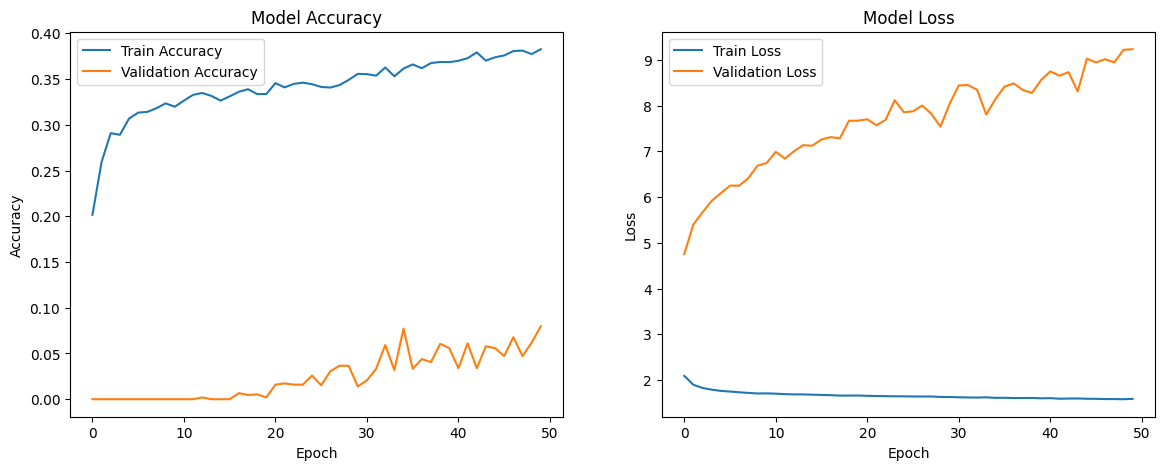

In [104]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [105]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.2205830067396164


## Random Forest

In [106]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [107]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.378510487024529
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.76      0.24       219
           1       0.34      0.44      0.38       778
           2       0.28      0.37      0.32       655
           3       0.27      0.47      0.34       510
           4       0.28      0.25      0.27       885
           5       0.29      0.37      0.33      1526
           6       0.55      0.31      0.40      3769
           7       0.54      0.44      0.49      2910

    accuracy                           0.38     11252
   macro avg       0.34      0.43      0.35     11252
weighted avg       0.44      0.38      0.39     11252



Text(0.5, 1.0, 'Training Confusion Matrix')

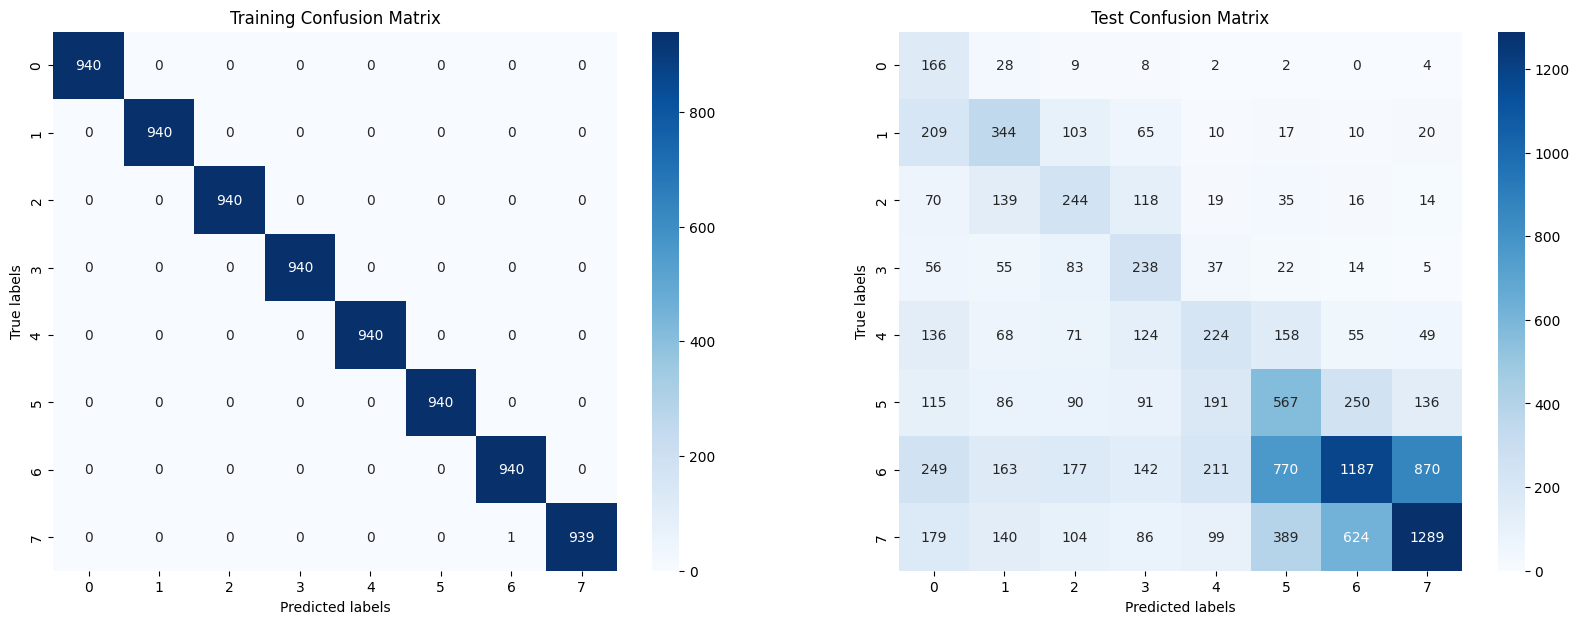

In [108]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [109]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [110]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=137
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=8,
              num_parallel_tree=None, ...)

In [111]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.37619978670458587
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.69      0.24       219
           1       0.33      0.39      0.36       778
           2       0.25      0.35      0.29       655
           3       0.28      0.49      0.36       510
           4       0.27      0.27      0.27       885
           5       0.30      0.36      0.33      1526
           6       0.53      0.33      0.41      3769
           7       0.52      0.44      0.48      2910

    accuracy                           0.38     11252
   macro avg       0.33      0.41      0.34     11252
weighted avg       0.43      0.38      0.39     11252



In [112]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [113]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)


Test Set Accuracy: 0.37237824386775686
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.68      0.23       219
           1       0.32      0.40      0.36       778
           2       0.24      0.33      0.28       655
           3       0.28      0.48      0.35       510
           4       0.27      0.25      0.26       885
           5       0.29      0.36      0.32      1526
           6       0.54      0.33      0.41      3769
           7       0.53      0.44      0.48      2910

    accuracy                           0.37     11252
   macro avg       0.32      0.41      0.33     11252
weighted avg       0.43      0.37      0.38     11252



## Comparison of the models -> inc. 1950s

- Logistic Regression
    - Test Accuracy: 0.3103448275862069
    - Time: 3m 57.9s
- SVM
    - Test Accuracy: 0.29941343761109135
    - Time: 16m 48.9s
- Neural Network
    - Train Accuracy: 0.337234
    - Test Accuracy: 0.2205830067396164
    - Time: 9m 49.3s
- Random Forest
    - Test Accuracy: 0.378510487024529
    - Time: 18m 16.1s
- XGBoost
    - Test Accuracy: 0.37237824386775686
    - Time: 2m 27.7s

# Decades (not inc. 1950s)

In [114]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
tracks = pd.read_csv('../data/clean_data/tracks.csv')

# drop columns that will not be used in our models for obvious reasons 
tracks = tracks.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name'], axis=1)

# split 'key_mode' column
tracks['key'] = tracks['key_mode'].apply(lambda x: x.split(' ')[0])
tracks['mode'] = tracks['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
tracks.drop('key_mode', axis=1, inplace=True)
# covert mode into binary
tracks['mode'] = tracks['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
tracks['key'] = tracks['key'].apply(lambda x: key_dict[x])

# Delete row with decade column == 1940s
tracks = tracks[tracks['decade'] != '1940s']

# Delete row with decade column == 1950s
tracks = tracks[tracks['decade'] != '1950s']

# what does that data look like? 
tracks.head(20)

danceability  energy  loudness  speechiness  acousticness  \
0          0.787   0.889    -3.125       0.1280      0.009510   
1          0.759   0.833    -5.010       0.0779      0.000260   
2          0.840   0.934    -3.717       0.1190      0.048400   
3          0.894   0.767    -4.695       0.1370      0.023100   
4          0.780   0.780    -2.857       0.0858      0.001470   
5          0.683   0.969    -3.290       0.1710      0.000275   
6          0.655   0.782    -6.825       0.3920      0.010500   
7          0.550   0.762    -7.861       0.3200      0.010900   
8          0.877   0.826    -3.750       0.2060      0.122000   
9          0.752   0.807    -4.386       0.1720      0.014600   
10         0.830   0.698    -6.517       0.0770      0.224000   
11         0.707   0.672    -6.186       0.0864      0.113000   
12         0.796   0.560    -6.135       0.2380      0.127000   
13         0.832   0.911    -4.068       0.2380      0.263000   
14         0.853   0.719    -3.599       0.1460      0.085100   
15         0.796   0.653    -3.644       0.2920      0.037300   
16         0.751   0.768    -4.594       0.0976      0.081100   
17         0.883   0.822    -4.029       0.1080      0.030100   
18         0.787   0.753    -6.938       0.2700      0.030200   
19         0.566   0.547    -9.777       0.1350      0.132000   

    instrumentalness  liveness  valence    tempo  time_signature  duration_ms  \
0           0.000322    0.6520    0.677  156.027               4       172399   
1           0.057300    0.1780    0.522  140.026               4       183919   
2           0.000000    0.0961    0.670  149.994               4       145842   
3           0.000024    0.5740    0.412  144.077               4       140288   
4           0.000000    0.4720    0.446  118.014               4       177289   
5           0.126000    0.9400    0.595  170.017               4       226932   
6           0.003670    0.1200    0.372  167.003               4       164723   
7           0.001790    0.3980    0.347  200.211               4       162138   
8           0.000010    0.1040    0.814   75.003               4       238145   
9           0.000376    0.8000    0.442   87.507               4       195994   
10          0.000001    0.1910    0.595  132.990               4       175476   
11          0.000010    0.1030    0.326  129.951               4       158516   
12          0.000001    0.2920    0.698  149.884               4       141043   
13          0.000147    0.0865    0.557  159.865               4        97300   
14          0.000000    0.1780    0.628  152.029               4       142668   
15          0.005640    0.2420    0.386  152.051               4       227505   
16          0.000317    0.2050    0.384  150.005               4       154915   
17          0.000002    0.1110    0.327  110.024               4       143346   
18          0.000574    0.1870    0.432   84.997               4       155673   
19          0.000166    0.5380    0.267   70.000               4       173372   

   decade  key  mode  
0   2020s    2     1  
1   2020s   11     1  
2   2020s    0     1  
3   2020s   10     0  
4   2020s    0     1  
5   2020s    0     1  
6   2020s    8     1  
7   2020s    0     1  
8   2020s   10     0  
9   2020s   11     1  
10  2020s    5     0  
11  2020s    6     1  
12  2020s    6     1  
13  2020s    7     1  
14  2020s   11     0  
15  2020s    1     1  
16  2020s    1     1  
17  2020s    5     0  
18  2020s    6     0  
19  2020s    1     0

In [115]:
tracks['decade'].value_counts()

decade
2010s    18863
2020s    14510
2000s     7590
1990s     4637
1960s     3738
1970s     3241
1980s     2519
Name: count, dtype: int64

In [116]:
decades = tracks

## Classification Data Prep

In [117]:
# convert key and mode to factors
decades['key'] = decades['key'].astype('category')
decades['mode'] = decades['mode'].astype('category')

# rename mode to major
decades.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
decades.head(20)

danceability  energy  loudness  speechiness  acousticness  \
0          0.787   0.889    -3.125       0.1280      0.009510   
1          0.759   0.833    -5.010       0.0779      0.000260   
2          0.840   0.934    -3.717       0.1190      0.048400   
3          0.894   0.767    -4.695       0.1370      0.023100   
4          0.780   0.780    -2.857       0.0858      0.001470   
5          0.683   0.969    -3.290       0.1710      0.000275   
6          0.655   0.782    -6.825       0.3920      0.010500   
7          0.550   0.762    -7.861       0.3200      0.010900   
8          0.877   0.826    -3.750       0.2060      0.122000   
9          0.752   0.807    -4.386       0.1720      0.014600   
10         0.830   0.698    -6.517       0.0770      0.224000   
11         0.707   0.672    -6.186       0.0864      0.113000   
12         0.796   0.560    -6.135       0.2380      0.127000   
13         0.832   0.911    -4.068       0.2380      0.263000   
14         0.853   0.719    -3.599       0.1460      0.085100   
15         0.796   0.653    -3.644       0.2920      0.037300   
16         0.751   0.768    -4.594       0.0976      0.081100   
17         0.883   0.822    -4.029       0.1080      0.030100   
18         0.787   0.753    -6.938       0.2700      0.030200   
19         0.566   0.547    -9.777       0.1350      0.132000   

    instrumentalness  liveness  valence    tempo  time_signature  duration_ms  \
0           0.000322    0.6520    0.677  156.027               4       172399   
1           0.057300    0.1780    0.522  140.026               4       183919   
2           0.000000    0.0961    0.670  149.994               4       145842   
3           0.000024    0.5740    0.412  144.077               4       140288   
4           0.000000    0.4720    0.446  118.014               4       177289   
5           0.126000    0.9400    0.595  170.017               4       226932   
6           0.003670    0.1200    0.372  167.003               4       164723   
7           0.001790    0.3980    0.347  200.211               4       162138   
8           0.000010    0.1040    0.814   75.003               4       238145   
9           0.000376    0.8000    0.442   87.507               4       195994   
10          0.000001    0.1910    0.595  132.990               4       175476   
11          0.000010    0.1030    0.326  129.951               4       158516   
12          0.000001    0.2920    0.698  149.884               4       141043   
13          0.000147    0.0865    0.557  159.865               4        97300   
14          0.000000    0.1780    0.628  152.029               4       142668   
15          0.005640    0.2420    0.386  152.051               4       227505   
16          0.000317    0.2050    0.384  150.005               4       154915   
17          0.000002    0.1110    0.327  110.024               4       143346   
18          0.000574    0.1870    0.432   84.997               4       155673   
19          0.000166    0.5380    0.267   70.000               4       173372   

   decade key major  
0   2020s   2     1  
1   2020s  11     1  
2   2020s   0     1  
3   2020s  10     0  
4   2020s   0     1  
5   2020s   0     1  
6   2020s   8     1  
7   2020s   0     1  
8   2020s  10     0  
9   2020s  11     1  
10  2020s   5     0  
11  2020s   6     1  
12  2020s   6     1  
13  2020s   7     1  
14  2020s  11     0  
15  2020s   1     1  
16  2020s   1     1  
17  2020s   5     0  
18  2020s   6     0  
19  2020s   1     0

In [118]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = decades.select_dtypes(include=[np.number]).columns
decades[numerical_columns] = (decades[numerical_columns] - decades[numerical_columns].min()) / (decades[numerical_columns].max() - decades[numerical_columns].min())

# what does the data look like now?
decades.head(20)

danceability  energy  loudness  speechiness  acousticness  \
0       0.798174   0.889  0.926877     0.132368      0.009548   
1       0.769777   0.833  0.896157     0.080558      0.000261   
2       0.851927   0.934  0.917229     0.123061      0.048594   
3       0.906694   0.767  0.901291     0.141675      0.023193   
4       0.791075   0.780  0.931244     0.088728      0.001476   
5       0.692698   0.969  0.924188     0.176836      0.000276   
6       0.664300   0.782  0.866579     0.405377      0.010542   
7       0.557809   0.762  0.849695     0.330920      0.010944   
8       0.889452   0.826  0.916691     0.213030      0.122490   
9       0.762677   0.807  0.906326     0.177870      0.014659   
10      0.841785   0.698  0.871598     0.079628      0.224900   
11      0.717039   0.672  0.876992     0.089349      0.113454   
12      0.807302   0.560  0.877823     0.246122      0.127510   
13      0.843813   0.911  0.911509     0.246122      0.264056   
14      0.865112   0.719  0.919152     0.150982      0.085442   
15      0.807302   0.653  0.918419     0.301965      0.037450   
16      0.761663   0.768  0.902937     0.100931      0.081426   
17      0.895538   0.822  0.912144     0.111686      0.030221   
18      0.798174   0.753  0.864737     0.279214      0.030321   
19      0.574037   0.547  0.818471     0.139607      0.132530   

    instrumentalness  liveness  valence     tempo  time_signature  \
0           0.000323  0.657921    0.677  0.642179             0.8   
1           0.057415  0.179617    0.522  0.576322             0.8   
2           0.000000  0.096973    0.670  0.617348             0.8   
3           0.000024  0.579213    0.412  0.592995             0.8   
4           0.000000  0.476287    0.446  0.485724             0.8   
5           0.126253  0.948537    0.595  0.699759             0.8   
6           0.003677  0.121090    0.372  0.687354             0.8   
7           0.001794  0.401615    0.347  0.824032             0.8   
8           0.000011  0.104945    0.814  0.308699             0.8   
9           0.000377  0.807265    0.442  0.360163             0.8   
10          0.000001  0.192735    0.595  0.547363             0.8   
11          0.000010  0.103935    0.326  0.534855             0.8   
12          0.000001  0.294652    0.698  0.616895             0.8   
13          0.000147  0.087286    0.557  0.657975             0.8   
14          0.000000  0.179617    0.628  0.625724             0.8   
15          0.005651  0.244198    0.386  0.625814             0.8   
16          0.000318  0.206862    0.384  0.617393             0.8   
17          0.000002  0.112008    0.327  0.452839             0.8   
18          0.000575  0.188698    0.432  0.349832             0.8   
19          0.000166  0.542886    0.267  0.288107             0.8   

    duration_ms decade key major  
0      0.035570  2020s   2     1  
1      0.038003  2020s  11     1  
2      0.029960  2020s   0     1  
3      0.028787  2020s  10     0  
4      0.036603  2020s   0     1  
5      0.047089  2020s   0     1  
6      0.033948  2020s   8     1  
7      0.033402  2020s   0     1  
8      0.049458  2020s  10     0  
9      0.040554  2020s  11     1  
10     0.036220  2020s   5     0  
11     0.032637  2020s   6     1  
12     0.028946  2020s   6     1  
13     0.019706  2020s   7     1  
14     0.029289  2020s  11     0  
15     0.047210  2020s   1     1  
16     0.031876  2020s   1     1  
17     0.029433  2020s   5     0  
18     0.032037  2020s   6     0  
19     0.035775  2020s   1     0

In [119]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(decades, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['decade'], axis=1)
y_train = train[['decade']]
X_test = test.drop(['decade'], axis=1)
y_test = test[['decade']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (44078, 13) 
Shape of X_test:  (11020, 13) 
Shape of y_train:  (44078, 1) 
Shape of y_test:  (11020, 1)


In [120]:
train['decade'].value_counts()

decade
2010s    15035
2020s    11673
2000s     6122
1990s     3674
1960s     2999
1970s     2552
1980s     2023
Name: count, dtype: int64

In [121]:
from sklearn.utils import resample

# Combine the features and target for training set
train_df = pd.concat([X_train, y_train], axis=1)

# sample the training dataset classes
resampled_df_list = []
min_class_size = int(y_train.value_counts().min())

for decade_value, group in train_df.groupby('decade'):
    resampled_group = resample(group,
                               replace=False,
                               n_samples=min_class_size,
                               random_state=137)
    resampled_df_list.append(resampled_group)

# Combine the resampled training dataframes
balanced_train_df = pd.concat(resampled_df_list)

# Print the new class distribution
print("New class distribution after resampling:")
print(balanced_train_df['decade'].value_counts())
print("Balanced dataset created and saved successfully without using SMOTE.")

New class distribution after resampling:
decade
1960s    2023
1970s    2023
1980s    2023
1990s    2023
2000s    2023
2010s    2023
2020s    2023
Name: count, dtype: int64
Balanced dataset created and saved successfully without using SMOTE.


In [122]:
X_train = balanced_train_df.drop(['decade'], axis=1)
y_train = balanced_train_df[['decade']]

In [123]:
# value counts of genre in the training data
y_train['decade'].value_counts()

decade
1960s    2023
1970s    2023
1980s    2023
1990s    2023
2000s    2023
2010s    2023
2020s    2023
Name: count, dtype: int64

In [124]:
# value counts of genre in test data
y_test['decade'].value_counts()

decade
2010s    3828
2020s    2837
2000s    1468
1990s     963
1960s     739
1970s     689
1980s     496
Name: count, dtype: int64

In [125]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

## Logistic Regression using OVR

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 4.281332398719396, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.31887477313974594
Classification Report:
              precision    recall  f1-score   support

       1960s       0.24      0.61      0.35       739
       1970s       0.22      0.16      0.19       689
       1980s       0.18      0.47      0.26       496
       1990s       0.21      0.12      0.15       963
       2000s       0.23      0.40      0.29      1468
       2010s       0.51      0.17      0.25      3828
       2020s       0.46      0.49      0.47      2837

    accuracy                           0.32     11020
   macro avg       0.29      0.34      0.28     11020
weighted avg       0.38      0.32      0.31     11020



Text(0.5, 1.0, 'Training Confusion Matrix')

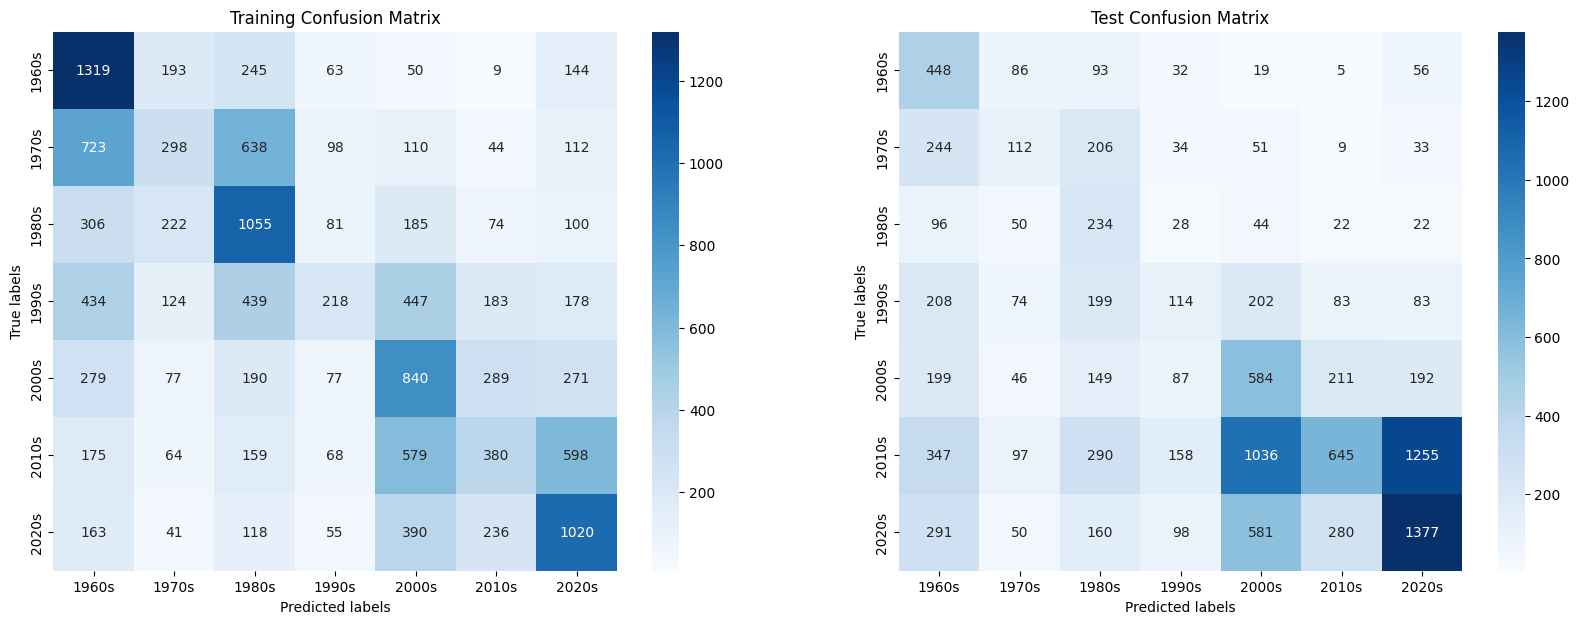

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [128]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 206.913808111479, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.33212341197822143
SVM Classification Report:
              precision    recall  f1-score   support

       1960s       0.26      0.64      0.37       739
       1970s       0.18      0.24      0.21       689
       1980s       0.25      0.48      0.32       496
       1990s       0.23      0.23      0.23       963
       2000s       0.24      0.36      0.29      1468
       2010s       0.51      0.25      0.33      3828
       2020s       0.48      0.38      0.42      2837

    accuracy                           0.33     11020
   macro avg       0.31      0.37      0.31     11020
weighted avg       0.39      0.33      0.34     11020



Text(0.5, 1.0, 'Training Confusion Matrix')

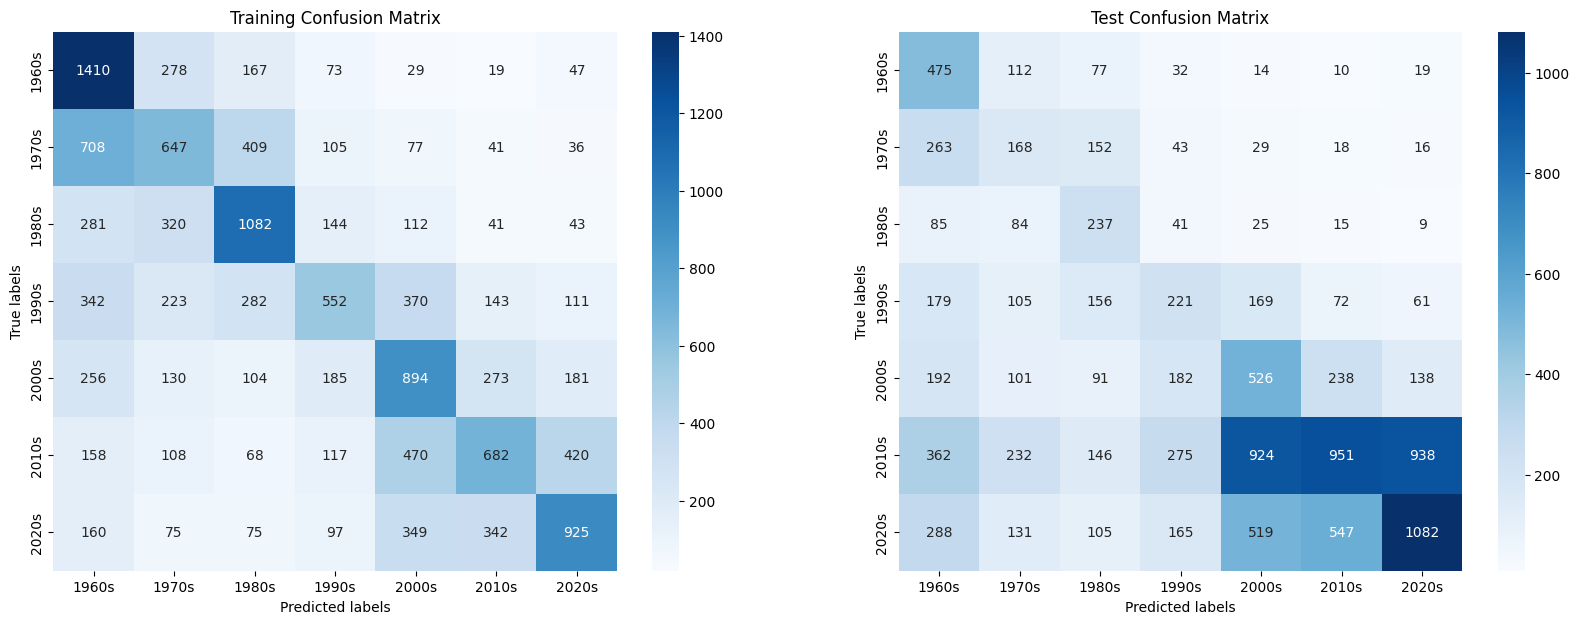

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [64, 128],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [2, 3, 4],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


In [131]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.365863 using {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 64, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 64, 'regularization_rate': 0.001}


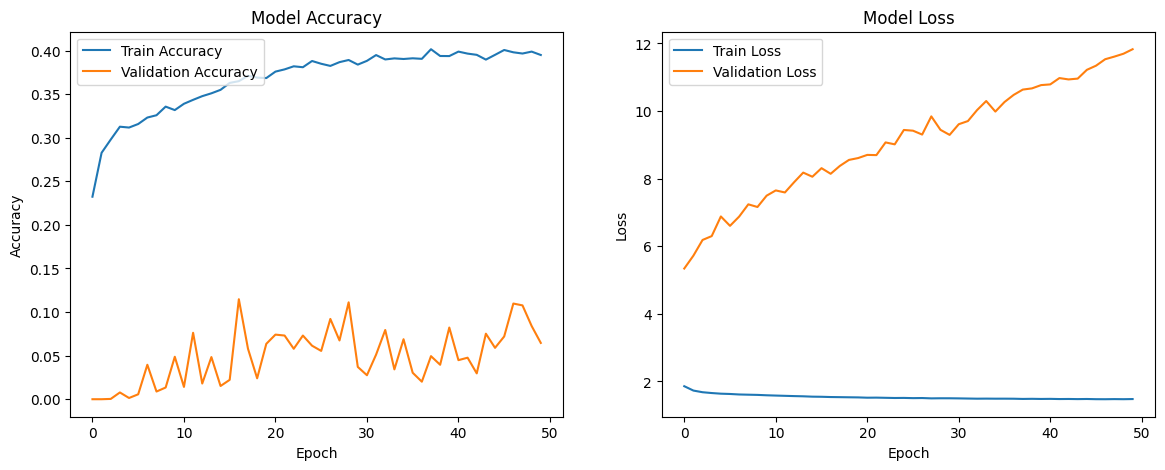

In [132]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [133]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.2531760334968567


## Random Forest

In [134]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [135]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test Accuracy: 0.41234119782214157
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.65      0.42       739
           1       0.25      0.34      0.29       689
           2       0.28      0.54      0.37       496
           3       0.32      0.34      0.33       963
           4       0.31      0.40      0.35      1468
           5       0.59      0.33      0.42      3828
           6       0.54      0.49      0.51      2837

    accuracy                           0.41     11020
   macro avg       0.37      0.44      0.39     11020
weighted avg       0.46      0.41      0.42     11020



Text(0.5, 1.0, 'Training Confusion Matrix')

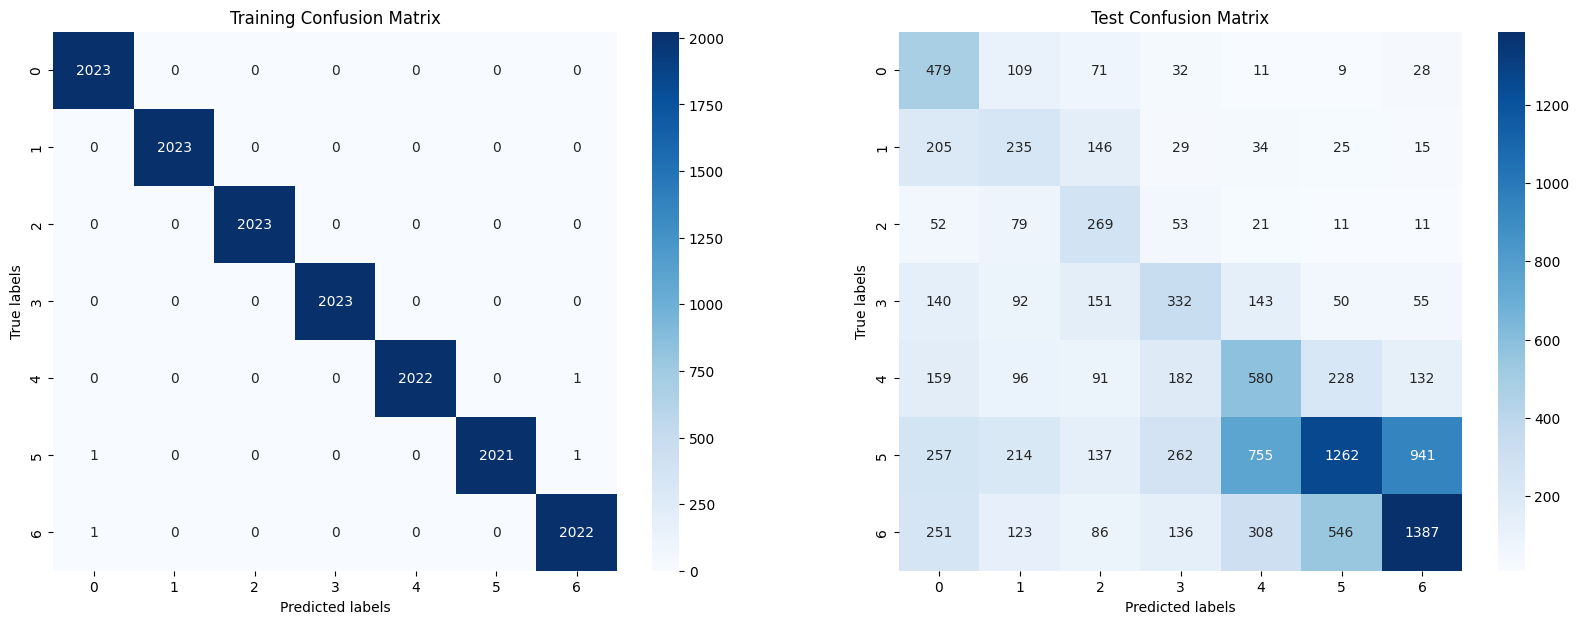

In [136]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [137]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [138]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=137
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [139]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4073502722323049
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.63      0.42       739
           1       0.25      0.36      0.29       689
           2       0.29      0.52      0.37       496
           3       0.32      0.35      0.34       963
           4       0.30      0.37      0.33      1468
           5       0.58      0.33      0.42      3828
           6       0.53      0.48      0.50      2837

    accuracy                           0.41     11020
   macro avg       0.37      0.43      0.38     11020
weighted avg       0.45      0.41      0.41     11020



In [140]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [141]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)

Test Set Accuracy: 0.41206896551724137
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.60      0.43       739
           1       0.28      0.39      0.32       689
           2       0.29      0.52      0.37       496
           3       0.32      0.39      0.35       963
           4       0.29      0.36      0.32      1468
           5       0.56      0.35      0.43      3828
           6       0.54      0.47      0.50      2837

    accuracy                           0.41     11020
   macro avg       0.37      0.44      0.39     11020
weighted avg       0.45      0.41      0.42     11020



## Comparison of the models -> not inc. 1950s

7 classes -> 

- Logistic Regression
    - Test Accuracy: 0.31887477313974594
    - Time: 4m 53.5s
- SVM
    - Test Accuracy: 0.33212341197822143
    - Time: 54m 45.9s
- Neural Network
    - Train Accuracy: 0.365863
    - Test Accuracy: 0.2531760334968567
    - Time: 17-ish min
- Random Forest
    - Test Accuracy: 0.41234119782214157
    - Time: 38m 36.4s
- XGBoost
    - Test Accuracy: 0.41206896551724137
    - Time: 3m 5.6s